In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc

In [2]:
def calculate_mean_of_range(range_value, delimiter='-'):
    nums = str(range_value).split(delimiter)
    sum=0
    for x in nums:
        sum = sum + float(x)
    return round(sum/len(nums),2)

In [3]:
gold_master_data = pd.read_csv('final_merged_gold_dataset_new.csv')
gold_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Columns: 105 entries, Unnamed: 0 to date_10YrBondRate
dtypes: float64(26), int64(23), object(56)
memory usage: 642.4+ KB


In [4]:
columns_to_consider=['monday_date',
 ' Inflation Rate (%)_inflation',
 '1 to 3 yrs._interest',
 'Over 3 yrs. & upto 5 yrs._interest',
 'Above 5 yrs._interest',
 'Uncertainty Index_uncertainty',
 'Price_10YrBondRate',                     
 'Price_fxrate',
 'Price_nifty',
 'Price_snp',
 'Adj Close_wpm',
 'Adj Close_ego',
 'Spot Price(Rs.)_gold',
 'Spot Price(Rs.)_silver',
 'Spot Price(Rs.)_copper',
 'Spot Price(Rs.)_crudeoil', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita', 'gni_per_capita']

In [5]:
model_input_df = gold_master_data[columns_to_consider]
model_input_df.rename(columns={'monday_date':'date', ' Inflation Rate (%)_inflation': 'inflation_rate', '1 to 3 yrs._interest':'interest_rate_1_to_3', 
                               'Over 3 yrs. & upto 5 yrs._interest': 'interest_rate_1_to_5' ,'Above 5 yrs._interest':'interest_rate_above_5', 
                               'Uncertainty Index_uncertainty': 'uncertainty', 'Price_fxrate': 'fx_rate', 'Price_nifty': 'price_nifty',
                              'Price_snp': 'price_snp', 'Adj Close_wpm': 'wpm_price', 'Adj Close_ego': 'ego_price', 'Spot Price(Rs.)_gold': 'gold_price', 
                               'Spot Price(Rs.)_silver': 'silver_price',
                              'Spot Price(Rs.)_copper': 'copper_price', 'Spot Price(Rs.)_crudeoil': 'oil_price'}, inplace=True)
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    object 
 3   interest_rate_1_to_5   783 non-null    object 
 4   interest_rate_above_5  783 non-null    object 
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    object 
 9   price_snp              783 non-null    object 
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    int64  
 13  silver_price           783 non-null    int64  
 14  copper_price           783 non-null    float64
 15  oil_pr

C:\Users\Surya\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
model_input_df.head(5)

,date,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
0,2006-01-02,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.180,45.075,"2,835.95","1,273.46",5.048476,23.455441,7640,13300,202.90,2755,11809.650,135225.00,36364.404998,35609.25
1,2006-01-09,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.187,44.250,"2,910.10","1,290.15",5.161630,25.513779,7845,13500,205.40,2816,12124.500,132750.00,35698.833525,34957.50
2,2006-01-16,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.202,44.170,"2,833.10","1,287.61",5.266082,24.843624,8010,13600,206.10,2830,12588.450,136485.30,35634.293261,34894.30
3,2006-01-23,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.205,44.095,"2,884.05","1,263.82",5.031067,22.306606,8030,13275,204.40,3032,12214.315,138458.30,35573.786764,34835.05
4,2006-01-30,5.7965,6.00-6.50,6.25-7.00,6.25-7.00,39.99015,7.425,44.045,"2,974.50","1,285.19",6.484680,23.790525,8080,14170,217.35,2982,12200.465,147550.75,35533.449099,34795.55


In [7]:
model_input_df['interest_rate_1_to_3']=model_input_df['interest_rate_1_to_3'].apply(lambda x: calculate_mean_of_range(x))
model_input_df['interest_rate_1_to_5']=model_input_df['interest_rate_1_to_5'].apply(lambda x: calculate_mean_of_range(x))
model_input_df['interest_rate_above_5']=model_input_df['interest_rate_above_5'].apply(lambda x: calculate_mean_of_range(x))
model_input_df['price_nifty'] = model_input_df['price_nifty'].apply(lambda x: str(x).replace(',', ''))
model_input_df['price_snp'] = model_input_df['price_snp'].apply(lambda x: str(x).replace(',', ''))
model_input_df['price_nifty'] = pd.to_numeric(model_input_df['price_nifty'],errors = 'coerce')
model_input_df['price_snp'] = pd.to_numeric(model_input_df['price_snp'],errors = 'coerce')

<ipython-input-7-2d3330926d1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input_df['interest_rate_1_to_3']=model_input_df['interest_rate_1_to_3'].apply(lambda x: calculate_mean_of_range(x))
<ipython-input-7-2d3330926d1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input_df['interest_rate_1_to_5']=model_input_df['interest_rate_1_to_5'].apply(lambda x: calculate_mean_of_range(x))
<ipython-input-7-2d3330926d1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [8]:
model_input_df.describe()

,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000,783.000000
mean,7.114451,7.526003,7.552069,7.514049,98.966078,7.604040,56.854672,6997.873946,1851.830741,19.833462,33.232717,24751.014049,37335.080460,373.362133,3899.372925,48631.705093,1.769603e+05,89149.554824,87652.874815
std,2.722230,1.199070,1.101480,1.035466,50.631470,0.770052,10.983243,2715.865147,696.185484,9.606632,24.704446,10127.085156,13212.898244,75.948783,1106.180754,40117.503290,2.042104e+05,37275.203008,37560.843223
min,3.328200,5.170000,5.300000,5.380000,27.739460,5.172000,39.190000,2524.200000,676.530000,2.254405,2.660000,7640.000000,13275.000000,137.600000,1295.000000,8398.720000,4.172750e+04,35533.449099,34795.550000
25%,4.907000,6.580000,6.700000,6.620000,63.247227,7.176000,46.005000,4977.825000,1297.665000,12.657355,14.188278,15782.500000,25557.500000,321.800000,3072.500000,18560.540000,6.556171e+04,53858.334100,54359.200000
50%,6.623400,7.380000,7.250000,7.380000,87.388771,7.749000,58.715000,6035.650000,1642.810000,18.953203,26.997696,27505.000000,38189.000000,388.300000,3673.000000,37939.575000,9.482550e+04,86331.553328,90523.600000
75%,9.312400,8.620000,8.620000,8.380000,126.778580,8.126000,66.593500,8945.650000,2358.000000,25.031256,45.115828,30315.500000,45037.500000,428.625000,4678.500000,52943.250000,2.164730e+05,127161.187484,117112.450000
max,11.989400,9.120000,9.120000,8.880000,283.689087,9.383000,76.570000,13873.200000,3735.360000,55.573048,100.720306,55331.000000,73288.000000,610.500000,7291.000000,196406.210000,1.232533e+06,151296.123030,152682.400000


In [9]:
# No missing value
gold_master_data[gold_master_data.isnull().sum(axis=1)>0]

,Unnamed: 0,Unnamed: 0_x,monday_date,date_inflation,Inflation Rate (%)_inflation,Annual Change_inflation,year_inflation,date_gdp,gdp_per_capita,date_gni,...,pd_price_inr,date_rh,rh_price_inr,Unnamed: 0.1,Price_10YrBondRate,Open_10YrBondRate,High_10YrBondRate,Low_10YrBondRate,Change %_10YrBondRate,date_10YrBondRate


In [10]:
## Scatter Plot

In [11]:
def density_plot(df):
    df.plot(kind='kde', figsize=(12,6))
    plt.show()

Skewness: 0.1779347719106384
kurtosis: -0.06775521863439371


array([[<AxesSubplot:title={'center':'gold_price'}>]], dtype=object)

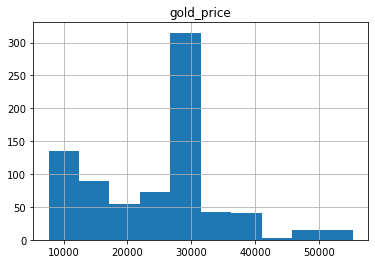

In [12]:
# Hist plot
print(f"Skewness: {skew(model_input_df['gold_price'])}")
print(f"kurtosis: {kurtosis(model_input_df['gold_price'])}")
model_input_df[['gold_price']].hist()

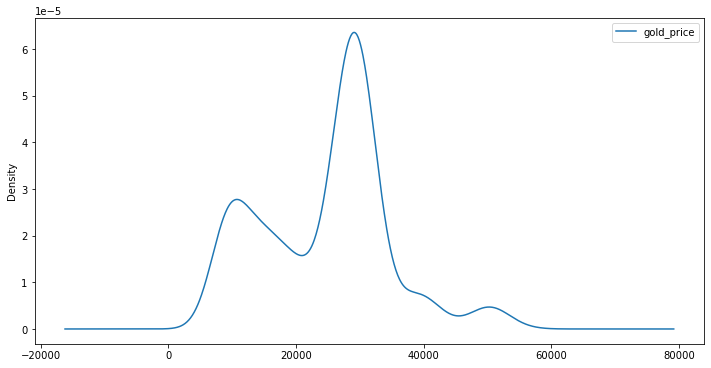

In [13]:
density_plot(model_input_df[['gold_price']])

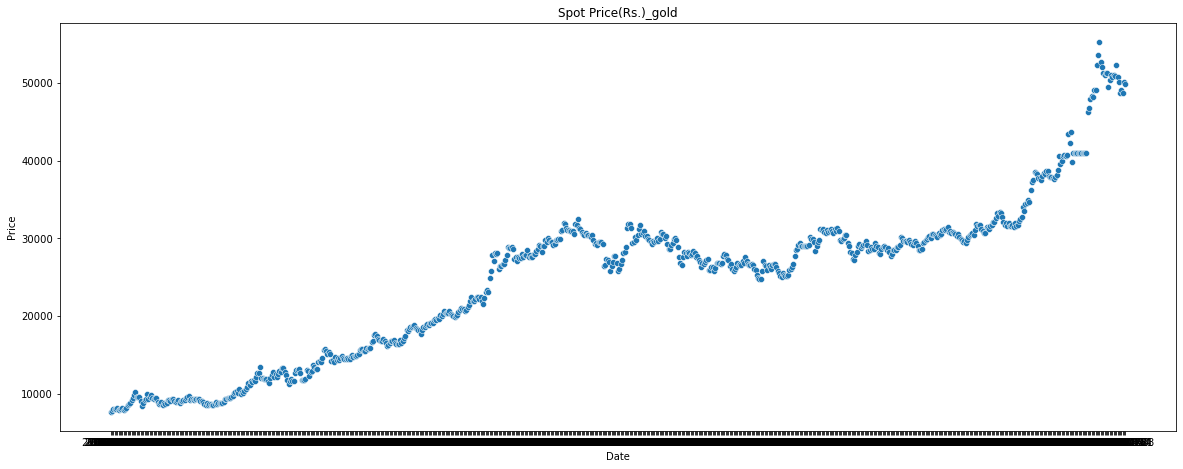

In [14]:
# Scatter Plot
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure
sns.scatterplot(x=model_input_df['date'], y=model_input_df['gold_price']);
plt.title('Spot Price(Rs.)_gold');
plt.ylabel('Price');
plt.xlabel('Date');

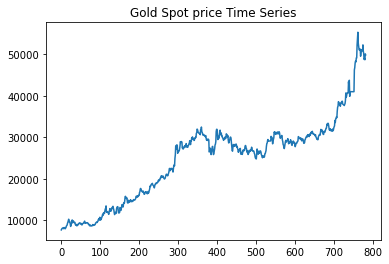

In [15]:
plt.plot(model_input_df['gold_price'])
plt.title('Gold Spot price Time Series')
plt.show()

So overall, what this means to us is, if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.

In [16]:
model_input_df.columns

Index(['date', 'inflation_rate', 'interest_rate_1_to_3',
       'interest_rate_1_to_5', 'interest_rate_above_5', 'uncertainty',
       'Price_10YrBondRate', 'fx_rate', 'price_nifty', 'price_snp',
       'wpm_price', 'ego_price', 'gold_price', 'silver_price', 'copper_price',
       'oil_price', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita',
       'gni_per_capita'],
      dtype='object')

In [17]:
model_input_df.head(5)

,date,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
0,2006-01-02,5.7965,6.25,6.62,6.62,39.99015,7.180,45.075,2835.95,1273.46,5.048476,23.455441,7640,13300,202.90,2755,11809.650,135225.00,36364.404998,35609.25
1,2006-01-09,5.7965,6.25,6.62,6.62,39.99015,7.187,44.250,2910.10,1290.15,5.161630,25.513779,7845,13500,205.40,2816,12124.500,132750.00,35698.833525,34957.50
2,2006-01-16,5.7965,6.25,6.62,6.62,39.99015,7.202,44.170,2833.10,1287.61,5.266082,24.843624,8010,13600,206.10,2830,12588.450,136485.30,35634.293261,34894.30
3,2006-01-23,5.7965,6.25,6.62,6.62,39.99015,7.205,44.095,2884.05,1263.82,5.031067,22.306606,8030,13275,204.40,3032,12214.315,138458.30,35573.786764,34835.05
4,2006-01-30,5.7965,6.25,6.62,6.62,39.99015,7.425,44.045,2974.50,1285.19,6.484680,23.790525,8080,14170,217.35,2982,12200.465,147550.75,35533.449099,34795.55


In [18]:
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    float64
 3   interest_rate_1_to_5   783 non-null    float64
 4   interest_rate_above_5  783 non-null    float64
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    float64
 9   price_snp              783 non-null    float64
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    int64  
 13  silver_price           783 non-null    int64  
 14  copper_price           783 non-null    float64
 15  oil_pr

In [19]:
model_input_df.head(5)

,date,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
0,2006-01-02,5.7965,6.25,6.62,6.62,39.99015,7.180,45.075,2835.95,1273.46,5.048476,23.455441,7640,13300,202.90,2755,11809.650,135225.00,36364.404998,35609.25
1,2006-01-09,5.7965,6.25,6.62,6.62,39.99015,7.187,44.250,2910.10,1290.15,5.161630,25.513779,7845,13500,205.40,2816,12124.500,132750.00,35698.833525,34957.50
2,2006-01-16,5.7965,6.25,6.62,6.62,39.99015,7.202,44.170,2833.10,1287.61,5.266082,24.843624,8010,13600,206.10,2830,12588.450,136485.30,35634.293261,34894.30
3,2006-01-23,5.7965,6.25,6.62,6.62,39.99015,7.205,44.095,2884.05,1263.82,5.031067,22.306606,8030,13275,204.40,3032,12214.315,138458.30,35573.786764,34835.05
4,2006-01-30,5.7965,6.25,6.62,6.62,39.99015,7.425,44.045,2974.50,1285.19,6.484680,23.790525,8080,14170,217.35,2982,12200.465,147550.75,35533.449099,34795.55


<AxesSubplot:>

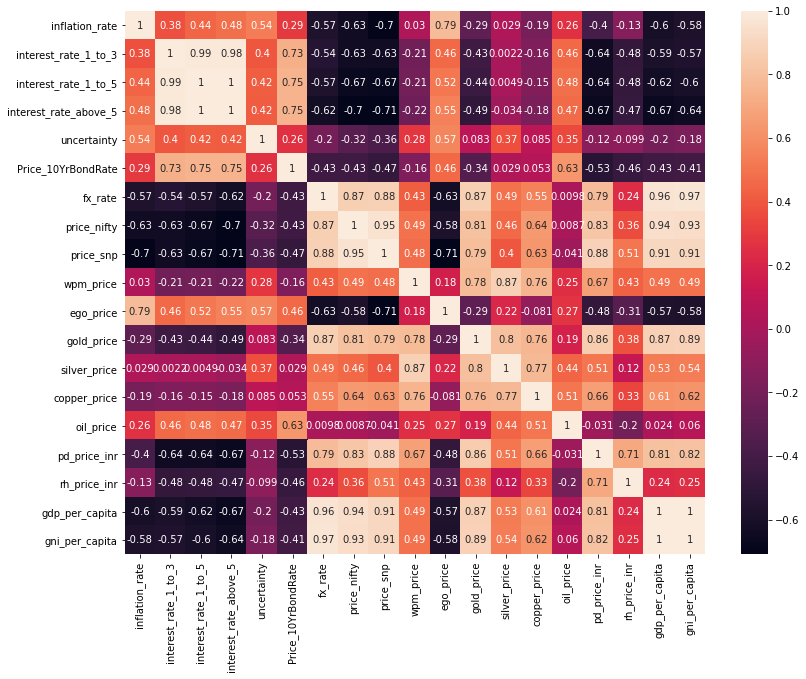

In [20]:
fig, ax = plt.subplots(figsize=(13,10))  
sns.heatmap(model_input_df.corr(), ax=ax, annot=True)

## Models

In [21]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Conv1D
import numpy as np
from matplotlib import pyplot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [22]:
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    float64
 3   interest_rate_1_to_5   783 non-null    float64
 4   interest_rate_above_5  783 non-null    float64
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    float64
 9   price_snp              783 non-null    float64
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    int64  
 13  silver_price           783 non-null    int64  
 14  copper_price           783 non-null    float64
 15  oil_pr

In [23]:
model_input_df.columns

Index(['date', 'inflation_rate', 'interest_rate_1_to_3',
       'interest_rate_1_to_5', 'interest_rate_above_5', 'uncertainty',
       'Price_10YrBondRate', 'fx_rate', 'price_nifty', 'price_snp',
       'wpm_price', 'ego_price', 'gold_price', 'silver_price', 'copper_price',
       'oil_price', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita',
       'gni_per_capita'],
      dtype='object')

In [24]:
# Transforming the dataset to ln scale
cols=['inflation_rate', 'interest_rate_1_to_3',
       'interest_rate_1_to_5', 'interest_rate_above_5', 'uncertainty',
       'Price_10YrBondRate', 'fx_rate', 'price_nifty', 'price_snp',
       'wpm_price', 'ego_price', 'gold_price', 'silver_price', 'copper_price',
       'oil_price', 'pd_price_inr', 'rh_price_inr', 'gdp_per_capita',
       'gni_per_capita']
model_input_df[cols] = np.log(model_input_df[cols])

C:\Users\Surya\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Skewness: -0.7001179876087381
kurtosis: -0.5568074112254298


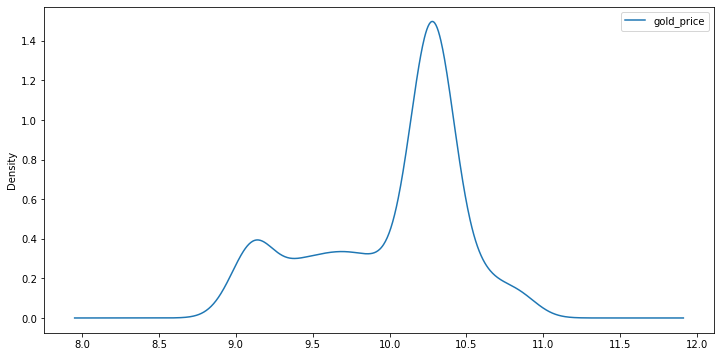

In [25]:
print(f"Skewness: {skew(model_input_df['gold_price'])}")
print(f"kurtosis: {kurtosis(model_input_df['gold_price'])}")
density_plot(model_input_df[['gold_price']])

In [26]:
model_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   783 non-null    object 
 1   inflation_rate         783 non-null    float64
 2   interest_rate_1_to_3   783 non-null    float64
 3   interest_rate_1_to_5   783 non-null    float64
 4   interest_rate_above_5  783 non-null    float64
 5   uncertainty            783 non-null    float64
 6   Price_10YrBondRate     783 non-null    float64
 7   fx_rate                783 non-null    float64
 8   price_nifty            783 non-null    float64
 9   price_snp              783 non-null    float64
 10  wpm_price              783 non-null    float64
 11  ego_price              783 non-null    float64
 12  gold_price             783 non-null    float64
 13  silver_price           783 non-null    float64
 14  copper_price           783 non-null    float64
 15  oil_pr

In [27]:
model_input_df.describe()

,inflation_rate,interest_rate_1_to_3,interest_rate_1_to_5,interest_rate_above_5,uncertainty,Price_10YrBondRate,fx_rate,price_nifty,price_snp,wpm_price,ego_price,gold_price,silver_price,copper_price,oil_price,pd_price_inr,rh_price_inr,gdp_per_capita,gni_per_capita
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,1.885303,2.004955,2.010765,2.006861,4.470951,2.023299,4.021311,8.774886,7.454821,2.861266,3.177545,10.015348,10.456501,5.898413,8.228683,10.509821,11.701760,11.300131,11.277277
std,0.398762,0.166353,0.150453,0.142580,0.501663,0.105195,0.197507,0.403361,0.372104,0.528906,0.877603,0.478857,0.393117,0.230580,0.284266,0.746734,0.791058,0.457479,0.472448
min,1.202432,1.642873,1.667707,1.682688,3.322856,1.643259,3.668422,7.833679,6.516977,0.812886,0.978326,8.941153,9.493638,4.924351,7.166266,9.035835,10.638916,10.478230,10.457245
25%,1.590663,1.884035,1.902108,1.890095,4.147051,1.970742,3.828750,8.512748,7.168322,2.538238,2.652385,9.666657,10.148686,5.773929,8.030247,9.828787,11.090747,10.894112,10.903369
50%,1.890609,1.998774,1.981001,1.998774,4.470367,2.047564,4.072695,8.705439,7.404163,2.941973,3.295752,10.222123,10.550303,5.961778,8.208764,10.543750,11.459794,11.365950,11.413366
75%,2.231347,2.154085,2.154085,2.125848,4.842442,2.095069,4.198607,9.098922,7.765569,3.220124,3.809230,10.319414,10.715251,6.060582,8.450733,10.876976,12.285221,11.753211,11.670890
max,2.484023,2.210470,2.210470,2.183802,5.647879,2.238900,4.338205,9.537714,8.225599,4.017698,4.612347,10.921089,11.202152,6.414278,8.894396,12.187940,14.024582,11.926994,11.936115


In [28]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [29]:
def define_dataset(start_week=0, split_time=750, no_of_validation_steps=1):
    # Normalized train and validation data
    train_val_df = model_input_df[start_week:split_time]
    X_train_val = train_val_df.drop(columns=['gold_price', 'date'])
    X_train_val= X_scaler.fit_transform(X_train_val)

    y_train_val = train_val_df[['gold_price']]
    y_train_val = y_scaler.fit_transform(y_train_val)

    # Normalized test data
    test_df = model_input_df[split_time:]
    X_test = test_df.drop(columns=['gold_price', 'date'])
    X_test = X_scaler.transform(X_test)

    y_test = test_df[['gold_price']]
    y_test_Inverse = y_test
    y_test = y_scaler.transform(y_test)

    X_train = X_train_val[:-no_of_validation_steps]
    y_train = y_train_val[:-no_of_validation_steps]

    X_val = X_train_val[-no_of_validation_steps:]
    y_val = y_train_val[-no_of_validation_steps:]

    print('Train Input Shape', X_train.shape)
    print('Train output Shape',y_train.shape)
    print('Validation Input Shape', X_val.shape)
    print('validation output Shape',y_val.shape)
    print('Test Input Shape', X_test.shape)
    print('Test output Shape',y_test.shape)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [30]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)


In [31]:
def plot_history(history):
    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [32]:
def classification_pred(y):
    preds = []
    for i in range(1, len(y)):
        last_y = y[i - 1]
        curr_y = y[i]
        preds.append(curr_y - last_y > 0.0 )
    return np.array(preds)

# Metric functions
def get_metrics(y, pred_y):
    y_classification = classification_pred(y)
    y_pred_classification = classification_pred(pred_y)
    
    fpr, tpr, thresholds = roc_curve(y_classification, y_pred_classification)
    auc_value = auc(fpr, tpr)

    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(y_classification)):
        is_y_pred_up = y_pred_classification[i]
        is_y_up = y_classification[i][0]

        if is_y_pred_up and is_y_up:
            tp += 1
        elif is_y_pred_up and not is_y_up:
            fp += 1
        elif not is_y_pred_up and not is_y_up:
            tn += 1
        else:
            fn += 1

    return tp, tn, fp, fn, auc_value

### Split data into train and test dataset

In [33]:
n_features=18

In [34]:
print('X_train shape' , X_train.shape)
print('X_test shape' , X_test.shape)
print('y_train shape' , y_train.shape)
print('y_test shape' , y_test.shape)

X_train shape (749, 18)
X_test shape (33, 18)
y_train shape (749, 1)
y_test shape (33, 1)


### 2nd LSTM model

In [35]:
#from keras.optimizers import rmsprop_v2
from keras.layers import Dropout
from keras.layers.convolutional import MaxPooling1D

In [36]:
## Timeseries Generator
lookback=5
from keras.preprocessing.sequence import TimeseriesGenerator

### GRU Model

In [37]:
## Hyperparameter to Tune
#n_hidden_nodes=[128,256]
#activations=['relu']
#lookbacks=[4, 5,10]
#measures=['mae']
#optimizers=['adam', 'RMSprop']
#epochs=[10,20,50]
#batch_size=[5,10,15,20]
#config_list = np.array(np.meshgrid(n_hidden_nodes, activations, lookbacks, measures, optimizers, epochs, batch_size)).T.reshape(-1,7)
#config_list.shape

In [38]:
n_hidden_nodes=[64,128,256]
activations=['relu', 'tanh']
lookbacks=[5,10, 20]
measures=['mae']
optimizers=['adam', 'RMSprop']
epochs=[10,20]
batch_size=[5,10,50]
config_list = np.array(np.meshgrid(n_hidden_nodes, activations, lookbacks, measures, optimizers, epochs, batch_size)).T.reshape(-1,7)
config_list.shape

(216, 7)

In [39]:
n_hidden_nodes=[100]
activations=['relu', 'tanh']
lookbacks=[5,10,20]
measures=['mae']
optimizers=['adam', 'RMSprop']
epochs=[10,20]
batch_size=[5,10,50]
config_list_fixed_nodes = np.array(np.meshgrid(n_hidden_nodes, activations, lookbacks, measures, optimizers, epochs, batch_size)).T.reshape(-1,7)
config_list_fixed_nodes.shape

(72, 7)

### Predict gold price and compare it with actual

In [40]:
def plot_true_vs_pred(y_true, y_pred):
    
    print('y_true shape: ', y_true.shape)
    print('y_pred shape: ', y_pred.shape)
    fig, ax = plt.subplots() # Create the figure and axes object
    
    ax.plot(range(0,len(y_true)), y_true, label='Actual')
    ax.plot(range(0,len(y_pred)), y_pred, label='Predicted')
    plt.legend()
    plt.show()
    # Plot the first x and y axes:
    #df.plot(y = 'deaths', ax = ax) 
    # Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
    # (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
    #df.plot(x = 'year', y = 'cheese', ax = ax, secondary_y = True) 

In [41]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
     mse = metrics.mean_squared_error(y_true, y_pred)
     mae = metrics.mean_absolute_error(y_true, y_pred)
     rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
     mape = mean_absolute_percentage_error(y_true, y_pred)
     r2 = metrics.r2_score(y_true, y_pred)
    
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
     return mse, mae, rmse, mape, r2

## GRU Model

In [42]:
result_df = pd.DataFrame(columns=['model_name','n_hidden_node', 'activation', 'lookback', 'measure', 'optimizer', 'epoch', 'batch_size', 'mse', 'mae', 'rmse', 
                                  'mape', 'r2', 'test_loss', 'time_taken', 'precision', 'recall', 'auc_value'])

In [43]:
# Evaluate and plot actual vs predicted gold price
def evaluate_model(model, test_gen_new, lookback):
    #print('Test Gen Length: ', len(test_gen_new))

    pred = model.predict_generator(test_gen_new)
    pred_Inverse = y_scaler.inverse_transform(pred.reshape(-1, 1))
    y_test_inverse = y_scaler.inverse_transform(y_test.reshape(-1, 1))[lookback:]

    print(pred_Inverse.shape)
    #print(f'y_test_inverse = {y_test_inverse}')
    #print(f'pred_Inverse = {pred_Inverse}')
    test_loss = model.evaluate(test_gen_new, verbose = 0, steps=1) 
    mse, mae, rmse, mape, r2 = timeseries_evaluation_metrics_func(y_test_inverse, pred_Inverse)
    tp, tn, fp, fn, auc_value = get_metrics(y_test_inverse, pred_Inverse)
    #precision = tp/(tp+fp)
    #recall = tp/(tp+fn)
    precision = -1
    recall = -1
    print(f'Precision is : {precision}')
    print(f'Recall is : {recall}')
    print(f'AUC is : {auc_value}')
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value
#plot_true_vs_pred(y_test_inverse, pred_Inverse)

In [ ]:
## GRU Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_GRU_model1(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    print(f'{n_hidden_node}, {activation}, {lookback}, {measure}, {optimizer}, {epoch}')
    model.add(layers.GRU(int(int(n_hidden_node)/2), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(n_hidden_node), return_sequences=False))

    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    #print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_GRU_model1(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'GRU-Multivariate1', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

In [44]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

## GRU Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_GRU_model2(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    #print(f'X_train shape: {X_train.shape}')
    #print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    #print(f'train_gen_new length: {len(train_gen_new)}')
    #print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.GRU(100, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.GRU(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_GRU_model2(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    
    row={'model_name':'GRU-Multivariate2', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               36000     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.002696622459540827
MAE is : 0.044595462032621914
RMSE is : 0.051929013658462905
MAPE is : 0.41184109289653476
R2 is : -1.4843507745139486

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.002696622459540827, 0.044595462032621914, 0.051929013658462905, 0.41184109289653476, -1.4843507745139486)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.00568457922311199
MAE is : 0.07172713034002134
RMSE is : 0.07539614859601244
MAPE is : 0.6620268666441207
R2 is : -4.23710271186012

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.00568457922311199, 0.07172713034002134, 0.07539614859601244, 0.6620268666441207, -4.23710271186012)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.019142961075364038
MAE is : 0.13601242639896807
RMSE is : 0.13835809002499289
MAPE is : 1.2542406095580427
R2 is : -21.474807917347047

Precision is : -1
Recall is : -1
AUC is : 0.34188034188034194
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.019142961075364038, 0.13601242639896807, 0.13835809002499289, 1.2542406095580427, -21.474807917347047)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05303080123849272
MAE is : 0.22896901083181878
RMSE is : 0.2302841749632239
MAPE is : 2.1119711203778015
R2 is : -61.26085227075918

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.05303080123849272, 0.22896901083181878, 0.2302841749632239, 2.1119711203778015, -61.26085227075918)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.007055762772731168
MAE is : 0.08170364935756383
RMSE is : 0.08399858792105477
MAPE is : 0.754438700519892
R2 is : -17.50054294801101

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.007055762772731168, 0.08170364935756383, 0.08399858792105477, 0.754438700519892, -17.50054294801101)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.017483104957373822
MAE is : 0.1315971752881152
RMSE is : 0.13222369287451408
MAPE is : 1.215455006636549
R2 is : -44.84152621719702

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.017483104957373822, 0.1315971752881152, 0.13222369287451408, 1.215455006636549, -44.84152621719702)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.030783212448077975
MAE is : 0.17416510336248228
RMSE is : 0.17545145325154185
MAPE is : 1.6078219192977206
R2 is : -27.360031422578935

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.030783212448077975, 0.17416510336248228, 0.17545145325154185, 1.6078219192977206, -27.360031422578935)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06619609360005405
MAE is : 0.2565693081397912
RMSE is : 0.2572860151661066
MAPE is : 2.368636025804502
R2 is : -59.98529507652878

Precision is : -1
Recall is : -1
AUC is : 0.5916666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.06619609360005405, 0.2565693081397912, 0.2572860151661066, 2.368636025804502, -59.98529507652878)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.008474366773026841
MAE is : 0.08603018961971365
RMSE is : 0.09205632391653949
MAPE is : 0.7929199242259485
R2 is : -8.949336714163717

Precision is : -1
Recall is : -1
AUC is : 0.4700854700854701
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.008474366773026841, 0.08603018961971365, 0.09205632391653949, 0.7929199242259485, -8.949336714163717)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 100)               36000     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.039364286122240875
MAE is : 0.19686874798259152
RMSE is : 0.19840435005876478
MAPE is : 1.8157039931699197
R2 is : -45.215669870395395

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.039364286122240875, 0.19686874798259152, 0.19840435005876478, 1.8157039931699197, -45.215669870395395)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0010045687446894722
MAE is : 0.028094241492479702
RMSE is : 0.03169493247649334
MAPE is : 0.2592970135619351
R2 is : -1.634026653671509

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.0010045687446894722, 0.028094241492479702, 0.03169493247649334, 0.2592970135619351, -1.634026653671509)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.00046517911915949583
MAE is : 0.015588588416896835
RMSE is : 0.021568011479028284
MAPE is : 0.1438528742617505
R2 is : -0.21972160200574864

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.00046517911915949583, 0.015588588416896835, 0.021568011479028284, 0.1438528742617505, -0.21972160200574864)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.012073041501593048
MAE is : 0.10486036463654758
RMSE is : 0.10987739304148533
MAPE is : 0.9677743922950902
R2 is : -10.122680484656708

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.012073041501593048, 0.10486036463654758, 0.10987739304148533, 0.9677743922950902, -10.122680484656708)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.025502687128092345
MAE is : 0.15751575496727094
RMSE is : 0.15969560772949376
MAPE is : 1.4540932975787177
R2 is : -22.49517645479059

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.025502687128092345, 0.15751575496727094, 0.15969560772949376, 1.4540932975787177, -22.49517645479059)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_14 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.016320841053557737
MAE is : 0.12463650158366575
RMSE is : 0.12775304714001046
MAPE is : 1.1491712538039958
R2 is : -18.161495772998464

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.016320841053557737, 0.12463650158366575, 0.12775304714001046, 1.1491712538039958, -18.161495772998464)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03212372905647644
MAE is : 0.1773221562653276
RMSE is : 0.17923093777714952
MAPE is : 1.6353951301669971
R2 is : -36.71488837546406

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.03212372905647644, 0.1773221562653276, 0.17923093777714952, 1.6353951301669971, -36.71488837546406)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_16 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.016736141908982486
MAE is : 0.12850257549093974
RMSE is : 0.1293682415006963
MAPE is : 1.1868047214173088
R2 is : -42.882953855502954

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.016736141908982486, 0.12850257549093974, 0.1293682415006963, 1.1868047214173088, -42.882953855502954)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_17 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.013948002231238333
MAE is : 0.11742909620533276
RMSE is : 0.11810166057781886
MAPE is : 1.0845922028844714
R2 is : -35.57232004954342

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.013948002231238333, 0.11742909620533276, 0.11810166057781886, 1.0845922028844714, -35.57232004954342)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0032462056406823724
MAE is : 0.04114573775901479
RMSE is : 0.056975482803416175
MAPE is : 0.37984540000831735
R2 is : -1.990672079114121

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.0032462056406823724, 0.04114573775901479, 0.056975482803416175, 0.37984540000831735, -1.990672079114121)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.007790002111425566
MAE is : 0.08621426064136063
RMSE is : 0.08826098861572743
MAPE is : 0.795739389111174
R2 is : -6.176791734605959

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.007790002111425566, 0.08621426064136063, 0.08826098861572743, 0.795739389111174, -6.176791734605959)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_20 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.010148195105251749
MAE is : 0.09836049364113433
RMSE is : 0.10073825045756825
MAPE is : 0.9069986624292665
R2 is : -10.91449613256643

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.010148195105251749, 0.09836049364113433, 0.10073825045756825, 0.9069986624292665, -10.91449613256643)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_21 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0010070297594318327
MAE is : 0.02850394243228965
RMSE is : 0.031733732201426175
MAPE is : 0.26297009327202236
R2 is : -0.1823040500985944

Precision is : -1
Recall is : -1
AUC is : 0.4914529914529914
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.0010070297594318327, 0.02850394243228965, 0.031733732201426175, 0.26297009327202236, -0.1823040500985944)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.001917124229888858
MAE is : 0.04061151033356293
RMSE is : 0.043784977216950315
MAPE is : 0.3748838634314075
R2 is : -4.0267901989004

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.001917124229888858, 0.04061151033356293, 0.043784977216950315, 0.3748838634314075, -4.0267901989004)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03687599255032467
MAE is : 0.1916219502796642
RMSE is : 0.192031228060242
MAPE is : 1.769982582906818
R2 is : -95.69059262656265

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.03687599255032467, 0.1916219502796642, 0.192031228060242, 1.769982582906818, -95.69059262656265)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_24 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01233964469637525
MAE is : 0.10421448870576144
RMSE is : 0.11108395337030119
MAPE is : 0.9620587733169291
R2 is : -10.368297312144618

Precision is : -1
Recall is : -1
AUC is : 0.5333333333333333
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.01233964469637525, 0.10421448870576144, 0.11108395337030119, 0.9620587733169291, -10.368297312144618)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_25 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05650453131487363
MAE is : 0.23676036861473188
RMSE is : 0.23770681798146562
MAPE is : 2.18566061227301
R2 is : -51.0566294473261

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.05650453131487363, 0.23676036861473188, 0.23770681798146562, 2.18566061227301, -51.0566294473261)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_26 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06121143810119362
MAE is : 0.24569666566208798
RMSE is : 0.24740945434884581
MAPE is : 2.265885913517693
R2 is : -70.86533516172567

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.06121143810119362, 0.24569666566208798, 0.24740945434884581, 2.265885913517693, -70.86533516172567)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_27 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03533871460300469
MAE is : 0.1862786922681087
RMSE is : 0.1879859425675353
MAPE is : 1.7180736985789697
R2 is : -40.48944458601077

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.03533871460300469, 0.1862786922681087, 0.1879859425675353, 1.7180736985789697, -40.48944458601077)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_28 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.029465521250843632
MAE is : 0.17117003776651815
RMSE is : 0.17165523950885866
MAPE is : 1.5810288497235216
R2 is : -76.25998718289584

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.029465521250843632, 0.17117003776651815, 0.17165523950885866, 1.5810288497235216, -76.25998718289584)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_29 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.06771773415415015
MAE is : 0.2598388610087057
RMSE is : 0.26022631333927426
MAPE is : 2.40013559844339
R2 is : -176.5590945181258

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.06771773415415015, 0.2598388610087057, 0.26022631333927426, 2.40013559844339, -176.5590945181258)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_30 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.007947171362989846
MAE is : 0.08631429426519224
RMSE is : 0.08914690888073375
MAPE is : 0.796555185159141
R2 is : -6.3215889977423

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.007947171362989846, 0.08631429426519224, 0.08914690888073375, 0.796555185159141, -6.3215889977423)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_31 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.025447127409791624
MAE is : 0.1582307382261995
RMSE is : 0.15952155782147948
MAPE is : 1.4608015840922755
R2 is : -22.44399026493156

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.025447127409791624, 0.1582307382261995, 0.15952155782147948, 1.4608015840922755, -22.44399026493156)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_32 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.015084208345091667
MAE is : 0.11864452438958457
RMSE is : 0.12281778513347189
MAPE is : 1.093842613564559
R2 is : -16.709626207069515

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.015084208345091667, 0.11864452438958457, 0.12281778513347189, 1.093842613564559, -16.709626207069515)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_33 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.011761635296453578
MAE is : 0.10576254050817323
RMSE is : 0.10845107328400941
MAPE is : 0.9753798772461755
R2 is : -12.808756808364166

Precision is : -1
Recall is : -1
AUC is : 0.34188034188034194
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.011761635296453578, 0.10576254050817323, 0.10845107328400941, 0.9753798772461755, -12.808756808364166)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_34 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05160900541916033
MAE is : 0.22653802107105542
RMSE is : 0.22717615504088526
MAPE is : 2.092353479078573
R2 is : -134.32124761214493

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.05160900541916033, 0.22653802107105542, 0.22717615504088526, 2.092353479078573, -134.32124761214493)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_35 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0052262209861796425
MAE is : 0.0709106970401059
RMSE is : 0.07229260671866551
MAPE is : 0.6548976546856812
R2 is : -12.703398048512712

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.0052262209861796425, 0.0709106970401059, 0.07229260671866551, 0.6548976546856812, -12.703398048512712)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_36 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.009642092960647735
MAE is : 0.09374542671802079
RMSE is : 0.09819415950374917
MAPE is : 0.8652230809269601
R2 is : -7.883090411847851

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.009642092960647735, 0.09374542671802079, 0.09819415950374917, 0.8652230809269601, -7.883090411847851)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_37 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.005781557886254157
MAE is : 0.07248427962765389
RMSE is : 0.07603655624930786
MAPE is : 0.6688982578691255
R2 is : -4.3264474460612865

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.005781557886254157, 0.07248427962765389, 0.07603655624930786, 0.6688982578691255, -4.3264474460612865)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_38 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.011939310176287767
MAE is : 0.1050680168212252
RMSE is : 0.10926715049038191
MAPE is : 0.9686200451855358
R2 is : -13.017356135306857

Precision is : -1
Recall is : -1
AUC is : 0.30341880341880345
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.011939310176287767, 0.1050680168212252, 0.10926715049038191, 0.9686200451855358, -13.017356135306857)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_39 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.022791070404845994
MAE is : 0.14809871418769088
RMSE is : 0.15096711696540407
MAPE is : 1.3656868261090183
R2 is : -25.75787343259307

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.022791070404845994, 0.14809871418769088, 0.15096711696540407, 1.3656868261090183, -25.75787343259307)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_40 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.009484906809308944
MAE is : 0.09455492428807766
RMSE is : 0.09739048623612546
MAPE is : 0.8730739704684619
R2 is : -23.869873242007877

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.009484906809308944, 0.09455492428807766, 0.09739048623612546, 0.8730739704684619, -23.869873242007877)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_41 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03171699495342357
MAE is : 0.1777069616885434
RMSE is : 0.17809265833667476
MAPE is : 1.6414312281405077
R2 is : -82.16345747697633

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.03171699495342357, 0.1777069616885434, 0.17809265833667476, 1.6414312281405077, -82.16345747697633)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_42 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.02689487657037034
MAE is : 0.16159594835062402
RMSE is : 0.16399657487389893
MAPE is : 1.491692329529375
R2 is : -23.777776066373743

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.02689487657037034, 0.16159594835062402, 0.16399657487389893, 1.491692329529375, -23.777776066373743)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_43 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01634569602597153
MAE is : 0.1256217523253206
RMSE is : 0.127850287547473
MAPE is : 1.159614481738616
R2 is : -14.05900184077182

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.01634569602597153, 0.1256217523253206, 0.127850287547473, 1.159614481738616, -14.05900184077182)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_44 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.029339897543891436
MAE is : 0.16966460760969326
RMSE is : 0.1712889300097687
MAPE is : 1.5647129564174997
R2 is : -33.446528884302325

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.029339897543891436, 0.16966460760969326, 0.1712889300097687, 1.5647129564174997, -33.446528884302325)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_45 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.017713347097571403
MAE is : 0.13090997855748962
RMSE is : 0.13309149896808362
MAPE is : 1.207300847863524
R2 is : -19.796368546324455

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.017713347097571403, 0.13090997855748962, 0.13309149896808362, 1.207300847863524, -19.796368546324455)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_46 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0015442240650616567
MAE is : 0.03231945713031979
RMSE is : 0.0392966164581845
MAPE is : 0.29820225920024546
R2 is : -3.0490283697515457

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.0015442240650616567, 0.03231945713031979, 0.0392966164581845, 0.29820225920024546, -3.0490283697515457)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_47 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.006960533687190739
MAE is : 0.08215102300102241
RMSE is : 0.08342981293992417
MAPE is : 0.7590137254251764
R2 is : -17.25084779191117

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.006960533687190739, 0.08215102300102241, 0.08342981293992417, 0.7590137254251764, -17.25084779191117)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_48 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.013494370642458215
MAE is : 0.10800565065164942
RMSE is : 0.11616527296252618
MAPE is : 0.9970233306689018
R2 is : -11.432125987290728

Precision is : -1
Recall is : -1
AUC is : 0.5333333333333333
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.013494370642458215, 0.10800565065164942, 0.11616527296252618, 0.9970233306689018, -11.432125987290728)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_49 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.00453702832025407
MAE is : 0.06222575978361844
RMSE is : 0.0673574667000925
MAPE is : 0.5746219973795198
R2 is : -3.179884277658285

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.00453702832025407, 0.06222575978361844, 0.0673574667000925, 0.5746219973795198, -3.179884277658285)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_50 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.013600098845476595
MAE is : 0.11061106219688331
RMSE is : 0.11661946169262057
MAPE is : 1.0196116906178654
R2 is : -14.96720632746766

Precision is : -1
Recall is : -1
AUC is : 0.43162393162393164
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.013600098845476595, 0.11061106219688331, 0.11661946169262057, 1.0196116906178654, -14.96720632746766)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_51 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.003642287218408155
MAE is : 0.053567779314856304
RMSE is : 0.06035136467726438
MAPE is : 0.4937626550586679
R2 is : -3.2762300613399145

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.003642287218408155, 0.053567779314856304, 0.06035136467726438, 0.4937626550586679, -3.2762300613399145)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_52 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.004755306839791719
MAE is : 0.06517537306080151
RMSE is : 0.06895873287547936
MAPE is : 0.6016927421575679
R2 is : -11.468638934480964

Precision is : -1
Recall is : -1
AUC is : 0.37142857142857144
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.004755306839791719, 0.06517537306080151, 0.06895873287547936, 0.6016927421575679, -11.468638934480964)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_53 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03782423413202215
MAE is : 0.19418102526839617
RMSE is : 0.19448453442889013
MAPE is : 1.7936079169194759
R2 is : -98.17692680081856

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.03782423413202215, 0.19418102526839617, 0.19448453442889013, 1.7936079169194759, -98.17692680081856)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_54 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01948654916177284
MAE is : 0.1345913317494975
RMSE is : 0.13959423040288177
MAPE is : 1.2419438555742548
R2 is : -16.952614512784947

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.01948654916177284, 0.1345913317494975, 0.13959423040288177, 1.2419438555742548, -16.952614512784947)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_55 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03520507509982469
MAE is : 0.18448702702712025
RMSE is : 0.18763015509193795
MAPE is : 1.7033228406110834
R2 is : -31.43381559833331

Precision is : -1
Recall is : -1
AUC is : 0.6166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.03520507509982469, 0.18448702702712025, 0.18763015509193795, 1.7033228406110834, -31.43381559833331)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_56 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0972228204943052
MAE is : 0.3101536053593536
RMSE is : 0.3118057415993253
MAPE is : 2.860569430364488
R2 is : -113.14452587506335

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.0972228204943052, 0.3101536053593536, 0.3118057415993253, 2.860569430364488, -113.14452587506335)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_57 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03219538897879578
MAE is : 0.1772221863185078
RMSE is : 0.1794307358809961
MAPE is : 1.6348057429111895
R2 is : -36.79902076141828

Precision is : -1
Recall is : -1
AUC is : 0.5299145299145299
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.03219538897879578, 0.1772221863185078, 0.1794307358809961, 1.6348057429111895, -36.79902076141828)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_58 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01011931291040248
MAE is : 0.09823948168929461
RMSE is : 0.10059479564272934
MAPE is : 0.9071657301618713
R2 is : -25.533315976381164

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.01011931291040248, 0.09823948168929461, 0.10059479564272934, 0.9071657301618713, -25.533315976381164)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_59 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.00933487522757328
MAE is : 0.09454296667934117
RMSE is : 0.09661715803920792
MAPE is : 0.8733655449969461
R2 is : -23.4764833547818

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.00933487522757328, 0.09454296667934117, 0.09661715803920792, 0.8733655449969461, -23.4764833547818)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_60 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.034012050833081446
MAE is : 0.18303992843136482
RMSE is : 0.1844235636600742
MAPE is : 1.6896291650999322
R2 is : -30.334703354937467

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.034012050833081446, 0.18303992843136482, 0.1844235636600742, 1.6896291650999322, -30.334703354937467)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_61 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.041477691643577785
MAE is : 0.20244137654494251
RMSE is : 0.20366072680705474
MAPE is : 1.8688812453848878
R2 is : -37.21266673619541

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.041477691643577785, 0.20244137654494251, 0.20366072680705474, 1.8688812453848878, -37.21266673619541)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_62 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005649554476534112
MAE is : 0.06556993644323182
RMSE is : 0.07516351825542836
MAPE is : 0.60408675059945
R2 is : -5.632863702684914

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.005649554476534112, 0.06556993644323182, 0.07516351825542836, 0.60408675059945, -5.632863702684914)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_63 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02200378258551852
MAE is : 0.14510935984676443
RMSE is : 0.14833672028705003
MAPE is : 1.3382648094444227
R2 is : -24.833557573338496

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.02200378258551852, 0.14510935984676443, 0.14833672028705003, 1.3382648094444227, -24.833557573338496)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_64 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005318328943999705
MAE is : 0.07060735524792591
RMSE is : 0.0729268739491808
MAPE is : 0.6519432325270186
R2 is : -12.944909460445295

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.005318328943999705, 0.07060735524792591, 0.0729268739491808, 0.6519432325270186, -12.944909460445295)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_65 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.08173452638754798
MAE is : 0.28561990560192985
RMSE is : 0.285892508449501
MAPE is : 2.63819758521379
R2 is : -213.31178519949717

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.08173452638754798, 0.28561990560192985, 0.285892508449501, 2.63819758521379, -213.31178519949717)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_66 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03707582784327866
MAE is : 0.18749481364167453
RMSE is : 0.1925508448261878
MAPE is : 1.730589090189032
R2 is : -33.15730715002621

Precision is : -1
Recall is : -1
AUC is : 0.43333333333333324
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.03707582784327866, 0.18749481364167453, 0.1925508448261878, 1.730589090189032, -33.15730715002621)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_67 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02994776768095914
MAE is : 0.17115615871482953
RMSE is : 0.17305423335174192
MAPE is : 1.5800435564161737
R2 is : -26.590350873894074

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.02994776768095914, 0.17115615871482953, 0.17305423335174192, 1.5800435564161737, -26.590350873894074)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_68 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.09654371352251942
MAE is : 0.3093502798721338
RMSE is : 0.3107148427779391
MAPE is : 2.8531411563311315
R2 is : -112.34721982162009

Precision is : -1
Recall is : -1
AUC is : 0.43162393162393164
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.09654371352251942, 0.3093502798721338, 0.3107148427779391, 2.8531411563311315, -112.34721982162009)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_69 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03745505818889907
MAE is : 0.191471697705545
RMSE is : 0.19353309326546472
MAPE is : 1.766210760169723
R2 is : -42.974139372404004

Precision is : -1
Recall is : -1
AUC is : 0.5128205128205128
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.03745505818889907, 0.191471697705545, 0.19353309326546472, 1.766210760169723, -42.974139372404004)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_70 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.043573706006647235
MAE is : 0.20820135819169844
RMSE is : 0.2087431579876266
MAPE is : 1.9229979034547582
R2 is : -113.25231337078247

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.043573706006647235, 0.20820135819169844, 0.2087431579876266, 1.9229979034547582, -113.25231337078247)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_71 (GRU)                 (None, 100)               36000     
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 101       
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.00014603839340714253
MAE is : 0.010404773821474823
RMSE is : 0.0120846345996535
MAPE is : 0.0960971846459318
R2 is : 0.6170804410078614

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.00014603839340714253, 0.010404773821474823, 0.0120846345996535, 0.0960971846459318, 0.6170804410078614)


In [45]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

## GRU Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_GRU_model3(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    #print(f'X_train shape: {X_train.shape}')
    #print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    #print(f'train_gen_new length: {len(train_gen_new)}')
    #print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.GRU(200, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.GRU(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_GRU_model3(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    
    row={'model_name':'GRU-Multivariate3', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_72 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_72 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.012322095219985023
MAE is : 0.10783770179257088
RMSE is : 0.1110049333137272
MAPE is : 0.9953229622026547
R2 is : -10.352129288657267

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.012322095219985023, 0.10783770179257088, 0.1110049333137272, 0.9953229622026547, -10.352129288657267)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_73 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_74 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.011069913991706749
MAE is : 0.10230530084391017
RMSE is : 0.10521365876969943
MAPE is : 0.9443555004160294
R2 is : -9.198516778571348

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.011069913991706749, 0.10230530084391017, 0.10521365876969943, 0.9443555004160294, -9.198516778571348)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_74 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_76 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.00496539131865694
MAE is : 0.060148961380073696
RMSE is : 0.07046553284164493
MAPE is : 0.5540232279497692
R2 is : -4.82962143013996

Precision is : -1
Recall is : -1
AUC is : 0.4700854700854701
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.00496539131865694, 0.060148961380073696, 0.07046553284164493, 0.5540232279497692, -4.82962143013996)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_75 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_78 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03576179738569326
MAE is : 0.18723045923588214
RMSE is : 0.18910789879244405
MAPE is : 1.7267281512884365
R2 is : -40.986165246760564

Precision is : -1
Recall is : -1
AUC is : 0.4914529914529914
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.03576179738569326, 0.18723045923588214, 0.18910789879244405, 1.7267281512884365, -40.986165246760564)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_76 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_80 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.004283072128961437
MAE is : 0.06011329681881838
RMSE is : 0.06544518415407995
MAPE is : 0.555680749049801
R2 is : -10.230417238164577

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.004283072128961437, 0.06011329681881838, 0.06544518415407995, 0.555680749049801, -10.230417238164577)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_77 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_82 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.05089907128694252
MAE is : 0.22518189619312573
RMSE is : 0.2256082252200538
MAPE is : 2.0799873368695185
R2 is : -132.45976681603383

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.05089907128694252, 0.22518189619312573, 0.2256082252200538, 2.0799873368695185, -132.45976681603383)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_78 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_84 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.004789922073268781
MAE is : 0.062281274431198304
RMSE is : 0.0692092629152253
MAPE is : 0.5752997885774292
R2 is : -3.4128708379196047

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.004789922073268781, 0.062281274431198304, 0.0692092629152253, 0.5752997885774292, -3.4128708379196047)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_79 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_86 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.008689371387935426
MAE is : 0.09071747670363393
RMSE is : 0.09321679777773653
MAPE is : 0.8373959314877052
R2 is : -7.005364807846542

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.008689371387935426, 0.09071747670363393, 0.09321679777773653, 0.8373959314877052, -7.005364807846542)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_80 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_88 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.00610859815262342
MAE is : 0.07361832571218986
RMSE is : 0.07815752140788128
MAPE is : 0.678617793320257
R2 is : -6.171804277508388

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.00610859815262342, 0.07361832571218986, 0.07815752140788128, 0.678617793320257, -6.171804277508388)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_81 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_90 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.007267816507962162
MAE is : 0.08089108751320465
RMSE is : 0.08525148976975219
MAPE is : 0.7457412237863814
R2 is : -7.532785463644229

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.007267816507962162, 0.08089108751320465, 0.08525148976975219, 0.7457412237863814, -7.532785463644229)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_82 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_92 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03685620745583347
MAE is : 0.19134281714320836
RMSE is : 0.19197970584369972
MAPE is : 1.767259418095823
R2 is : -95.63871517515803

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.03685620745583347, 0.19134281714320836, 0.19197970584369972, 1.767259418095823, -95.63871517515803)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_83 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_94 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.06217443494735463
MAE is : 0.24898817471532375
RMSE is : 0.24934801973818568
MAPE is : 2.2998234473173564
R2 is : -162.0243024123959

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.06217443494735463, 0.24898817471532375, 0.24934801973818568, 2.2998234473173564, -162.0243024123959)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_84 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_96 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005815415386230352
MAE is : 0.06480633036651977
RMSE is : 0.07625887086910187
MAPE is : 0.5979329093504404
R2 is : -4.357639764433985

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.005815415386230352, 0.06480633036651977, 0.07625887086910187, 0.5979329093504404, -4.357639764433985)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_85 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_98 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.015633154173073933
MAE is : 0.12304199517984767
RMSE is : 0.12503261243801128
MAPE is : 1.1358186723214065
R2 is : -13.402549582185655

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.015633154173073933, 0.12304199517984767, 0.12503261243801128, 1.1358186723214065, -13.402549582185655)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_86 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_100 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0019358783271903712
MAE is : 0.03324421561209658
RMSE is : 0.04399861733271139
MAPE is : 0.30609082931072884
R2 is : -1.2728194130296697

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.0019358783271903712, 0.03324421561209658, 0.04399861733271139, 0.30609082931072884, -1.2728194130296697)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_87 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_102 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0006846944912842795
MAE is : 0.019203715505269916
RMSE is : 0.026166667561695348
MAPE is : 0.17689230113293788
R2 is : 0.1961339150668885

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.0006846944912842795, 0.019203715505269916, 0.026166667561695348, 0.17689230113293788, 0.1961339150668885)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_88 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_104 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.011773542057527139
MAE is : 0.10775671120965218
RMSE is : 0.1085059540187871
MAPE is : 0.9952358051875113
R2 is : -29.870782862386605

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.011773542057527139, 0.10775671120965218, 0.1085059540187871, 0.9952358051875113, -29.870782862386605)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_89 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_106 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.02128288399462227
MAE is : 0.14531886143125675
RMSE is : 0.14588654494031406
MAPE is : 1.3422938727339286
R2 is : -54.804726162531296

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.02128288399462227, 0.14531886143125675, 0.14588654494031406, 1.3422938727339286, -54.804726162531296)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_90 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_108 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0053890877702859165
MAE is : 0.06577535111072098
RMSE is : 0.073410406416842
MAPE is : 0.6068123322115891
R2 is : -3.9648716410650975

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.0053890877702859165, 0.06577535111072098, 0.073410406416842, 0.6068123322115891, -3.9648716410650975)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_91 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_110 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.013563947755253658
MAE is : 0.11469301931707213
RMSE is : 0.11646436259755023
MAPE is : 1.0587171399335908
R2 is : -11.496226155799759

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.013563947755253658, 0.11469301931707213, 0.11646436259755023, 1.0587171399335908, -11.496226155799759)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_92 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_112 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01908451827745418
MAE is : 0.13547778828437057
RMSE is : 0.138146727349779
MAPE is : 1.2492603267151368
R2 is : -21.40619310629429

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.01908451827745418, 0.13547778828437057, 0.138146727349779, 1.2492603267151368, -21.40619310629429)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_93 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_114 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06407416662835164
MAE is : 0.2517595050042882
RMSE is : 0.2531287550404964
MAPE is : 2.3220314893894436
R2 is : -74.2263237524713

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.06407416662835164, 0.2517595050042882, 0.2531287550404964, 2.3220314893894436, -74.2263237524713)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_94 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_116 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0013379830156179803
MAE is : 0.03160889814625074
RMSE is : 0.03657845015330721
MAPE is : 0.2917165953216156
R2 is : -2.508254605698442

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.0013379830156179803, 0.03160889814625074, 0.03657845015330721, 0.2917165953216156, -2.508254605698442)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_95 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_118 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.002731319941056893
MAE is : 0.05043709712587216
RMSE is : 0.052262031543529694
MAPE is : 0.4660865740692202
R2 is : -6.161649775070637

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.002731319941056893, 0.05043709712587216, 0.052262031543529694, 0.4660865740692202, -6.161649775070637)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_96 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_120 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0012626722749452981
MAE is : 0.03138245175306999
RMSE is : 0.03553410017075567
MAPE is : 0.28975534470413866
R2 is : -0.16327772659424733

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.0012626722749452981, 0.03138245175306999, 0.03553410017075567, 0.28975534470413866, -0.16327772659424733)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_97 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_122 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.002849568411399917
MAE is : 0.04213227055565908
RMSE is : 0.053381348909520045
MAPE is : 0.388876718821009
R2 is : -1.625257186019771

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.002849568411399917, 0.04213227055565908, 0.053381348909520045, 0.388876718821009, -1.625257186019771)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_98 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_124 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0010324385450207515
MAE is : 0.021602645737442788
RMSE is : 0.03213158173854427
MAPE is : 0.19884633517207828
R2 is : -0.21213525402132127

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.0010324385450207515, 0.021602645737442788, 0.03213158173854427, 0.19884633517207828, -0.21213525402132127)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_99 (GRU)                 (None, 200)               132000    
_________________________________________________________________
dense_126 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07138700602974145
MAE is : 0.26619232918057895
RMSE is : 0.2671834688556563
MAPE is : 2.4553509096847255
R2 is : -82.8119683781692

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.07138700602974145, 0.26619232918057895, 0.2671834688556563, 2.4553509096847255, -82.8119683781692)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_100 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_128 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0027132068090327944
MAE is : 0.04872867259787333
RMSE is : 0.052088451781875746
MAPE is : 0.4498432032704977
R2 is : -6.1141562881538265

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.0027132068090327944, 0.04872867259787333, 0.052088451781875746, 0.4498432032704977, -6.1141562881538265)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_101 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_130 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.04295792455791388
MAE is : 0.2068670944634833
RMSE is : 0.20726293580356783
MAPE is : 1.9107852157053926
R2 is : -111.6377053537856

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.04295792455791388, 0.2068670944634833, 0.20726293580356783, 1.9107852157053926, -111.6377053537856)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_102 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_132 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03522082727656625
MAE is : 0.18486188915306195
RMSE is : 0.18767212706357397
MAPE is : 1.7064633247070324
R2 is : -31.448327801311414

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.03522082727656625, 0.18486188915306195, 0.18767212706357397, 1.7064633247070324, -31.448327801311414)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_103 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_134 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0037166577271340677
MAE is : 0.05632534272821595
RMSE is : 0.06096439720963431
MAPE is : 0.5200970673699441
R2 is : -2.4240912999667827

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.0037166577271340677, 0.05632534272821595, 0.06096439720963431, 0.5200970673699441, -2.4240912999667827)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_104 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_136 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.022729519436890305
MAE is : 0.14818831810933236
RMSE is : 0.15076312359755056
MAPE is : 1.366431100981723
R2 is : -25.685609472149086

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.022729519436890305, 0.14818831810933236, 0.15076312359755056, 1.366431100981723, -25.685609472149086)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_105 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_138 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.048167079787243945
MAE is : 0.21849998882731808
RMSE is : 0.21946999746490167
MAPE is : 2.01528630683087
R2 is : -55.55059642528425

Precision is : -1
Recall is : -1
AUC is : 0.4914529914529914
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.048167079787243945, 0.21849998882731808, 0.21946999746490167, 2.01528630683087, -55.55059642528425)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_106 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_140 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.04617189351106411
MAE is : 0.21446399070841268
RMSE is : 0.21487646104462935
MAPE is : 1.9809167364795301
R2 is : -120.06488361453002

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.04617189351106411, 0.21446399070841268, 0.21487646104462935, 1.9809167364795301, -120.06488361453002)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_107 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_142 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.001975080672335749
MAE is : 0.04199859294699442
RMSE is : 0.044441879711998554
MAPE is : 0.3878472026545172
R2 is : -4.178754725931627

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.001975080672335749, 0.04199859294699442, 0.044441879711998554, 0.3878472026545172, -4.178754725931627)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_108 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_144 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005295837923167522
MAE is : 0.06716774967247112
RMSE is : 0.0727725080175716
MAPE is : 0.6198734973903914
R2 is : -3.8789621993884387

Precision is : -1
Recall is : -1
AUC is : 0.4416666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.005295837923167522, 0.06716774967247112, 0.0727725080175716, 0.6198734973903914, -3.8789621993884387)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_109 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_146 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.022269746570286037
MAE is : 0.14727646037019015
RMSE is : 0.1492305148764355
MAPE is : 1.3595533972854583
R2 is : -19.51672526288318

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.022269746570286037, 0.14727646037019015, 0.1492305148764355, 1.3595533972854583, -19.51672526288318)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_110 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_148 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0018541601502328313
MAE is : 0.03522040483714391
RMSE is : 0.04305995994230407
MAPE is : 0.3245571812777833
R2 is : -1.1768781256161938

Precision is : -1
Recall is : -1
AUC is : 0.6196581196581197
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.0018541601502328313, 0.03522040483714391, 0.04305995994230407, 0.3245571812777833, -1.1768781256161938)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_111 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_150 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03901632997698081
MAE is : 0.1958391114336785
RMSE is : 0.1975255172806309
MAPE is : 1.8061550322732145
R2 is : -44.80715169509363

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.03901632997698081, 0.1958391114336785, 0.1975255172806309, 1.8061550322732145, -44.80715169509363)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_112 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_152 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0011992736718345347
MAE is : 0.0313439967649782
RMSE is : 0.03463053092048308
MAPE is : 0.28932769206701625
R2 is : -2.1445521606738156

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.0011992736718345347, 0.0313439967649782, 0.03463053092048308, 0.28932769206701625, -2.1445521606738156)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_113 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_154 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03058110091591001
MAE is : 0.1744145845100578
RMSE is : 0.17487452906558465
MAPE is : 1.610987265621424
R2 is : -79.18508970834532

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.03058110091591001, 0.1744145845100578, 0.17487452906558465, 1.610987265621424, -79.18508970834532)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_114 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_156 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.04866135443719172
MAE is : 0.21874576731599094
RMSE is : 0.22059318764910152
MAPE is : 2.0192309703358937
R2 is : -43.830848737171806

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.04866135443719172, 0.21874576731599094, 0.22059318764910152, 2.0192309703358937, -43.830848737171806)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_115 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_158 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.005246749784499269
MAE is : 0.0690649484857733
RMSE is : 0.07243445164077153
MAPE is : 0.637443442103878
R2 is : -3.8337381618564335

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.005246749784499269, 0.0690649484857733, 0.07243445164077153, 0.637443442103878, -3.8337381618564335)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_116 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_160 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0008130777213422411
MAE is : 0.01823951730819202
RMSE is : 0.028514517729434617
MAPE is : 0.16790695504446324
R2 is : 0.0454054867949113

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.0008130777213422411, 0.01823951730819202, 0.028514517729434617, 0.16790695504446324, 0.0454054867949113)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_117 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_162 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.016863747991019768
MAE is : 0.12811015662092373
RMSE is : 0.12986049434304403
MAPE is : 1.1816190922938399
R2 is : -18.798896073214152

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.016863747991019768, 0.12811015662092373, 0.12986049434304403, 1.1816190922938399, -18.798896073214152)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_118 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_164 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.010374409419454795
MAE is : 0.10041004443343524
RMSE is : 0.10185484485018273
MAPE is : 0.9272884700033565
R2 is : -26.202191060992774

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.010374409419454795, 0.10041004443343524, 0.10185484485018273, 0.9272884700033565, -26.202191060992774)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_119 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_166 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.019823222208830076
MAE is : 0.14023636420131383
RMSE is : 0.1407949651401998
MAPE is : 1.29529014940205
R2 is : -50.977424079475874

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.019823222208830076, 0.14023636420131383, 0.1407949651401998, 1.29529014940205, -50.977424079475874)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_120 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_168 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.037534126833651885
MAE is : 0.1921461217013669
RMSE is : 0.19373726237781902
MAPE is : 1.7736078626311147
R2 is : -33.5795299375226

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.037534126833651885, 0.1921461217013669, 0.19373726237781902, 1.7736078626311147, -33.5795299375226)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_121 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_170 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_171 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0023526437375575382
MAE is : 0.04138713896939634
RMSE is : 0.048504058980229046
MAPE is : 0.3819923656060158
R2 is : -1.1674492366839129

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.0023526437375575382, 0.04138713896939634, 0.048504058980229046, 0.3819923656060158, -1.1674492366839129)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_122 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_172 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.013736450272024825
MAE is : 0.11314696513240896
RMSE is : 0.11720260352067621
MAPE is : 1.0431590236116413
R2 is : -15.127289822850802

Precision is : -1
Recall is : -1
AUC is : 0.4700854700854701
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.013736450272024825, 0.11314696513240896, 0.11720260352067621, 1.0431590236116413, -15.127289822850802)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_123 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_174 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_175 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.013084233594699249
MAE is : 0.11024572876036023
RMSE is : 0.1143863348250098
MAPE is : 1.0174786961196378
R2 is : -14.361554339940207

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.013084233594699249, 0.11024572876036023, 0.1143863348250098, 1.0174786961196378, -14.361554339940207)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_124 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_176 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_177 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05763853108628962
MAE is : 0.23960027810418344
RMSE is : 0.2400802596764041
MAPE is : 2.213062192705077
R2 is : -150.130948441653

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.05763853108628962, 0.23960027810418344, 0.2400802596764041, 2.213062192705077, -150.130948441653)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_125 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_178 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0007731656381295866
MAE is : 0.0247978295380401
RMSE is : 0.027805856184077243
MAPE is : 0.22892333652451743
R2 is : -1.027276788474837

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.0007731656381295866, 0.0247978295380401, 0.027805856184077243, 0.22892333652451743, -1.027276788474837)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_126 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_180 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03118205278150343
MAE is : 0.17410066222653084
RMSE is : 0.17658440696025068
MAPE is : 1.607019363602772
R2 is : -27.727475996715444

Precision is : -1
Recall is : -1
AUC is : 0.5083333333333333
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.03118205278150343, 0.17410066222653084, 0.17658440696025068, 1.607019363602772, -27.727475996715444)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_127 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_182 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0011097918693174726
MAE is : 0.027363051608469302
RMSE is : 0.033313538829092784
MAPE is : 0.2523341010068245
R2 is : -0.022431701676777882

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.0011097918693174726, 0.027363051608469302, 0.033313538829092784, 0.2523341010068245, -0.022431701676777882)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_128 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_184 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.00100198322100335
MAE is : 0.027338303633036933
RMSE is : 0.0316541185472499
MAPE is : 0.2521491855419082
R2 is : -0.17637915784283864

Precision is : -1
Recall is : -1
AUC is : 0.5085470085470085
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.00100198322100335, 0.027338303633036933, 0.0316541185472499, 0.2521491855419082, -0.17637915784283864)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_129 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_186 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_187 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.008301260950813303
MAE is : 0.08646875541295838
RMSE is : 0.09111125589526962
MAPE is : 0.797442181863908
R2 is : -8.7461016927735

Precision is : -1
Recall is : -1
AUC is : 0.4914529914529914
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.008301260950813303, 0.08646875541295838, 0.09111125589526962, 0.797442181863908, -8.7461016927735)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_130 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_188 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.003830047739799981
MAE is : 0.056638841205462004
RMSE is : 0.061887379487258795
MAPE is : 0.5235794944135734
R2 is : -9.042565911789307

Precision is : -1
Recall is : -1
AUC is : 0.27142857142857146
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.003830047739799981, 0.056638841205462004, 0.061887379487258795, 0.5235794944135734, -9.042565911789307)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_131 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_190 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_191 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.004062936994263163
MAE is : 0.06107428006200344
RMSE is : 0.06374117189276617
MAPE is : 0.5638768269241307
R2 is : -9.653212526918997

Precision is : -1
Recall is : -1
AUC is : 0.27142857142857146
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.004062936994263163, 0.06107428006200344, 0.06374117189276617, 0.5638768269241307, -9.653212526918997)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_132 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_192 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.015458463797466755
MAE is : 0.12196427508271457
RMSE is : 0.12433207067151562
MAPE is : 1.1257404639009185
R2 is : -13.241610416080169

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.015458463797466755, 0.12196427508271457, 0.12433207067151562, 1.1257404639009185, -13.241610416080169)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_133 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_194 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.041904156307322506
MAE is : 0.20301736177225488
RMSE is : 0.2047050470978244
MAPE is : 1.8742853498224565
R2 is : -37.60556111928878

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.041904156307322506, 0.20301736177225488, 0.2047050470978244, 1.8742853498224565, -37.60556111928878)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_134 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_196 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.002116559951511227
MAE is : 0.03010513853297904
RMSE is : 0.04600608602686417
MAPE is : 0.2770583620144676
R2 is : -1.4849488106092066

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.002116559951511227, 0.03010513853297904, 0.04600608602686417, 0.2770583620144676, -1.4849488106092066)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_135 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_198 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_199 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.005613397763013432
MAE is : 0.06932455222692323
RMSE is : 0.07492261182722765
MAPE is : 0.6389915114243687
R2 is : -5.590413885851425

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.005613397763013432, 0.06932455222692323, 0.07492261182722765, 0.6389915114243687, -5.590413885851425)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_136 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_200 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006775936848854349
MAE is : 0.0811037882125443
RMSE is : 0.08231607892055082
MAPE is : 0.7489750932515896
R2 is : -16.76682617076085

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.006775936848854349, 0.0811037882125443, 0.08231607892055082, 0.7489750932515896, -16.76682617076085)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_137 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_202 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0009483657272927487
MAE is : 0.02760236562390248
RMSE is : 0.030795547199112223
MAPE is : 0.25478117158953545
R2 is : -1.48665968986507

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.0009483657272927487, 0.02760236562390248, 0.030795547199112223, 0.25478117158953545, -1.48665968986507)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_138 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_204 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.09884022967391912
MAE is : 0.313188407348078
RMSE is : 0.3143886602183977
MAPE is : 2.8911780358718002
R2 is : -90.05976265782111

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.09884022967391912, 0.313188407348078, 0.3143886602183977, 2.8911780358718002, -90.05976265782111)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_139 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_206 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_207 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0010079281954926823
MAE is : 0.024107498050446922
RMSE is : 0.03174788489793741
MAPE is : 0.22249741785395002
R2 is : 0.0714135068232451

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.0010079281954926823, 0.024107498050446922, 0.03174788489793741, 0.22249741785395002, 0.0714135068232451)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_140 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_208 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0037162812666754054
MAE is : 0.055671339392171115
RMSE is : 0.06096130958792967
MAPE is : 0.5140496459982156
R2 is : -3.3631028296272376

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.0037162812666754054, 0.055671339392171115, 0.06096130958792967, 0.5140496459982156, -3.3631028296272376)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_141"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_141 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_210 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06599025325018483
MAE is : 0.2558401530118884
RMSE is : 0.2568856812868028
MAPE is : 2.3599786546100114
R2 is : -76.47590669886928

Precision is : -1
Recall is : -1
AUC is : 0.5299145299145299
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.06599025325018483, 0.2558401530118884, 0.2568856812868028, 2.3599786546100114, -76.47590669886928)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_142"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_142 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_212 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_213 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.1187722436445533
MAE is : 0.3442763046685614
RMSE is : 0.3446334917627033
MAPE is : 3.1799618808001853
R2 is : -310.42642763868434

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.1187722436445533, 0.3442763046685614, 0.3446334917627033, 3.1799618808001853, -310.42642763868434)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_143 (GRU)                (None, 200)               132000    
_________________________________________________________________
dense_214 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 33        
Total params: 138,465
Trainable params: 138,465
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.10516152927078998
MAE is : 0.32404146310174203
RMSE is : 0.3242861842120166
MAPE is : 2.9931281313274596
R2 is : -274.73849226788536

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.10516152927078998, 0.32404146310174203, 0.3242861842120166, 2.9931281313274596, -274.73849226788536)


In [46]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

## GRU Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_GRU_model4(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    #print(f'X_train shape: {X_train.shape}')
    #print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    #print(f'train_gen_new length: {len(train_gen_new)}')
    #print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.GRU(100, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_GRU_model4(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    
    row={'model_name':'GRU-Multivariate4', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_144 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_145 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_216 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_217 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.030734959467623495
MAE is : 0.17186300168227162
RMSE is : 0.17531388840483658
MAPE is : 1.5863699390689687
R2 is : -27.31557680159906

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.030734959467623495, 0.17186300168227162, 0.17531388840483658, 1.5863699390689687, -27.31557680159906)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_146 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_147 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_218 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_219 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04664347571714788
MAE is : 0.2137837317281352
RMSE is : 0.2159710066586436
MAPE is : 1.9734295938514501
R2 is : -41.97181261467739

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.04664347571714788, 0.2137837317281352, 0.2159710066586436, 1.9734295938514501, -41.97181261467739)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_148 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_149 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_220 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.003028360616932274
MAE is : 0.0508842342253656
RMSE is : 0.055030542582572034
MAPE is : 0.4697298335501515
R2 is : -2.5554490709174225

Precision is : -1
Recall is : -1
AUC is : 0.39316239316239315
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.003028360616932274, 0.0508842342253656, 0.055030542582572034, 0.4697298335501515, -2.5554490709174225)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_150 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_151 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_222 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09912315971888129
MAE is : 0.3135918500546024
RMSE is : 0.3148383072608562
MAPE is : 2.8923530232190022
R2 is : -115.37562057781093

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.09912315971888129, 0.3135918500546024, 0.3148383072608562, 2.8923530232190022, -115.37562057781093)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_152 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_153 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_224 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_225 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.04679170515094754
MAE is : 0.21514472112113958
RMSE is : 0.21631390420161978
MAPE is : 1.9877170886608957
R2 is : -121.69005898290509

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.04679170515094754, 0.21514472112113958, 0.21631390420161978, 1.9877170886608957, -121.69005898290509)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_149"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_154 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_155 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_226 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_227 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.05652954250897194
MAE is : 0.2372916526628523
RMSE is : 0.23775942149360127
MAPE is : 2.191750339767278
R2 is : -147.22312805931074

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.05652954250897194, 0.2372916526628523, 0.23775942149360127, 2.191750339767278, -147.22312805931074)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_156 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_157 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_228 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_229 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.021672516445996975
MAE is : 0.14206360843711957
RMSE is : 0.14721588381012754
MAPE is : 1.3112024073037132
R2 is : -18.966507668799494

Precision is : -1
Recall is : -1
AUC is : 0.3916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.021672516445996975, 0.14206360843711957, 0.14721588381012754, 1.3112024073037132, -18.966507668799494)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_158 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_159 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_230 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_231 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0500086483961077
MAE is : 0.2223749408672779
RMSE is : 0.22362613531541364
MAPE is : 2.052681243587585
R2 is : -45.07208693070848

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.0500086483961077, 0.2223749408672779, 0.22362613531541364, 2.052681243587585, -45.07208693070848)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_152"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_160 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_161 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_232 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.014056437332966038
MAE is : 0.11420052646743359
RMSE is : 0.11855984705188362
MAPE is : 1.0527935218905473
R2 is : -15.502970873571083

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.014056437332966038, 0.11420052646743359, 0.11855984705188362, 1.0527935218905473, -15.502970873571083)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_162 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_163 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_234 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1736489725831156
MAE is : 0.41579679483105453
RMSE is : 0.41671209795626957
MAPE is : 3.8351907011611717
R2 is : -202.87270749209154

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.1736489725831156, 0.41579679483105453, 0.41671209795626957, 3.8351907011611717, -202.87270749209154)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_154"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_164 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_165 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_236 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_237 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03386792643541491
MAE is : 0.1830313987566023
RMSE is : 0.18403240593823392
MAPE is : 1.6904158335837245
R2 is : -87.80330132413653

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.03386792643541491, 0.1830313987566023, 0.18403240593823392, 1.6904158335837245, -87.80330132413653)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_166 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_167 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_238 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.034947511387903224
MAE is : 0.18618578659746016
RMSE is : 0.18694253498843763
MAPE is : 1.7196080623182501
R2 is : -90.63402401463387

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.034947511387903224, 0.18618578659746016, 0.18694253498843763, 1.7196080623182501, -90.63402401463387)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_156"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_168 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_169 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_240 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_241 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01045160482704095
MAE is : 0.09766448320169825
RMSE is : 0.10223309066560078
MAPE is : 0.9011847984462454
R2 is : -8.628879435868166

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.01045160482704095, 0.09766448320169825, 0.10223309066560078, 0.9011847984462454, -8.628879435868166)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_170 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_171 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_242 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_243 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01808857556923375
MAE is : 0.1308651899561102
RMSE is : 0.1344937752062665
MAPE is : 1.2077546862718989
R2 is : -15.664686065446453

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.01808857556923375, 0.1308651899561102, 0.1344937752062665, 1.2077546862718989, -15.664686065446453)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_172 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_173 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_244 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.005595466311133918
MAE is : 0.06880181430923046
RMSE is : 0.0748028496190748
MAPE is : 0.6340576332027889
R2 is : -5.569361451221033

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.005595466311133918, 0.06880181430923046, 0.0748028496190748, 0.6340576332027889, -5.569361451221033)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_174 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_175 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_246 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_247 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06532434115284093
MAE is : 0.25393670200454294
RMSE is : 0.2555862694920072
MAPE is : 2.341942226149907
R2 is : -75.6940920977362

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.06532434115284093, 0.25393670200454294, 0.2555862694920072, 2.341942226149907, -75.6940920977362)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_176 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_177 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_248 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_249 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0342029080696294
MAE is : 0.18407845979645357
RMSE is : 0.18494028244173685
MAPE is : 1.7001410006491982
R2 is : -88.68163897666238

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.0342029080696294, 0.18407845979645357, 0.18494028244173685, 1.7001410006491982, -88.68163897666238)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_161"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_178 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_179 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_250 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_251 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.04148055624943873
MAE is : 0.20317608142073992
RMSE is : 0.20366775947468643
MAPE is : 1.8766274314072966
R2 is : -107.76397593269351

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.04148055624943873, 0.20317608142073992, 0.20366775947468643, 1.8766274314072966, -107.76397593269351)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_180 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_181 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_252 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_253 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.02494665362681972
MAE is : 0.15414873967360462
RMSE is : 0.15794509687489422
MAPE is : 1.4226547654020791
R2 is : -21.982912583867567

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.02494665362681972, 0.15414873967360462, 0.15794509687489422, 1.4226547654020791, -21.982912583867567)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_182 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_183 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_254 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_255 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.09038364726027034
MAE is : 0.299680802749079
RMSE is : 0.30063873213588155
MAPE is : 2.766307800618908
R2 is : -82.26886223171299

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.09038364726027034, 0.299680802749079, 0.30063873213588155, 2.766307800618908, -82.26886223171299)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_184 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_185 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_256 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_257 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.004898446025292335
MAE is : 0.06368966386818511
RMSE is : 0.06998889930047718
MAPE is : 0.5868939124662453
R2 is : -4.7510242578730075

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.004898446025292335, 0.06368966386818511, 0.06998889930047718, 0.5868939124662453, -4.7510242578730075)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_186 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_187 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_258 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_259 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.010344860447058004
MAE is : 0.09787635880120567
RMSE is : 0.10170968708563607
MAPE is : 0.9023004433756618
R2 is : -11.145391225738997

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.010344860447058004, 0.09787635880120567, 0.10170968708563607, 0.9023004433756618, -11.145391225738997)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_188 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_189 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_260 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_261 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.032582449390827
MAE is : 0.17945262584494365
RMSE is : 0.1805060923925478
MAPE is : 1.6573562332824316
R2 is : -84.4327198522094

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.032582449390827, 0.17945262584494365, 0.1805060923925478, 1.6573562332824316, -84.4327198522094)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '5')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_190 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_191 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_262 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_263 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.08637944176426188
MAE is : 0.29359394335921646
RMSE is : 0.29390379678435913
MAPE is : 2.711866061410832
R2 is : -225.4909725084702

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.08637944176426188, 0.29359394335921646, 0.29390379678435913, 2.711866061410832, -225.4909725084702)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_192 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_193 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_264 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_265 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0329845854125189
MAE is : 0.17848095648137877
RMSE is : 0.18161658903447916
MAPE is : 1.6474189612867185
R2 is : -29.388117560426394

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.0329845854125189, 0.17848095648137877, 0.18161658903447916, 1.6474189612867185, -29.388117560426394)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_194 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_195 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_266 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_267 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.060335166057462086
MAE is : 0.24445784868021386
RMSE is : 0.24563217634801449
MAPE is : 2.2566879221812277
R2 is : -54.58572576407567

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.060335166057462086, 0.24445784868021386, 0.24563217634801449, 2.2566879221812277, -54.58572576407567)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_196 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_197 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_268 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_269 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06930580631059968
MAE is : 0.2605165572185375
RMSE is : 0.26325995956582476
MAPE is : 2.4023888140635155
R2 is : -80.36853427509595

Precision is : -1
Recall is : -1
AUC is : 0.43162393162393164
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.06930580631059968, 0.2605165572185375, 0.26325995956582476, 2.4023888140635155, -80.36853427509595)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_198 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_199 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_270 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_271 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.010652162637275465
MAE is : 0.0989227883109076
RMSE is : 0.10320931468271391
MAPE is : 0.9119129179192951
R2 is : -11.50617959439978

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.010652162637275465, 0.0989227883109076, 0.10320931468271391, 0.9119129179192951, -11.50617959439978)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_200 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_201 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_272 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_273 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.006641429806184456
MAE is : 0.07974626950292141
RMSE is : 0.08149496798075606
MAPE is : 0.7363731362629813
R2 is : -16.414142357560443

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.006641429806184456, 0.07974626950292141, 0.08149496798075606, 0.7363731362629813, -16.414142357560443)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_202 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_203 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_274 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.030416030196885054
MAE is : 0.1738750249256603
RMSE is : 0.17440192142543914
MAPE is : 1.606000023528525
R2 is : -78.75226649345736

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.030416030196885054, 0.1738750249256603, 0.17440192142543914, 1.606000023528525, -78.75226649345736)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_204 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_205 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_276 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_277 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06354255455783688
MAE is : 0.2507661318048651
RMSE is : 0.2520764855313499
MAPE is : 2.3150329770977707
R2 is : -57.54063629553733

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.06354255455783688, 0.2507661318048651, 0.2520764855313499, 2.3150329770977707, -57.54063629553733)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_206 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_207 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_278 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_279 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.17337138225252363
MAE is : 0.41577437018856694
RMSE is : 0.4163788926597068
MAPE is : 3.838267321979298
R2 is : -158.72400076017757

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.17337138225252363, 0.41577437018856694, 0.4163788926597068, 3.838267321979298, -158.72400076017757)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_208 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_209 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_280 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_281 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.005342828300018628
MAE is : 0.06402975242223573
RMSE is : 0.07309465301934628
MAPE is : 0.5899359639150767
R2 is : -5.2727516033462445

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.005342828300018628, 0.06402975242223573, 0.07309465301934628, 0.5899359639150767, -5.2727516033462445)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_177"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_210 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_211 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_282 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_283 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14181241901443736
MAE is : 0.375479964320376
RMSE is : 0.3765798972521467
MAPE is : 3.4631733503254902
R2 is : -165.4949777151027

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.14181241901443736, 0.375479964320376, 0.3765798972521467, 3.4631733503254902, -165.4949777151027)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_212 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_213 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_284 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_285 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.021063266177859644
MAE is : 0.14420658374007586
RMSE is : 0.14513189235264468
MAPE is : 1.3318259623788715
R2 is : -54.22887788332497

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.021063266177859644, 0.14420658374007586, 0.14513189235264468, 1.3318259623788715, -54.22887788332497)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_214 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_215 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_286 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_287 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.07017508968434855
MAE is : 0.26447269115256083
RMSE is : 0.26490581285496273
MAPE is : 2.442920397952442
R2 is : -183.00239667968216

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.07017508968434855, 0.26447269115256083, 0.26490581285496273, 2.442920397952442, -183.00239667968216)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_216 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_217 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_288 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_289 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03773475265900972
MAE is : 0.19190845243779966
RMSE is : 0.19425435042492542
MAPE is : 1.7713641168829948
R2 is : -33.76436297666449

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.03773475265900972, 0.19190845243779966, 0.19425435042492542, 1.7713641168829948, -33.76436297666449)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_218 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_219 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_290 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_291 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.042096861377774256
MAE is : 0.2038018951366871
RMSE is : 0.20517519678990015
MAPE is : 1.8812580937877525
R2 is : -37.783096906449394

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.042096861377774256, 0.2038018951366871, 0.20517519678990015, 1.8812580937877525, -37.783096906449394)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_220 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_221 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_292 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_293 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0029097522185962863
MAE is : 0.04430706266924234
RMSE is : 0.05394211915188619
MAPE is : 0.4080914735569336
R2 is : -2.4161967912157145

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.0029097522185962863, 0.04430706266924234, 0.05394211915188619, 0.4080914735569336, -2.4161967912157145)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_222 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_223 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_294 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_295 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.045956685244046384
MAE is : 0.2121071781716413
RMSE is : 0.21437510406772142
MAPE is : 1.9560393720197116
R2 is : -52.95548104139255

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.045956685244046384, 0.2121071781716413, 0.21437510406772142, 1.9560393720197116, -52.95548104139255)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_224 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_225 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_296 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_297 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03682438966048345
MAE is : 0.19091425057732797
RMSE is : 0.19189682035011277
MAPE is : 1.763243729407426
R2 is : -95.55528741428448

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.03682438966048345, 0.19091425057732797, 0.19189682035011277, 1.763243729407426, -95.55528741428448)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_226 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_227 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_298 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0032593942804803743
MAE is : 0.055550332012628476
RMSE is : 0.05709110509072647
MAPE is : 0.5133017652802867
R2 is : -7.546285612602485

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.0032593942804803743, 0.055550332012628476, 0.05709110509072647, 0.5133017652802867, -7.546285612602485)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_186"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_228 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_229 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_300 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_301 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02750505265799334
MAE is : 0.1611242542217701
RMSE is : 0.1658464731551242
MAPE is : 1.487091689472309
R2 is : -24.33992054845086

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.02750505265799334, 0.1611242542217701, 0.1658464731551242, 1.487091689472309, -24.33992054845086)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_230 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_231 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_302 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_303 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.029640113264258108
MAE is : 0.17061535725783314
RMSE is : 0.1721630426783231
MAPE is : 1.5748418448473265
R2 is : -26.306914278715674

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.029640113264258108, 0.17061535725783314, 0.1721630426783231, 1.5748418448473265, -26.306914278715674)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_232 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_233 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_304 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_305 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.011185055492233144
MAE is : 0.10188651783759323
RMSE is : 0.10575942271132698
MAPE is : 0.9392389810399131
R2 is : -12.131822853483342

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.011185055492233144, 0.10188651783759323, 0.10575942271132698, 0.9392389810399131, -12.131822853483342)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_189"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_234 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_235 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_306 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_307 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14128761841969473
MAE is : 0.3750276324456944
RMSE is : 0.3758824529286978
MAPE is : 3.459122554487895
R2 is : -164.87883518024012

Precision is : -1
Recall is : -1
AUC is : 0.5299145299145299
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.14128761841969473, 0.3750276324456944, 0.3758824529286978, 3.459122554487895, -164.87883518024012)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_236 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_237 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_308 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_309 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.001155338317605921
MAE is : 0.029416694331083966
RMSE is : 0.033990267983732066
MAPE is : 0.2714605896936968
R2 is : -2.0293515885990394

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.001155338317605921, 0.029416694331083966, 0.033990267983732066, 0.2714605896936968, -2.0293515885990394)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '10')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_238 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_239 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_310 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_311 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.11046565356897561
MAE is : 0.3321142428305581
RMSE is : 0.3323637368441022
MAPE is : 3.067749448719826
R2 is : -288.64615647669604

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.11046565356897561, 0.3321142428305581, 0.3323637368441022, 3.067749448719826, -288.64615647669604)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_192"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_240 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_241 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_312 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_313 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.010591462347331371
MAE is : 0.09794476127133064
RMSE is : 0.10291483055095302
MAPE is : 0.9040695854974039
R2 is : -8.7577277059053

Precision is : -1
Recall is : -1
AUC is : 0.475
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.010591462347331371, 0.09794476127133064, 0.10291483055095302, 0.9040695854974039, -8.7577277059053)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_193"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_242 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_243 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_314 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_315 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0011525820248211944
MAE is : 0.02869734916402316
RMSE is : 0.03394969844963567
MAPE is : 0.264722929238343
R2 is : -0.06185351824999774

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.0011525820248211944, 0.02869734916402316, 0.03394969844963567, 0.264722929238343, -0.06185351824999774)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_244 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_245 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_316 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_317 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09866667747539695
MAE is : 0.3114444242786598
RMSE is : 0.31411252358891545
MAPE is : 2.8721084046343015
R2 is : -114.83968725487307

Precision is : -1
Recall is : -1
AUC is : 0.3547008547008547
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.09866667747539695, 0.3114444242786598, 0.31411252358891545, 2.8721084046343015, -114.83968725487307)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_246 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_247 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_318 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_319 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.003267403651990693
MAE is : 0.051964166728443895
RMSE is : 0.057161207579884916
MAPE is : 0.47972683609111844
R2 is : -2.8360977268785774

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.003267403651990693, 0.051964166728443895, 0.057161207579884916, 0.47972683609111844, -2.8360977268785774)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_248 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_249 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_320 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_321 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0027228654803005234
MAE is : 0.04832984368442835
RMSE is : 0.05218108354854778
MAPE is : 0.446765937358081
R2 is : -6.139481780005669

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.0027228654803005234, 0.04832984368442835, 0.05218108354854778, 0.446765937358081, -6.139481780005669)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_250 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_251 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_322 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_323 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.1368250788875157
MAE is : 0.3696741922652787
RMSE is : 0.3698987413975826
MAPE is : 3.4147282240055503
R2 is : -357.7618135499813

Precision is : -1
Recall is : -1
AUC is : 0.48571428571428565
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.1368250788875157, 0.3696741922652787, 0.3698987413975826, 3.4147282240055503, -357.7618135499813)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_252 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_253 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_324 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_325 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1630322464313789
MAE is : 0.4030718029518029
RMSE is : 0.40377251817252113
MAPE is : 3.720987846398137
R2 is : -149.19873703844783

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.1630322464313789, 0.4030718029518029, 0.40377251817252113, 3.720987846398137, -149.19873703844783)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_199"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_254 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_255 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_326 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_327 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02220126908770132
MAE is : 0.1471483614736186
RMSE is : 0.14900090297612736
MAPE is : 1.3581737931504845
R2 is : -19.453638164318754

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.02220126908770132, 0.1471483614736186, 0.14900090297612736, 1.3581737931504845, -19.453638164318754)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_256 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_257 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_328 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_329 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01141344898355683
MAE is : 0.10251362089678141
RMSE is : 0.1068337445920381
MAPE is : 0.9450365364702334
R2 is : -12.399968404574606

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.01141344898355683, 0.10251362089678141, 0.1068337445920381, 0.9450365364702334, -12.399968404574606)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_258 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_259 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_330 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_331 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1570541738399633
MAE is : 0.3954778927739044
RMSE is : 0.3963006104461149
MAPE is : 3.647819519838568
R2 is : -183.3895714865879

Precision is : -1
Recall is : -1
AUC is : 0.4700854700854701
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.1570541738399633, 0.3954778927739044, 0.3963006104461149, 3.647819519838568, -183.3895714865879)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_202"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_260 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_261 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_332 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_333 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.05434589341026064
MAE is : 0.23264997304577748
RMSE is : 0.2331220568935094
MAPE is : 2.148860321584099
R2 is : -141.49749707718289

Precision is : -1
Recall is : -1
AUC is : 0.5285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.05434589341026064, 0.23264997304577748, 0.2331220568935094, 2.148860321584099, -141.49749707718289)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_262 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_263 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_334 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_335 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03437076001356033
MAE is : 0.18423882380073542
RMSE is : 0.18539352743167795
MAPE is : 1.7018856957369741
R2 is : -89.1217546944984

Precision is : -1
Recall is : -1
AUC is : 0.4285714285714286
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.03437076001356033, 0.18423882380073542, 0.18539352743167795, 1.7018856957369741, -89.1217546944984)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_204"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_264 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_265 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_336 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_337 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006262788531399403
MAE is : 0.06617757289530316
RMSE is : 0.07913778194642179
MAPE is : 0.6104756532690025
R2 is : -4.769796763188168

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333333
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.006262788531399403, 0.06617757289530316, 0.07913778194642179, 0.6104756532690025, -4.769796763188168)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_266 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_267 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_338 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_339 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06552713927879197
MAE is : 0.2547297044432405
RMSE is : 0.25598269331888823
MAPE is : 2.351531158678126
R2 is : -59.36899924310132

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.06552713927879197, 0.2547297044432405, 0.25598269331888823, 2.351531158678126, -59.36899924310132)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_268 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_269 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_340 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_341 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03610148719330247
MAE is : 0.1862018592894869
RMSE is : 0.19000391362627894
MAPE is : 1.7168299873133317
R2 is : -41.384978322096266

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.03610148719330247, 0.1862018592894869, 0.19000391362627894, 1.7168299873133317, -41.384978322096266)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_270 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_271 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_342 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_343 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09258067603789275
MAE is : 0.30294606658876083
RMSE is : 0.3042707281975917
MAPE is : 2.7942290369295555
R2 is : -107.6944126678273

Precision is : -1
Recall is : -1
AUC is : 0.4572649572649573
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.09258067603789275, 0.30294606658876083, 0.3042707281975917, 2.7942290369295555, -107.6944126678273)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_272 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_273 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_344 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_345 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0005236365752433384
MAE is : 0.017957645034386863
RMSE is : 0.022883106765545155
MAPE is : 0.1659990541990522
R2 is : -0.37299981043564556

Precision is : -1
Recall is : -1
AUC is : 0.37142857142857144
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.0005236365752433384, 0.017957645034386863, 0.022883106765545155, 0.1659990541990522, -0.37299981043564556)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_274 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_275 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_346 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_347 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0122557399976114
MAE is : 0.10976470916262694
RMSE is : 0.11070564573503648
MAPE is : 1.0138295845229728
R2 is : -31.13512861596672

Precision is : -1
Recall is : -1
AUC is : 0.48571428571428565
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.0122557399976114, 0.10976470916262694, 0.11070564573503648, 1.0138295845229728, -31.13512861596672)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_276 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_277 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_348 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_349 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05937657542974917
MAE is : 0.24204934419412988
RMSE is : 0.2436730913124163
MAPE is : 2.2342689295595233
R2 is : -53.70259310307799

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.05937657542974917, 0.24204934419412988, 0.2436730913124163, 2.2342689295595233, -53.70259310307799)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_278 (GRU)                (None, 5, 100)            36000     
_________________________________________________________________
gru_279 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_350 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_351 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.009220305866477365
MAE is : 0.09189507866397209
RMSE is : 0.09602242376902057
MAPE is : 0.8485868582623376
R2 is : -7.494505391214089

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.009220305866477365, 0.09189507866397209, 0.09602242376902057, 0.8485868582623376, -7.494505391214089)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_280 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_281 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_352 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_353 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04236950175031702
MAE is : 0.20392357447025714
RMSE is : 0.20583853320094617
MAPE is : 1.8805927217916958
R2 is : -48.74394554965503

Precision is : -1
Recall is : -1
AUC is : 0.4700854700854701
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.04236950175031702, 0.20392357447025714, 0.20583853320094617, 1.8805927217916958, -48.74394554965503)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_282 (GRU)                (None, 10, 100)           36000     
_________________________________________________________________
gru_283 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_354 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_355 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.11031365356217104
MAE is : 0.330740904540421
RMSE is : 0.33213499298052146
MAPE is : 3.0505024764882247
R2 is : -128.51382833146218

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.11031365356217104, 0.330740904540421, 0.33213499298052146, 3.0505024764882247, -128.51382833146218)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_284 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_285 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_356 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_357 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0076099439023893335
MAE is : 0.08580100101865909
RMSE is : 0.08723499241926563
MAPE is : 0.7923207336168285
R2 is : -18.95363202150455

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.0076099439023893335, 0.08580100101865909, 0.08723499241926563, 0.7923207336168285, -18.95363202150455)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '50')


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_286 (GRU)                (None, 20, 100)           36000     
_________________________________________________________________
gru_287 (GRU)                (None, 100)               60600     
_________________________________________________________________
dense_358 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_359 (Dense)            (None, 1)                 33        
Total params: 99,865
Trainable params: 99,865
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0013175145477436255
MAE is : 0.033345905874240515
RMSE is : 0.03629758322180177
MAPE is : 0.30782722650261823
R2 is : -2.45458531703514

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.0013175145477436255, 0.033345905874240515, 0.03629758322180177, 0.30782722650261823, -2.45458531703514)


In [47]:
result_df.to_csv('result_gru.csv')

## LSTM Model

In [ ]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_LSTM_model1(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    print(f'{n_hidden_node}, {activation}, {lookback}, {measure}, {optimizer}, {epoch}')
    model.add(layers.LSTM(int(int(n_hidden_node)/2), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(n_hidden_node), return_sequences=False))

    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure) )
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_LSTM_model1(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'LSTM-Multivariate1', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

In [48]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

def build_LSTM_model2(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    print(f'train_gen_new length: {len(train_gen_new)}')
    print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.LSTM(100, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.LSTM(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

for config in config_list_fixed_nodes:
    start=datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_LSTM_model2(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'LSTM-Multivariate2', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               47600     
_________________________________________________________________
dense_360 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.019847548543104995
MAE is : 0.13867595290646248
RMSE is : 0.14088132787245083
MAPE is : 1.2800558315477015
R2 is : -17.285196884276544

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.019847548543104995, 0.13867595290646248, 0.14088132787245083, 1.2800558315477015, -17.285196884276544)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_361 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.008341041153382587
MAE is : 0.08776013264845815
RMSE is : 0.09132930062900178
MAPE is : 0.809871316861783
R2 is : -6.684454298132353

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.008341041153382587, 0.08776013264845815, 0.09132930062900178, 0.809871316861783, -6.684454298132353)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_218"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_362 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.014962339265658339
MAE is : 0.1178483307276875
RMSE is : 0.12232064120849898
MAPE is : 1.0864480376462438
R2 is : -16.566545722261296

Precision is : -1
Recall is : -1
AUC is : 0.3205128205128205
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.014962339265658339, 0.1178483307276875, 0.12232064120849898, 1.0864480376462438, -16.566545722261296)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_363 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.006233195520142876
MAE is : 0.07303239650501
RMSE is : 0.07895058910573674
MAPE is : 0.6730897185306202
R2 is : -6.318087911005962

Precision is : -1
Recall is : -1
AUC is : 0.30341880341880345
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.006233195520142876, 0.07303239650501, 0.07895058910573674, 0.6730897185306202, -6.318087911005962)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_364 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005316123764329871
MAE is : 0.07073419393200794
RMSE is : 0.07291175326605355
MAPE is : 0.653119199569445
R2 is : -12.939127375289665

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.005316123764329871, 0.07073419393200794, 0.07291175326605355, 0.653119199569445, -12.939127375289665)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_365 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.009199671927925139
MAE is : 0.0947437518027261
RMSE is : 0.09591492025709629
MAPE is : 0.8749711558364768
R2 is : -23.121973922928404

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.009199671927925139, 0.0947437518027261, 0.09591492025709629, 0.8749711558364768, -23.121973922928404)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_366 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06746979098321963
MAE is : 0.2577268984609233
RMSE is : 0.25974947734927134
MAPE is : 2.3791322723754336
R2 is : -61.15873004113359

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.06746979098321963, 0.2577268984609233, 0.25974947734927134, 2.3791322723754336, -61.15873004113359)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_367 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.001045628927974525
MAE is : 0.023831259115262515
RMSE is : 0.032336186045582506
MAPE is : 0.21981529394991925
R2 is : 0.036680486036583915

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.001045628927974525, 0.023831259115262515, 0.032336186045582506, 0.21981529394991925, 0.036680486036583915)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_368 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.04252055884384801
MAE is : 0.20318344027252444
RMSE is : 0.20620513777267532
MAPE is : 1.8735870617229615
R2 is : -48.921294244472726

Precision is : -1
Recall is : -1
AUC is : 0.26495726495726496
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.04252055884384801, 0.20318344027252444, 0.20620513777267532, 1.8735870617229615, -48.921294244472726)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               47600     
_________________________________________________________________
dense_369 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.002850087974416518
MAE is : 0.04375285349910817
RMSE is : 0.05338621520970107
MAPE is : 0.4029155833235193
R2 is : -2.346147940246691

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.002850087974416518, 0.04375285349910817, 0.05338621520970107, 0.4029155833235193, -2.346147940246691)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_370 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.015954129630834184
MAE is : 0.12449729008115909
RMSE is : 0.12630965771006658
MAPE is : 1.1496956363648816
R2 is : -40.83248075943054

Precision is : -1
Recall is : -1
AUC is : 0.37142857142857144
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.015954129630834184, 0.12449729008115909, 0.12630965771006658, 1.1496956363648816, -40.83248075943054)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_227"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_371 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.051712321786401845
MAE is : 0.2267754126162778
RMSE is : 0.22740343398111174
MAPE is : 2.0945406585501405
R2 is : -134.59214800249978

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.051712321786401845, 0.2267754126162778, 0.22740343398111174, 2.0945406585501405, -134.59214800249978)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_228"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_372 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0231661505144464
MAE is : 0.1479634464759728
RMSE is : 0.15220430517710856
MAPE is : 1.365857654161755
R2 is : -20.342566427660604

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.0231661505144464, 0.1479634464759728, 0.15220430517710856, 1.365857654161755, -20.342566427660604)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_373 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.022455308198170595
MAE is : 0.14674618339047127
RMSE is : 0.14985095327748368
MAPE is : 1.3543344038398741
R2 is : -19.687679922228995

Precision is : -1
Recall is : -1
AUC is : 0.5333333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.022455308198170595, 0.14674618339047127, 0.14985095327748368, 1.3543344038398741, -19.687679922228995)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_230"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_374 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.021754824066087686
MAE is : 0.14423492342682132
RMSE is : 0.14749516624651698
MAPE is : 1.3299135066921641
R2 is : -24.541267635456524

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.021754824066087686, 0.14423492342682132, 0.14749516624651698, 1.3299135066921641, -24.541267635456524)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_375 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.014322177150211847
MAE is : 0.1160011050409093
RMSE is : 0.11967529883067703
MAPE is : 1.0694605772553802
R2 is : -15.814962906834772

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.014322177150211847, 0.1160011050409093, 0.11967529883067703, 1.0694605772553802, -15.814962906834772)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_376 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0009294066790625251
MAE is : 0.02528636218507006
RMSE is : 0.03048617193191899
MAPE is : 0.2333229250643745
R2 is : -1.4369481707374376

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.0009294066790625251, 0.02528636218507006, 0.03048617193191899, 0.2333229250643745, -1.4369481707374376)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_377 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03836434170726264
MAE is : 0.19543173245458156
RMSE is : 0.195868174309311
MAPE is : 1.8051055647283611
R2 is : -99.59311435050498

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.03836434170726264, 0.19543173245458156, 0.195868174309311, 1.8051055647283611, -99.59311435050498)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_378 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03282815113603126
MAE is : 0.17640872437121904
RMSE is : 0.1811854054167478
MAPE is : 1.6283332903993717
R2 is : -29.24399741688255

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.03282815113603126, 0.17640872437121904, 0.1811854054167478, 1.6283332903993717, -29.24399741688255)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_379 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01118745263523416
MAE is : 0.1002410046664548
RMSE is : 0.10577075510382895
MAPE is : 0.9247577788239996
R2 is : -9.306803060564402

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.01118745263523416, 0.1002410046664548, 0.10577075510382895, 0.9247577788239996, -9.306803060564402)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_236"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_380 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0023971878554883415
MAE is : 0.0393730420048614
RMSE is : 0.048961085113468854
MAPE is : 0.36263943662324444
R2 is : -1.8144202133510845

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.0023971878554883415, 0.0393730420048614, 0.048961085113468854, 0.36263943662324444, -1.8144202133510845)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_381 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.017142298093918425
MAE is : 0.1268500626002461
RMSE is : 0.13092859922079067
MAPE is : 1.169456419914829
R2 is : -19.125928032029623

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.017142298093918425, 0.1268500626002461, 0.13092859922079067, 1.169456419914829, -19.125928032029623)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_382 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06240268917522265
MAE is : 0.2489748503043953
RMSE is : 0.24980530253624053
MAPE is : 2.3001702305796146
R2 is : -162.6227957690685

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.06240268917522265, 0.2489748503043953, 0.24980530253624053, 2.3001702305796146, -162.6227957690685)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_383 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.051965251742877513
MAE is : 0.22756681557976938
RMSE is : 0.22795888169333853
MAPE is : 2.101947886739861
R2 is : -135.25534228401688

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.051965251742877513, 0.22756681557976938, 0.22795888169333853, 2.101947886739861, -135.25534228401688)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_384 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.009761054849687008
MAE is : 0.09463091332080399
RMSE is : 0.09879805083951307
MAPE is : 0.8733932151192715
R2 is : -7.992687904862386

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.009761054849687008, 0.09463091332080399, 0.09879805083951307, 0.8733932151192715, -7.992687904862386)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_385 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.030786482211021867
MAE is : 0.17373629051806963
RMSE is : 0.17546077114563777
MAPE is : 1.6036374602944432
R2 is : -27.363043797586563

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.030786482211021867, 0.17373629051806963, 0.17546077114563777, 1.6036374602944432, -27.363043797586563)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_386 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.012919405222992186
MAE is : 0.10757120458128804
RMSE is : 0.11366356154455211
MAPE is : 0.991526679369128
R2 is : -14.168037465572592

Precision is : -1
Recall is : -1
AUC is : 0.26495726495726496
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.012919405222992186, 0.10757120458128804, 0.11366356154455211, 0.991526679369128, -14.168037465572592)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_387 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.035438589825158864
MAE is : 0.18549510369282846
RMSE is : 0.18825140059282125
MAPE is : 1.7104576867941323
R2 is : -40.60670316605909

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.035438589825158864, 0.18549510369282846, 0.18825140059282125, 1.7104576867941323, -40.60670316605909)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_388 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.030799261349919286
MAE is : 0.1745643847372964
RMSE is : 0.17549718331050013
MAPE is : 1.6122294604805556
R2 is : -79.7571166611992

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.030799261349919286, 0.1745643847372964, 0.17549718331050013, 1.6122294604805556, -79.7571166611992)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_389 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.007873819657075965
MAE is : 0.08749340613246617
RMSE is : 0.0887345460183122
MAPE is : 0.8079873735210161
R2 is : -19.645526702457545

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.007873819657075965, 0.08749340613246617, 0.0887345460183122, 0.8079873735210161, -19.645526702457545)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_390 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01925382068920285
MAE is : 0.13515713309750252
RMSE is : 0.13875813738012935
MAPE is : 1.2475744091563585
R2 is : -16.738205870212433

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.01925382068920285, 0.13515713309750252, 0.13875813738012935, 1.2475744091563585, -16.738205870212433)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_391 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.052044379266620165
MAE is : 0.226875364026196
RMSE is : 0.22813237224607158
MAPE is : 2.0942004430755063
R2 is : -46.94756992498747

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.052044379266620165, 0.226875364026196, 0.22813237224607158, 2.0942004430755063, -46.94756992498747)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_392 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.008245058474915636
MAE is : 0.08479422770565115
RMSE is : 0.09080230434804855
MAPE is : 0.7815736476232316
R2 is : -8.680117133472223

Precision is : -1
Recall is : -1
AUC is : 0.3205128205128205
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.008245058474915636, 0.08479422770565115, 0.09080230434804855, 0.7815736476232316, -8.680117133472223)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_393 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09652262453762489
MAE is : 0.30988006668694784
RMSE is : 0.31068090468779197
MAPE is : 2.8581756951096824
R2 is : -112.32246028296719

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.09652262453762489, 0.30988006668694784, 0.31068090468779197, 2.8581756951096824, -112.32246028296719)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_394 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0003026102326870589
MAE is : 0.013283702904641332
RMSE is : 0.017395695809224156
MAPE is : 0.12279002869391596
R2 is : 0.2065416898692769

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.0003026102326870589, 0.013283702904641332, 0.017395695809224156, 0.12279002869391596, 0.2065416898692769)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_395 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03507473886101109
MAE is : 0.18642611252519453
RMSE is : 0.1872825108252532
MAPE is : 1.7217966340844788
R2 is : -90.96762045292338

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.03507473886101109, 0.18642611252519453, 0.1872825108252532, 1.7217966340844788, -90.96762045292338)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_396 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.007088909692403874
MAE is : 0.0732838246991607
RMSE is : 0.08419566314486675
MAPE is : 0.6767547166031118
R2 is : -5.530887637782936

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.007088909692403874, 0.0732838246991607, 0.08419566314486675, 0.6767547166031118, -5.530887637782936)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_397 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04782156911566421
MAE is : 0.21721597153308428
RMSE is : 0.2186814329467964
MAPE is : 2.0051600652028125
R2 is : -43.057169312163396

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.04782156911566421, 0.21721597153308428, 0.2186814329467964, 2.0051600652028125, -43.057169312163396)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_254"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_398 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.007264417079290785
MAE is : 0.07924182295190688
RMSE is : 0.08523154978815524
MAPE is : 0.7317154275285052
R2 is : -7.528794361843566

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.007264417079290785, 0.07924182295190688, 0.08523154978815524, 0.7317154275285052, -7.528794361843566)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_399 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.009647458781112717
MAE is : 0.09449603945465335
RMSE is : 0.09822147820671769
MAPE is : 0.8711492151461555
R2 is : -10.326606272791999

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.009647458781112717, 0.09449603945465335, 0.09822147820671769, 0.8711492151461555, -10.326606272791999)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_400 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.002453334070361929
MAE is : 0.0449852808272904
RMSE is : 0.04953114242940424
MAPE is : 0.41521427181617454
R2 is : -5.432757704094492

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.002453334070361929, 0.0449852808272904, 0.04953114242940424, 0.41521427181617454, -5.432757704094492)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_257"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_401 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.015467538174968123
MAE is : 0.12331275322061973
RMSE is : 0.12436855782298081
MAPE is : 1.138839889705111
R2 is : -39.55661500014273

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.015467538174968123, 0.12331275322061973, 0.12436855782298081, 1.138839889705111, -39.55661500014273)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_258"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_402 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.054120554792279285
MAE is : 0.2307902992744347
RMSE is : 0.2326382487732387
MAPE is : 2.130567090742431
R2 is : -48.86031386767362

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333334
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.054120554792279285, 0.2307902992744347, 0.2326382487732387, 2.130567090742431, -48.86031386767362)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_403 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.016949303736425697
MAE is : 0.1273436113035921
RMSE is : 0.13018949165130686
MAPE is : 1.1753172589997978
R2 is : -14.61509499265662

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.016949303736425697, 0.1273436113035921, 0.13018949165130686, 1.1753172589997978, -14.61509499265662)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_404 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.08896929122773256
MAE is : 0.29287883847503415
RMSE is : 0.2982772053438421
MAPE is : 2.703054049081698
R2 is : -103.45446360224463

Precision is : -1
Recall is : -1
AUC is : 0.39316239316239315
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.08896929122773256, 0.29287883847503415, 0.2982772053438421, 2.703054049081698, -103.45446360224463)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_405 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.010243862466980449
MAE is : 0.09723660919129992
RMSE is : 0.10121196800270435
MAPE is : 0.8963615235446176
R2 is : -11.026814470902236

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.010243862466980449, 0.09723660919129992, 0.10121196800270435, 0.8963615235446176, -11.026814470902236)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_406 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03789497524810296
MAE is : 0.1935907742261035
RMSE is : 0.19466631770314802
MAPE is : 1.7879403734998498
R2 is : -98.36241334542026

Precision is : -1
Recall is : -1
AUC is : 0.17142857142857146
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.03789497524810296, 0.1935907742261035, 0.19466631770314802, 1.7879403734998498, -98.36241334542026)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_407 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.013701541078951902
MAE is : 0.1159235378979785
RMSE is : 0.11705358208509427
MAPE is : 1.070576519555974
R2 is : -34.92608727787011

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.013701541078951902, 0.1159235378979785, 0.11705358208509427, 1.070576519555974, -34.92608727787011)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_264"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_408 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.029760585073020505
MAE is : 0.1669984452334714
RMSE is : 0.17251256497142609
MAPE is : 1.5415532236907246
R2 is : -26.41790283417587

Precision is : -1
Recall is : -1
AUC is : 0.38333333333333336
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.029760585073020505, 0.1669984452334714, 0.17251256497142609, 1.5415532236907246, -26.41790283417587)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_409 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07459853335693427
MAE is : 0.27221024812479394
RMSE is : 0.2731273207808664
MAPE is : 2.5130288396797056
R2 is : -67.72631482660779

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.07459853335693427, 0.27221024812479394, 0.2731273207808664, 2.5130288396797056, -67.72631482660779)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_266"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_410 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01181568316745467
MAE is : 0.10132957203681198
RMSE is : 0.10869996857154408
MAPE is : 0.9339175643644196
R2 is : -12.872211752158329

Precision is : -1
Recall is : -1
AUC is : 0.282051282051282
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.01181568316745467, 0.10132957203681198, 0.10869996857154408, 0.9339175643644196, -12.872211752158329)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_267"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_411 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09062361005393266
MAE is : 0.2999155798599268
RMSE is : 0.3010375558861928
MAPE is : 2.7662219673700763
R2 is : -105.3967178703551

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.09062361005393266, 0.2999155798599268, 0.3010375558861928, 2.7662219673700763, -105.3967178703551)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_268"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_412 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.002237832281535935
MAE is : 0.04243236804183367
RMSE is : 0.0473057320156441
MAPE is : 0.39162688391971767
R2 is : -4.867701844371299

Precision is : -1
Recall is : -1
AUC is : 0.27142857142857146
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.002237832281535935, 0.04243236804183367, 0.0473057320156441, 0.39162688391971767, -4.867701844371299)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_269"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_413 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.020646311371102014
MAE is : 0.1430216800817225
RMSE is : 0.14368824367742133
MAPE is : 1.320954948127306
R2 is : -53.13560270411805

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.020646311371102014, 0.1430216800817225, 0.14368824367742133, 1.320954948127306, -53.13560270411805)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_414 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.015434459456276252
MAE is : 0.11722195924539942
RMSE is : 0.1242354999840072
MAPE is : 1.0822115582891505
R2 is : -13.219495639346286

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.015434459456276252, 0.11722195924539942, 0.1242354999840072, 1.0822115582891505, -13.219495639346286)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_415 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.010740471680802444
MAE is : 0.09961682482636691
RMSE is : 0.10363624694479458
MAPE is : 0.9193275183334801
R2 is : -8.8950073802286

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.010740471680802444, 0.09961682482636691, 0.10363624694479458, 0.9193275183334801, -8.8950073802286)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_416 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.00948284196286544
MAE is : 0.08693058256670329
RMSE is : 0.09737988479591378
MAPE is : 0.8009202096674843
R2 is : -10.133337772923724

Precision is : -1
Recall is : -1
AUC is : 0.3547008547008547
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.00948284196286544, 0.08693058256670329, 0.09737988479591378, 0.8009202096674843, -10.133337772923724)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_273"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_417 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.12942279874549018
MAE is : 0.3585928385587634
RMSE is : 0.35975380296181747
MAPE is : 3.3074857496436803
R2 is : -150.9489346751984

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.12942279874549018, 0.3585928385587634, 0.35975380296181747, 3.3074857496436803, -150.9489346751984)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_418 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0005658987365691862
MAE is : 0.019006490171097703
RMSE is : 0.02378862620180464
MAPE is : 0.1753759981859399
R2 is : -0.4838131917622359

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.0005658987365691862, 0.019006490171097703, 0.02378862620180464, 0.1753759981859399, -0.4838131917622359)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_275"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_59 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_419 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.07216722270678892
MAE is : 0.26824109853405875
RMSE is : 0.2686395776999155
MAPE is : 2.4776352399705006
R2 is : -188.22586347228

Precision is : -1
Recall is : -1
AUC is : 0.35714285714285715
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.07216722270678892, 0.26824109853405875, 0.2686395776999155, 2.4776352399705006, -188.22586347228)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_276"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_420 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0048199145931368485
MAE is : 0.05000004836694475
RMSE is : 0.06942560473727866
MAPE is : 0.4616215111441141
R2 is : -3.440502418195231

Precision is : -1
Recall is : -1
AUC is : 0.42500000000000004
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.0048199145931368485, 0.05000004836694475, 0.06942560473727866, 0.4616215111441141, -3.440502418195231)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_421 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.009607973413115816
MAE is : 0.09343466513006041
RMSE is : 0.09802027041951994
MAPE is : 0.862248389204106
R2 is : -7.85165667367769

Precision is : -1
Recall is : -1
AUC is : 0.38333333333333336
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.009607973413115816, 0.09343466513006041, 0.09802027041951994, 0.862248389204106, -7.85165667367769)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_422 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.028405645223446182
MAE is : 0.16351336680477224
RMSE is : 0.1685397437503872
MAPE is : 1.5075157519815519
R2 is : -32.34966924144566

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.028405645223446182, 0.16351336680477224, 0.1685397437503872, 1.5075157519815519, -32.34966924144566)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_63 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_423 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02102062415187756
MAE is : 0.1413391535612048
RMSE is : 0.14498491008335165
MAPE is : 1.3031976321839067
R2 is : -23.679279671324835

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.02102062415187756, 0.1413391535612048, 0.14498491008335165, 1.3031976321839067, -23.679279671324835)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_280"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_424 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.02886407256697197
MAE is : 0.1692399476692375
RMSE is : 0.1698942982179566
MAPE is : 1.5631055760154209
R2 is : -74.68296035172231

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.02886407256697197, 0.1692399476692375, 0.1698942982179566, 1.5631055760154209, -74.68296035172231)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_281"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_65 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_425 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.005151096114409101
MAE is : 0.07003118924169094
RMSE is : 0.07177113705668248
MAPE is : 0.6466639524166268
R2 is : -12.506417089625295

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.005151096114409101, 0.07003118924169094, 0.07177113705668248, 0.6466639524166268, -12.506417089625295)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_282"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_426 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.14972781034509233
MAE is : 0.3858958560349502
RMSE is : 0.3869467797321646
MAPE is : 3.562462428251687
R2 is : -136.94159441231042

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.14972781034509233, 0.3858958560349502, 0.3869467797321646, 3.562462428251687, -136.94159441231042)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_67 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_427 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.032784742602466485
MAE is : 0.17945520291518177
RMSE is : 0.18106557542080295
MAPE is : 1.6565942414717598
R2 is : -29.204005899493595

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.032784742602466485, 0.17945520291518177, 0.18106557542080295, 1.6565942414717598, -29.204005899493595)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_284"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_428 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.02807835110040771
MAE is : 0.16414233574849252
RMSE is : 0.16756596044664832
MAPE is : 1.5135600163040712
R2 is : -31.965409328947963

Precision is : -1
Recall is : -1
AUC is : 0.26495726495726496
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.02807835110040771, 0.16414233574849252, 0.16756596044664832, 1.5135600163040712, -31.965409328947963)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_285"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_429 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03563595985263564
MAE is : 0.18599263143728753
RMSE is : 0.18877489200800948
MAPE is : 1.715101205930851
R2 is : -40.83842559597568

Precision is : -1
Recall is : -1
AUC is : 0.4700854700854701
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.03563595985263564, 0.18599263143728753, 0.18877489200800948, 1.715101205930851, -40.83842559597568)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_286"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_430 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006623701751499196
MAE is : 0.07754548261890698
RMSE is : 0.08138612751261234
MAPE is : 0.7159201280864119
R2 is : -16.367658561597676

Precision is : -1
Recall is : -1
AUC is : 0.3
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.006623701751499196, 0.07754548261890698, 0.08138612751261234, 0.7159201280864119, -16.367658561597676)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_287"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_71 (LSTM)               (None, 100)               47600     
_________________________________________________________________
dense_431 (Dense)            (None, 1)                 101       
Total params: 47,701
Trainable params: 47,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.08924047385428187
MAE is : 0.29838490968659026
RMSE is : 0.298731441020663
MAPE is : 2.756077230692996
R2 is : -232.9927336591734

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.08924047385428187, 0.29838490968659026, 0.298731441020663, 2.756077230692996, -232.9927336591734)


In [49]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

def build_LSTM_model3(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    print(f'train_gen_new length: {len(train_gen_new)}')
    print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.LSTM(200, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.LSTM(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

for config in config_list_fixed_nodes:
    start=datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_LSTM_model3(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'LSTM-Multivariate3', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_288"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_432 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_433 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.017211807887763008
MAE is : 0.12695672606930428
RMSE is : 0.13119377991262776
MAPE is : 1.1718797402964443
R2 is : -14.856935443618012

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.017211807887763008, 0.12695672606930428, 0.13119377991262776, 1.1718797402964443, -14.856935443618012)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_73 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_434 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_435 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05995324360162802
MAE is : 0.2429293657079523
RMSE is : 0.24485351457887636
MAPE is : 2.243165359677543
R2 is : -54.23386733257792

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.05995324360162802, 0.2429293657079523, 0.24485351457887636, 2.243165359677543, -54.23386733257792)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_436 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_437 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.024008892412723967
MAE is : 0.1519144480558337
RMSE is : 0.1549480313289716
MAPE is : 1.4007880680180218
R2 is : -27.187658281280843

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.024008892412723967, 0.1519144480558337, 0.1549480313289716, 1.4007880680180218, -27.187658281280843)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_291"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_75 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_438 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_439 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0007798682091656624
MAE is : 0.019407480345374897
RMSE is : 0.027926120553447134
MAPE is : 0.1788094006089558
R2 is : 0.08439513966308487

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.0007798682091656624, 0.019407480345374897, 0.027926120553447134, 0.1788094006089558, 0.08439513966308487)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_292"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_440 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_441 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0021605920307553477
MAE is : 0.04291786162844725
RMSE is : 0.04648216895493742
MAPE is : 0.39616912885516614
R2 is : -4.665174261895867

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.0021605920307553477, 0.04291786162844725, 0.04648216895493742, 0.39616912885516614, -4.665174261895867)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_293"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_77 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_442 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_443 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.021542421004598536
MAE is : 0.146001178724864
RMSE is : 0.146773366128186
MAPE is : 1.3484366224846203
R2 is : -55.48524445011052

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.021542421004598536, 0.146001178724864, 0.146773366128186, 1.3484366224846203, -55.48524445011052)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_294"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_444 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_445 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.008229349229636543
MAE is : 0.084196251728048
RMSE is : 0.09071576064629863
MAPE is : 0.7771365051885941
R2 is : -6.581554496091587

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.008229349229636543, 0.084196251728048, 0.09071576064629863, 0.7771365051885941, -6.581554496091587)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_295"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_79 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_446 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_447 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.09963915312003276
MAE is : 0.31498669651085004
RMSE is : 0.31565670137038554
MAPE is : 2.9077851246853754
R2 is : -90.79579675673897

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.09963915312003276, 0.31498669651085004, 0.31565670137038554, 2.9077851246853754, -90.79579675673897)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_296"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_448 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_449 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.025052784770163948
MAE is : 0.1525082554421491
RMSE is : 0.15828071509240774
MAPE is : 1.4059097359124508
R2 is : -28.413240892428895

Precision is : -1
Recall is : -1
AUC is : 0.29914529914529914
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.025052784770163948, 0.1525082554421491, 0.15828071509240774, 1.4059097359124508, -28.413240892428895)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_297"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_450 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_451 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.025978830418318045
MAE is : 0.15873454626936123
RMSE is : 0.16117949751230162
MAPE is : 1.463716140154527
R2 is : -29.50046548548014

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.025978830418318045, 0.15873454626936123, 0.16117949751230162, 1.463716140154527, -29.50046548548014)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_298"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_82 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_452 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_453 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03390648377110859
MAE is : 0.18311700936639047
RMSE is : 0.1841371330587847
MAPE is : 1.6912085656714986
R2 is : -87.9044004778267

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.03390648377110859, 0.18311700936639047, 0.1841371330587847, 1.6912085656714986, -87.9044004778267)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_299"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_83 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_454 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_455 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.015633932313295195
MAE is : 0.12410643033055813
RMSE is : 0.12503572414832168
MAPE is : 1.146176274802859
R2 is : -39.99290828289233

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.015633932313295195, 0.12410643033055813, 0.12503572414832168, 1.146176274802859, -39.99290828289233)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_300"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_456 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_457 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0032560631570853885
MAE is : 0.051791915606210805
RMSE is : 0.05706192388173911
MAPE is : 0.47824445709020835
R2 is : -1.9997536353490224

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.0032560631570853885, 0.051791915606210805, 0.05706192388173911, 0.47824445709020835, -1.9997536353490224)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_85 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_458 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_459 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01622896010972815
MAE is : 0.12466576194271736
RMSE is : 0.12739293587058959
MAPE is : 1.1506973816513306
R2 is : -13.951455097286557

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.01622896010972815, 0.12466576194271736, 0.12739293587058959, 1.1506973816513306, -13.951455097286557)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_302"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_460 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_461 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.020954405351367732
MAE is : 0.14202629663822589
RMSE is : 0.14475636549515788
MAPE is : 1.3096642046895202
R2 is : -23.601535438543067

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.020954405351367732, 0.14202629663822589, 0.14475636549515788, 1.3096642046895202, -23.601535438543067)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_303"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_87 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_462 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_463 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.001645076664234324
MAE is : 0.02783044933843733
RMSE is : 0.04055954467488909
MAPE is : 0.256160483798101
R2 is : -0.931403500870011

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.001645076664234324, 0.02783044933843733, 0.04055954467488909, 0.256160483798101, -0.931403500870011)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_304"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_464 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_465 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.003561792992378697
MAE is : 0.057258482402936434
RMSE is : 0.059680758979579814
MAPE is : 0.5286508926683644
R2 is : -8.339189305243583

Precision is : -1
Recall is : -1
AUC is : 0.14285714285714285
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.003561792992378697, 0.057258482402936434, 0.059680758979579814, 0.5286508926683644, -8.339189305243583)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_305"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_89 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_466 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_467 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.020799388848585898
MAE is : 0.14363005093602688
RMSE is : 0.14421993221668736
MAPE is : 1.326583331583719
R2 is : -53.53697907373025

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.020799388848585898, 0.14363005093602688, 0.14421993221668736, 1.326583331583719, -53.53697907373025)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_306"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_468 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_469 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.014346493838541322
MAE is : 0.11502925763319936
RMSE is : 0.11977685017790926
MAPE is : 1.0615274842427354
R2 is : -12.217172078811764

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.014346493838541322, 0.11502925763319936, 0.11977685017790926, 1.0615274842427354, -12.217172078811764)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_307"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_91 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_470 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_471 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.018916443978582973
MAE is : 0.13471704646027804
RMSE is : 0.1375370640176057
MAPE is : 1.2432708404668193
R2 is : -16.427386649165754

Precision is : -1
Recall is : -1
AUC is : 0.5666666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.018916443978582973, 0.13471704646027804, 0.1375370640176057, 1.2432708404668193, -16.427386649165754)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_308"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_472 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_473 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.002359050327189336
MAE is : 0.033881730290048505
RMSE is : 0.04857005586973662
MAPE is : 0.3118724509993238
R2 is : -1.7696448194301504

Precision is : -1
Recall is : -1
AUC is : 0.30341880341880345
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.002359050327189336, 0.033881730290048505, 0.04857005586973662, 0.3118724509993238, -1.7696448194301504)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_309"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_93 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_474 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_475 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0011545511528271006
MAE is : 0.022360793169165026
RMSE is : 0.03397868674370892
MAPE is : 0.2058840565285994
R2 is : -0.355501653499926

Precision is : -1
Recall is : -1
AUC is : 0.5085470085470085
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.0011545511528271006, 0.022360793169165026, 0.03397868674370892, 0.2058840565285994, -0.355501653499926)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_310"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_94 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_476 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_477 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005526710952077225
MAE is : 0.07134997410215518
RMSE is : 0.07434185195485263
MAPE is : 0.658760185765593
R2 is : -13.491296919067098

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.005526710952077225, 0.07134997410215518, 0.07434185195485263, 0.658760185765593, -13.491296919067098)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_311"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_95 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_478 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_479 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.001861880985500333
MAE is : 0.04101758254316483
RMSE is : 0.04314951894865496
MAPE is : 0.37905052351680624
R2 is : -3.8819398052126655

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.001861880985500333, 0.04101758254316483, 0.04314951894865496, 0.37905052351680624, -3.8819398052126655)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_312"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_480 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_481 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.011732880632986203
MAE is : 0.10318796048354116
RMSE is : 0.10831842240813057
MAPE is : 0.9524254960875275
R2 is : -9.80929626789592

Precision is : -1
Recall is : -1
AUC is : 0.37500000000000006
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.011732880632986203, 0.10318796048354116, 0.10831842240813057, 0.9524254960875275, -9.80929626789592)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_313"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_97 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_482 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_483 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05897100147379273
MAE is : 0.24170510182570423
RMSE is : 0.24283945617175295
MAPE is : 2.2312908341237483
R2 is : -53.32894496110759

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.05897100147379273, 0.24170510182570423, 0.24283945617175295, 2.2312908341237483, -53.32894496110759)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_314"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_98 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_484 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_485 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.039307597950368534
MAE is : 0.1956124271950788
RMSE is : 0.19826143838469582
MAPE is : 1.8038236538705332
R2 is : -45.149115079368

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.039307597950368534, 0.1956124271950788, 0.19826143838469582, 1.8038236538705332, -45.149115079368)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_315"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_99 (LSTM)               (None, 200)               175200    
_________________________________________________________________
dense_486 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_487 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.12706992465958022
MAE is : 0.35531821120492935
RMSE is : 0.3564686867869045
MAPE is : 3.277243157333594
R2 is : -148.18654107650985

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.12706992465958022, 0.35531821120492935, 0.3564686867869045, 3.277243157333594, -148.18654107650985)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_316"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_488 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_489 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.09047203666047712
MAE is : 0.30042144450949443
RMSE is : 0.3007856988962027
MAPE is : 2.7748777245608847
R2 is : -236.2219494538491

Precision is : -1
Recall is : -1
AUC is : 0.14285714285714285
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.09047203666047712, 0.30042144450949443, 0.3007856988962027, 2.7748777245608847, -236.2219494538491)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_317"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_101 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_490 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_491 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0011726047232350064
MAE is : 0.03105129210940428
RMSE is : 0.03424331647540884
MAPE is : 0.2866100941701345
R2 is : -2.074624918951531

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.0011726047232350064, 0.03105129210940428, 0.03424331647540884, 0.2866100941701345, -2.074624918951531)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_102 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_492 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_493 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0013658589012360532
MAE is : 0.033882100255964796
RMSE is : 0.036957528343167824
MAPE is : 0.3128229247202622
R2 is : -0.25834174789909436

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.0013658589012360532, 0.033882100255964796, 0.036957528343167824, 0.3128229247202622, -0.25834174789909436)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_103 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_494 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_495 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.18605328904271984
MAE is : 0.4308116683910816
RMSE is : 0.4313389491371256
MAPE is : 3.977211888226928
R2 is : -170.40761811086242

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.18605328904271984, 0.4308116683910816, 0.4313389491371256, 3.977211888226928, -170.40761811086242)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_320"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_496 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_497 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.019852648852810125
MAE is : 0.13444533217660903
RMSE is : 0.14089942814933681
MAPE is : 1.2392957916065375
R2 is : -22.308017388786478

Precision is : -1
Recall is : -1
AUC is : 0.3376068376068376
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.019852648852810125, 0.13444533217660903, 0.14089942814933681, 1.2392957916065375, -22.308017388786478)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_321"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_105 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_498 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_499 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05112025167325432
MAE is : 0.22464447098382284
RMSE is : 0.2260978807358758
MAPE is : 2.071914906940636
R2 is : -59.017770109840804

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.05112025167325432, 0.22464447098382284, 0.2260978807358758, 2.071914906940636, -59.017770109840804)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_322"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_500 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_501 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006276352719261812
MAE is : 0.0755948518440422
RMSE is : 0.07922343541693842
MAPE is : 0.697916683735269
R2 is : -15.456893007844467

Precision is : -1
Recall is : -1
AUC is : 0.37142857142857144
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.006276352719261812, 0.0755948518440422, 0.07922343541693842, 0.697916683735269, -15.456893007844467)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_323"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_107 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_502 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_503 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.010830704432883266
MAE is : 0.10259909378740158
RMSE is : 0.10407067037779312
MAPE is : 0.9474635156510316
R2 is : -27.398618118535282

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.010830704432883266, 0.10259909378740158, 0.10407067037779312, 0.9474635156510316, -27.398618118535282)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_324"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_504 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_505 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.059784674218179235
MAE is : 0.24300230325479882
RMSE is : 0.24450904731354878
MAPE is : 2.2431727025556385
R2 is : -54.07856732873473

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.059784674218179235, 0.24300230325479882, 0.24450904731354878, 2.2431727025556385, -54.07856732873473)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_325"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_109 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_506 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_507 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.025553085034732657
MAE is : 0.15726534733962025
RMSE is : 0.15985332350230524
MAPE is : 1.4516340069829379
R2 is : -22.54160715848541

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.025553085034732657, 0.15726534733962025, 0.15985332350230524, 1.4516340069829379, -22.54160715848541)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_326"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_110 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_508 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_509 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0154837135590233
MAE is : 0.11989910368486735
RMSE is : 0.12443357086824801
MAPE is : 1.105308264728985
R2 is : -17.17866560540206

Precision is : -1
Recall is : -1
AUC is : 0.30341880341880345
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.0154837135590233, 0.11989910368486735, 0.12443357086824801, 1.105308264728985, -17.17866560540206)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_111 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_510 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_511 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08955905399394555
MAE is : 0.29792613230770193
RMSE is : 0.2992641876234869
MAPE is : 2.74774618671748
R2 is : -104.14687502361552

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.08955905399394555, 0.29792613230770193, 0.2992641876234869, 2.74774618671748, -104.14687502361552)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_328"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_112 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_512 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_513 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.000627506812611279
MAE is : 0.021204416032162908
RMSE is : 0.02505008607991755
MAPE is : 0.19567133048017676
R2 is : -0.6453524743988424

Precision is : -1
Recall is : -1
AUC is : 0.14285714285714285
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.000627506812611279, 0.021204416032162908, 0.02505008607991755, 0.19567133048017676, -0.6453524743988424)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_329"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_113 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_514 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_515 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.023781973183632232
MAE is : 0.15365434175446138
RMSE is : 0.15421404989050846
MAPE is : 1.419208150787918
R2 is : -61.357455946882055

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.023781973183632232, 0.15365434175446138, 0.15421404989050846, 1.419208150787918, -61.357455946882055)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_330"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_114 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_516 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_517 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.019375483063579925
MAE is : 0.13566401099667244
RMSE is : 0.13919584427553836
MAPE is : 1.2522984807884663
R2 is : -16.850291272803183

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333334
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.019375483063579925, 0.13566401099667244, 0.13919584427553836, 1.2522984807884663, -16.850291272803183)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_331"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_115 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_518 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_519 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.006894439920043114
MAE is : 0.07947893578174149
RMSE is : 0.08303276413587057
MAPE is : 0.7333432334972537
R2 is : -5.351726061836457

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333334
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.006894439920043114, 0.07947893578174149, 0.08303276413587057, 0.7333432334972537, -5.351726061836457)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_332"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_520 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_521 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06130591318142726
MAE is : 0.245744390842009
RMSE is : 0.24760030933225277
MAPE is : 2.2663148216989324
R2 is : -70.97625370107116

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.06130591318142726, 0.245744390842009, 0.24760030933225277, 2.2663148216989324, -70.97625370107116)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_333"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_117 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_522 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_523 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.016985147291805777
MAE is : 0.12705982948575475
RMSE is : 0.13032707812195352
MAPE is : 1.1714842940462287
R2 is : -18.941425014046462

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.016985147291805777, 0.12705982948575475, 0.13032707812195352, 1.1714842940462287, -18.941425014046462)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_334"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_118 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_524 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_525 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.007501774351594387
MAE is : 0.08511252152177658
RMSE is : 0.08661278399632694
MAPE is : 0.7859631655772621
R2 is : -18.6700063548533

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.007501774351594387, 0.08511252152177658, 0.08661278399632694, 0.7859631655772621, -18.6700063548533)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_335"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_119 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_526 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_527 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.05270097840539463
MAE is : 0.22907589514613805
RMSE is : 0.2295669366555093
MAPE is : 2.115827826951391
R2 is : -137.18445231170932

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.05270097840539463, 0.22907589514613805, 0.2295669366555093, 2.115827826951391, -137.18445231170932)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_336"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_528 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_529 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05232143200047769
MAE is : 0.223399818697803
RMSE is : 0.22873878551849858
MAPE is : 2.0627295018988643
R2 is : -47.20281372877057

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.05232143200047769, 0.223399818697803, 0.22873878551849858, 2.0627295018988643, -47.20281372877057)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_337"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_121 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_530 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_531 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14160982219456797
MAE is : 0.3753071760400946
RMSE is : 0.37631080531200267
MAPE is : 3.4649086683900885
R2 is : -129.46263491692582

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.14160982219456797, 0.3753071760400946, 0.37631080531200267, 3.4649086683900885, -129.46263491692582)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_338"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_122 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_532 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_533 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05388507580256329
MAE is : 0.22969488137890606
RMSE is : 0.23213159156513638
MAPE is : 2.1181454998738047
R2 is : -62.26381396830295

Precision is : -1
Recall is : -1
AUC is : 0.282051282051282
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.05388507580256329, 0.22969488137890606, 0.23213159156513638, 2.1181454998738047, -62.26381396830295)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_339"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_123 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_534 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_535 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07408517043231255
MAE is : 0.27084348174989364
RMSE is : 0.2721859115242972
MAPE is : 2.498345536925448
R2 is : -85.97975033407832

Precision is : -1
Recall is : -1
AUC is : 0.4572649572649573
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.07408517043231255, 0.27084348174989364, 0.2721859115242972, 2.498345536925448, -85.97975033407832)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_340"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_124 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_536 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_537 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.18382827782111694
MAE is : 0.4283815762280566
RMSE is : 0.4287520003698139
MAPE is : 3.956834688299678
R2 is : -481.00641921129005

Precision is : -1
Recall is : -1
AUC is : 0.17142857142857146
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.18382827782111694, 0.4283815762280566, 0.4287520003698139, 3.956834688299678, -481.00641921129005)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_341"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_125 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_538 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_539 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.02722787779782384
MAE is : 0.16432206929821888
RMSE is : 0.16500872036902728
MAPE is : 1.5176769657415663
R2 is : -70.3927804558046

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.02722787779782384, 0.16432206929821888, 0.16500872036902728, 1.5176769657415663, -70.3927804558046)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_342"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_126 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_540 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_541 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.032242321366007486
MAE is : 0.17462402506745578
RMSE is : 0.17956146960305122
MAPE is : 1.6118667765464296
R2 is : -28.704282768381205

Precision is : -1
Recall is : -1
AUC is : 0.43333333333333324
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.032242321366007486, 0.17462402506745578, 0.17956146960305122, 1.6118667765464296, -28.704282768381205)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_343"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_127 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_542 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_543 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.33975351634105894
MAE is : 0.5824692497204274
RMSE is : 0.5828837931706962
MAPE is : 5.377333909737861
R2 is : -312.0089302932946

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.33975351634105894, 0.5824692497204274, 0.5828837931706962, 5.377333909737861, -312.0089302932946)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_344"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_128 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_544 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_545 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.21757632292448373
MAE is : 0.46555056441537856
RMSE is : 0.46645077224127707
MAPE is : 4.294051969579615
R2 is : -254.44564635737538

Precision is : -1
Recall is : -1
AUC is : 0.4700854700854701
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.21757632292448373, 0.46555056441537856, 0.46645077224127707, 4.294051969579615, -254.44564635737538)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_345"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_129 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_546 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_547 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14303987395852732
MAE is : 0.3774177061390114
RMSE is : 0.378206126283707
MAPE is : 3.4812574432803034
R2 is : -166.93607211983002

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.14303987395852732, 0.3774177061390114, 0.378206126283707, 3.4812574432803034, -166.93607211983002)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_346"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_130 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_548 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_549 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.21471892210771515
MAE is : 0.4623533163970185
RMSE is : 0.46337773156218365
MAPE is : 4.271406491699358
R2 is : -562.0031462447763

Precision is : -1
Recall is : -1
AUC is : 0.3
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.21471892210771515, 0.4623533163970185, 0.46337773156218365, 4.271406491699358, -562.0031462447763)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_347"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_131 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_550 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_551 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.00028794763544648453
MAE is : 0.013579017681080812
RMSE is : 0.016969019872888493
MAPE is : 0.12552977351359929
R2 is : 0.24498771175467982

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.00028794763544648453, 0.013579017681080812, 0.016969019872888493, 0.12552977351359929, 0.24498771175467982)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_348"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_552 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_553 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0016625333140304088
MAE is : 0.03530037774490787
RMSE is : 0.040774174596555704
MAPE is : 0.3258508695915058
R2 is : -0.5316626588766105

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.0016625333140304088, 0.03530037774490787, 0.040774174596555704, 0.3258508695915058, -0.5316626588766105)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_133 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_554 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_555 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04720440275547971
MAE is : 0.21567105320030316
RMSE is : 0.2172657422500835
MAPE is : 1.990990928793318
R2 is : -42.48858481509984

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.04720440275547971, 0.21567105320030316, 0.2172657422500835, 1.990990928793318, -42.48858481509984)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_350"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_134 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_556 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_557 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0778730490327802
MAE is : 0.27686842290404196
RMSE is : 0.27905742963193114
MAPE is : 2.5533146887057345
R2 is : -90.42691206755224

Precision is : -1
Recall is : -1
AUC is : 0.2264957264957265
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.0778730490327802, 0.27686842290404196, 0.27905742963193114, 2.5533146887057345, -90.42691206755224)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_135 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_558 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_559 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05102392827616313
MAE is : 0.22457253076908526
RMSE is : 0.2258847676939796
MAPE is : 2.0712624960660073
R2 is : -58.90468155269188

Precision is : -1
Recall is : -1
AUC is : 0.5299145299145299
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.05102392827616313, 0.22457253076908526, 0.2258847676939796, 2.0712624960660073, -58.90468155269188)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_352"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_560 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_561 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0014452835179394742
MAE is : 0.03349335106237657
RMSE is : 0.03801688464274097
MAPE is : 0.3096781160925537
R2 is : -2.7896015862423393

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.0014452835179394742, 0.03349335106237657, 0.03801688464274097, 0.3096781160925537, -2.7896015862423393)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_137 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_562 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_563 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0015072027917133642
MAE is : 0.03547025209381684
RMSE is : 0.038822709742022954
MAPE is : 0.3274104046182858
R2 is : -2.951956844016983

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.0015072027917133642, 0.03547025209381684, 0.038822709742022954, 0.3274104046182858, -2.951956844016983)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_354"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_138 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_564 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_565 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.017485945977882937
MAE is : 0.1255684332215544
RMSE is : 0.13223443567347704
MAPE is : 1.1596217982910466
R2 is : -15.10949403746329

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.017485945977882937, 0.1255684332215544, 0.13223443567347704, 1.1596217982910466, -15.10949403746329)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_355"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_139 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_566 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_567 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11264709500602085
MAE is : 0.3349298997557405
RMSE is : 0.33562940128364926
MAPE is : 3.0919970049397314
R2 is : -102.77978449849711

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.11264709500602085, 0.3349298997557405, 0.33562940128364926, 3.0919970049397314, -102.77978449849711)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_356"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_140 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_568 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_569 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.07611271748195507
MAE is : 0.2728162192695311
RMSE is : 0.27588533393777037
MAPE is : 2.5157908799126267
R2 is : -88.36019347997929

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.07611271748195507, 0.2728162192695311, 0.27588533393777037, 2.5157908799126267, -88.36019347997929)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_141 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_570 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_571 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.007606542223794666
MAE is : 0.08290155736449116
RMSE is : 0.08721549302615142
MAPE is : 0.7643213052710391
R2 is : -7.930466646300902

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.007606542223794666, 0.08290155736449116, 0.08721549302615142, 0.7643213052710391, -7.930466646300902)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_358"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_142 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_572 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_573 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05197580536153618
MAE is : 0.22701515166750974
RMSE is : 0.22798202859334368
MAPE is : 2.0966844776111766
R2 is : -135.2830143701599

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.05197580536153618, 0.22701515166750974, 0.22798202859334368, 2.0966844776111766, -135.2830143701599)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_359"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_143 (LSTM)              (None, 200)               175200    
_________________________________________________________________
dense_574 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_575 (Dense)            (None, 1)                 33        
Total params: 181,665
Trainable params: 181,665
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.045505246883764776
MAE is : 0.21279418033994815
RMSE is : 0.21331958860771502
MAPE is : 1.9654311907824216
R2 is : -118.31690469903083

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.045505246883764776, 0.21279418033994815, 0.21331958860771502, 1.9654311907824216, -118.31690469903083)


In [50]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)

def build_LSTM_model4(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch,batch_size = config
    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    #val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    print(f'train_gen_new length: {len(train_gen_new)}')
    print(f'test_gen_new length: {len(test_gen_new)}')
    
    model = Sequential()
    model.add(layers.LSTM(100, activation=str(activation),input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(100, activation=str(activation), input_shape=(int(lookback), n_features), return_sequences=False))
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile( optimizer=str(optimizer),  loss=str(measure))
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

for config in config_list_fixed_nodes:
    start=datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(f"n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: {'100/100', activation, lookback, measure, optimizer, epoch, batch_size}")
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_LSTM_model4(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'LSTM-Multivariate4', 'n_hidden_node': 100, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_360"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_144 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_145 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_576 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_577 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.009056950305415794
MAE is : 0.0854693047610593
RMSE is : 0.0951680109354808
MAPE is : 0.788826245048512
R2 is : -7.344008790101606

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.009056950305415794, 0.0854693047610593, 0.0951680109354808, 0.788826245048512, -7.344008790101606)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_361"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_147 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_578 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_579 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06549178525858892
MAE is : 0.254531340185428
RMSE is : 0.25591362851280297
MAPE is : 2.3494339915163964
R2 is : -59.33642820700286

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.06549178525858892, 0.254531340185428, 0.25591362851280297, 2.3494339915163964, -59.33642820700286)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_362"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_148 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_149 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_580 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_581 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.029929439380725724
MAE is : 0.16683161439255673
RMSE is : 0.17300126988182984
MAPE is : 1.5380013965437989
R2 is : -34.13868092336917

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.029929439380725724, 0.16683161439255673, 0.17300126988182984, 1.5380013965437989, -34.13868092336917)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_363"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_150 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_151 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_582 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_583 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10774047720918588
MAE is : 0.3266921838903701
RMSE is : 0.3282384456598372
MAPE is : 3.013021940920269
R2 is : -125.49278868962604

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.10774047720918588, 0.3266921838903701, 0.3282384456598372, 3.013021940920269, -125.49278868962604)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_364"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_152 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_153 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_584 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_585 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.006838953798825918
MAE is : 0.08059323268495419
RMSE is : 0.08269796731979522
MAPE is : 0.7447786757336728
R2 is : -16.9320595873246

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.006838953798825918, 0.08059323268495419, 0.08269796731979522, 0.7447786757336728, -16.9320595873246)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_154 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_155 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_586 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_587 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.006641987330217827
MAE is : 0.0800350861016669
RMSE is : 0.08149838851301189
MAPE is : 0.7390825572750069
R2 is : -16.415604211885224

Precision is : -1
Recall is : -1
AUC is : 0.4285714285714286
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.006641987330217827, 0.0800350861016669, 0.08149838851301189, 0.7390825572750069, -16.415604211885224)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_366"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_156 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_157 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_588 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_589 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01463969618640501
MAE is : 0.11308599445289509
RMSE is : 0.12099461222056547
MAPE is : 1.044603163729854
R2 is : -12.487294237524518

Precision is : -1
Recall is : -1
AUC is : 0.43333333333333324
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.01463969618640501, 0.11308599445289509, 0.12099461222056547, 1.044603163729854, -12.487294237524518)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_158 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_159 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_590 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_591 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0393165635601294
MAE is : 0.196118311468387
RMSE is : 0.1982840476693206
MAPE is : 1.8100446458596826
R2 is : -35.22165749834568

Precision is : -1
Recall is : -1
AUC is : 0.5083333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.0393165635601294, 0.196118311468387, 0.1982840476693206, 1.8100446458596826, -35.22165749834568)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_368"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_160 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_161 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_592 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_593 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09759852746489928
MAE is : 0.30948267474571145
RMSE is : 0.3124076302923782
MAPE is : 2.853982852766055
R2 is : -113.5856249278205

Precision is : -1
Recall is : -1
AUC is : 0.282051282051282
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.09759852746489928, 0.30948267474571145, 0.3124076302923782, 2.853982852766055, -113.5856249278205)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_369"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_162 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_163 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_594 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_595 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.006307421776039206
MAE is : 0.07080390841217288
RMSE is : 0.07941927836513756
MAPE is : 0.652308103265372
R2 is : -6.405233302835691

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.006307421776039206, 0.07080390841217288, 0.07941927836513756, 0.652308103265372, -6.405233302835691)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_370"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_164 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_165 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_596 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_597 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.2622866494656733
MAE is : 0.5110848268528103
RMSE is : 0.5121392871726141
MAPE is : 4.7215839217907245
R2 is : -686.7279720745623

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.2622866494656733, 0.5110848268528103, 0.5121392871726141, 4.7215839217907245, -686.7279720745623)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_371"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_166 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_167 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_598 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_599 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0015316880326920845
MAE is : 0.03381944185211762
RMSE is : 0.03913678618246629
MAPE is : 0.31207734036945084
R2 is : -3.0161583013094404

Precision is : -1
Recall is : -1
AUC is : 0.5857142857142856
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.0015316880326920845, 0.03381944185211762, 0.03913678618246629, 0.31207734036945084, -3.0161583013094404)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_168 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_169 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_600 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_601 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.019028395435788038
MAE is : 0.13216038185718096
RMSE is : 0.1379434501373227
MAPE is : 1.2197660556746976
R2 is : -16.530525554810975

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.019028395435788038, 0.13216038185718096, 0.1379434501373227, 1.2197660556746976, -16.530525554810975)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_373"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_170 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_171 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_602 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_603 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0012393590392724212
MAE is : 0.02455519622363405
RMSE is : 0.03520453151616168
MAPE is : 0.22639588476618724
R2 is : -0.14179965320083654

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.0012393590392724212, 0.02455519622363405, 0.03520453151616168, 0.22639588476618724, -0.14179965320083654)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_374"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_172 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_173 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_604 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_605 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0072178624323239
MAE is : 0.07564903004462448
RMSE is : 0.08495800393326046
MAPE is : 0.6969364545427037
R2 is : -7.47413684338958

Precision is : -1
Recall is : -1
AUC is : 0.29914529914529914
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.0072178624323239, 0.07564903004462448, 0.08495800393326046, 0.6969364545427037, -7.47413684338958)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_174 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_175 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_606 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_607 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06018196690361543
MAE is : 0.2427141114336785
RMSE is : 0.24532013146828255
MAPE is : 2.2381827654882636
R2 is : -69.65668372421177

Precision is : -1
Recall is : -1
AUC is : 0.282051282051282
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.06018196690361543, 0.2427141114336785, 0.24532013146828255, 2.2381827654882636, -69.65668372421177)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_376"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_176 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_177 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_608 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_609 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.028101277343138713
MAE is : 0.16655498767073992
RMSE is : 0.1676343560942646
MAPE is : 1.538216416352684
R2 is : -72.6828752789071

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.028101277343138713, 0.16655498767073992, 0.1676343560942646, 1.538216416352684, -72.6828752789071)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_377"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_178 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_179 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_610 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_611 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.011728352706635938
MAE is : 0.10717768418046798
RMSE is : 0.10829751939280945
MAPE is : 0.9897997124668749
R2 is : -29.752294251887047

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.011728352706635938, 0.10717768418046798, 0.10829751939280945, 0.9897997124668749, -29.752294251887047)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_378"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_180 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_181 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_612 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_613 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.012907138163280091
MAE is : 0.10832989991922755
RMSE is : 0.11360958658176734
MAPE is : 0.9997300501334769
R2 is : -10.891119047552365

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.012907138163280091, 0.10832989991922755, 0.11360958658176734, 0.9997300501334769, -10.891119047552365)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 149
test_gen_new length: 6


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_182 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_183 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_614 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_615 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03407687479936898
MAE is : 0.1817276385121928
RMSE is : 0.18459922751563448
MAPE is : 1.6769944560244257
R2 is : -30.394424533289197

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.03407687479936898, 0.1817276385121928, 0.18459922751563448, 1.6769944560244257, -30.394424533289197)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_380"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_184 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_185 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_616 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_617 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.025944094019549047
MAE is : 0.1576081325093833
RMSE is : 0.16107170459006462
MAPE is : 1.4531338686138657
R2 is : -29.45968319025423

Precision is : -1
Recall is : -1
AUC is : 0.5299145299145299
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.025944094019549047, 0.1576081325093833, 0.16107170459006462, 1.4531338686138657, -29.45968319025423)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 148
test_gen_new length: 5


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_381"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_186 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_187 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_618 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_619 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02323625204555502
MAE is : 0.14762473805243698
RMSE is : 0.1524344188349699
MAPE is : 1.360920586691371
R2 is : -26.280539274302438

Precision is : -1
Recall is : -1
AUC is : 0.5811965811965811
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.02323625204555502, 0.14762473805243698, 0.1524344188349699, 1.360920586691371, -26.280539274302438)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_382"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_188 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_189 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_620 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_621 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.012909918903901887
MAE is : 0.11127393544812123
RMSE is : 0.11362182406519394
MAPE is : 1.0275039907999899
R2 is : -32.850416578635176

Precision is : -1
Recall is : -1
AUC is : 0.3
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.012909918903901887, 0.11127393544812123, 0.11362182406519394, 1.0275039907999899, -32.850416578635176)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '5')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 146
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_383"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_190 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_191 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_622 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_623 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.005430140609291854
MAE is : 0.07162840067248424
RMSE is : 0.07368948778008878
MAPE is : 0.6619413892508085
R2 is : -13.23808492317777

Precision is : -1
Recall is : -1
AUC is : 0.5571428571428572
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.005430140609291854, 0.07162840067248424, 0.07368948778008878, 0.6619413892508085, -13.23808492317777)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_384"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_192 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_193 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_624 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_625 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.014369249087457476
MAE is : 0.11239572006824051
RMSE is : 0.11987180272047916
MAPE is : 1.0374383518028973
R2 is : -12.23813608883441

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.014369249087457476, 0.11239572006824051, 0.11987180272047916, 1.0374383518028973, -12.23813608883441)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_385"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_194 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_195 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_626 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_627 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.014576405996872977
MAE is : 0.1162930123416257
RMSE is : 0.12073278758014733
MAPE is : 1.0731744215807593
R2 is : -12.428986100682176

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.014576405996872977, 0.1162930123416257, 0.12073278758014733, 1.0731744215807593, -12.428986100682176)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_386"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_196 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_197 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_628 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_629 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0391962965877489
MAE is : 0.1898764078947009
RMSE is : 0.19798054598305587
MAPE is : 1.7503133743576285
R2 is : -45.01844163047118

Precision is : -1
Recall is : -1
AUC is : 0.3162393162393162
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.0391962965877489, 0.1898764078947009, 0.19798054598305587, 1.7503133743576285, -45.01844163047118)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_387"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_198 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_199 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_630 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_631 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06990087983692322
MAE is : 0.26248013117191726
RMSE is : 0.26438774524724706
MAPE is : 2.4206578562981926
R2 is : -81.06718079838811

Precision is : -1
Recall is : -1
AUC is : 0.5128205128205128
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.06990087983692322, 0.26248013117191726, 0.26438774524724706, 2.4206578562981926, -81.06718079838811)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_388"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_200 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_201 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_632 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_633 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.046582590338793764
MAE is : 0.2145118945029214
RMSE is : 0.2158300033331644
MAPE is : 1.981138646953134
R2 is : -121.14175007741468

Precision is : -1
Recall is : -1
AUC is : 0.4
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.046582590338793764, 0.2145118945029214, 0.2158300033331644, 1.981138646953134, -121.14175007741468)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_389"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_202 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_203 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_634 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_635 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.10916624338591693
MAE is : 0.32995783848203797
RMSE is : 0.3304031528086815
MAPE is : 3.0476666321967696
R2 is : -285.2390416582008

Precision is : -1
Recall is : -1
AUC is : 0.4285714285714286
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.10916624338591693, 0.32995783848203797, 0.3304031528086815, 3.0476666321967696, -285.2390416582008)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_390"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_204 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_205 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_636 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_637 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04208615456156851
MAE is : 0.20112687273896457
RMSE is : 0.20514910324339344
MAPE is : 1.8564475319212375
R2 is : -37.77323290526554

Precision is : -1
Recall is : -1
AUC is : 0.42500000000000004
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.04208615456156851, 0.20112687273896457, 0.20514910324339344, 1.8564475319212375, -37.77323290526554)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_206 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_207 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_638 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_639 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0709810355204412
MAE is : 0.26495738464953933
RMSE is : 0.26642266330108105
MAPE is : 2.445677186781212
R2 is : -64.3935777873174

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.0709810355204412, 0.26495738464953933, 0.26642266330108105, 2.445677186781212, -64.3935777873174)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_392"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_208 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_209 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_640 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_641 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.012214885930526158
MAE is : 0.0974638739273096
RMSE is : 0.11052097507046414
MAPE is : 0.8978948669063642
R2 is : -13.34089605782995

Precision is : -1
Recall is : -1
AUC is : 0.26068376068376065
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.012214885930526158, 0.0974638739273096, 0.11052097507046414, 0.8978948669063642, -13.34089605782995)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_393"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_210 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_211 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_642 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_643 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2391179521081517
MAE is : 0.4879767964630815
RMSE is : 0.48899688353623655
MAPE is : 4.5008436816828095
R2 is : -279.73661238001034

Precision is : -1
Recall is : -1
AUC is : 0.5128205128205128
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.2391179521081517, 0.4879767964630815, 0.48899688353623655, 4.5008436816828095, -279.73661238001034)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_394"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_212 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_213 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_644 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_645 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03777538589747949
MAE is : 0.1932258837607339
RMSE is : 0.19435891000280767
MAPE is : 1.7845531692208139
R2 is : -98.048844424724

Precision is : -1
Recall is : -1
AUC is : 0.17142857142857146
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.03777538589747949, 0.1932258837607339, 0.19435891000280767, 1.7845531692208139, -98.048844424724)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_395"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_214 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_215 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_646 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_647 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.07950038947101465
MAE is : 0.28137003940977234
RMSE is : 0.2819581342522585
MAPE is : 2.598820816703991
R2 is : -207.45377277654507

Precision is : -1
Recall is : -1
AUC is : 0.35714285714285715
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.07950038947101465, 0.28137003940977234, 0.2819581342522585, 2.598820816703991, -207.45377277654507)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_396"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_216 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_217 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_648 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_649 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.004790457794460508
MAE is : 0.0627122738290916
RMSE is : 0.06921313310680646
MAPE is : 0.5790906674818611
R2 is : -3.413364388417518

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.004790457794460508, 0.0627122738290916, 0.06921313310680646, 0.5790906674818611, -3.413364388417518)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_397"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_218 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_219 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_650 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_651 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04703253009134424
MAE is : 0.21497786821146386
RMSE is : 0.21686984597067485
MAPE is : 1.9842574786929807
R2 is : -42.33024155694296

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.04703253009134424, 0.21497786821146386, 0.21686984597067485, 1.9842574786929807, -42.33024155694296)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_398"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_220 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_221 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_652 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_653 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.022301021176653113
MAE is : 0.1458136690614808
RMSE is : 0.1493352643438686
MAPE is : 1.34437914970904
R2 is : -25.182530765890725

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.022301021176653113, 0.1458136690614808, 0.1493352643438686, 1.34437914970904, -25.182530765890725)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_399"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_222 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_223 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_654 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_655 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.028576519022129144
MAE is : 0.16483665211493698
RMSE is : 0.16904590803130712
MAPE is : 1.5197508658979102
R2 is : -32.550283753923004

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.028576519022129144, 0.16483665211493698, 0.16904590803130712, 1.5197508658979102, -32.550283753923004)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_400"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_224 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_225 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_656 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_657 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.05157253210631185
MAE is : 0.22656670466011042
RMSE is : 0.2270958654540233
MAPE is : 2.0926378982733618
R2 is : -134.22561286469886

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.05157253210631185, 0.22656670466011042, 0.2270958654540233, 2.0926378982733618, -134.22561286469886)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_226 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_227 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_658 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_659 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0639201312964152
MAE is : 0.2521667712119058
RMSE is : 0.25282430914849785
MAPE is : 2.329058345669565
R2 is : -166.60160061816873

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.0639201312964152, 0.2521667712119058, 0.25282430914849785, 2.329058345669565, -166.60160061816873)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_402"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_228 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_229 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_660 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_661 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006184840104110385
MAE is : 0.06900067764880692
RMSE is : 0.0786437543871755
MAPE is : 0.636496331809486
R2 is : -4.697984250085912

Precision is : -1
Recall is : -1
AUC is : 0.4666666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.006184840104110385, 0.06900067764880692, 0.0786437543871755, 0.636496331809486, -4.697984250085912)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 75
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_403"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_230 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_231 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_662 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_663 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0008990660622255994
MAE is : 0.019963078459314394
RMSE is : 0.02998443033018302
MAPE is : 0.18394259953268932
R2 is : 0.17170627273878603

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.0008990660622255994, 0.019963078459314394, 0.02998443033018302, 0.18394259953268932, 0.17170627273878603)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_404"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_232 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_233 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_664 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_665 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01079441071479254
MAE is : 0.095874317671039
RMSE is : 0.1038961535129792
MAPE is : 0.8853297710382757
R2 is : -11.673186057309143

Precision is : -1
Recall is : -1
AUC is : 0.282051282051282
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.01079441071479254, 0.095874317671039, 0.1038961535129792, 0.8853297710382757, -11.673186057309143)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 74
test_gen_new length: 3


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_405"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_234 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_235 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_666 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_667 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08352466610059088
MAE is : 0.28704408639599593
RMSE is : 0.28900634266498526
MAPE is : 2.647182006494475
R2 is : -97.06219735708416

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.08352466610059088, 0.28704408639599593, 0.28900634266498526, 2.647182006494475, -97.06219735708416)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_406"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_236 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_237 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_668 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_669 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.005129853196239312
MAE is : 0.0671356409678944
RMSE is : 0.07162299348839947
MAPE is : 0.6205608826243418
R2 is : -12.450717155741446

Precision is : -1
Recall is : -1
AUC is : 0.4
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.005129853196239312, 0.0671356409678944, 0.07162299348839947, 0.6205608826243418, -12.450717155741446)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '10')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 73
test_gen_new length: 2


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_238 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_239 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_670 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_671 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.15311327266201916
MAE is : 0.3908997547277186
RMSE is : 0.39129691113273457
MAPE is : 3.6105988156244897
R2 is : -400.47022625843226

Precision is : -1
Recall is : -1
AUC is : 0.35714285714285715
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.15311327266201916, 0.3908997547277186, 0.39129691113273457, 3.6105988156244897, -400.47022625843226)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_408"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_240 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_241 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_672 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_673 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04506359865599602
MAE is : 0.20582320785031014
RMSE is : 0.2122818848983493
MAPE is : 1.8998564353262894
R2 is : -40.51629970569651

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.04506359865599602, 0.20582320785031014, 0.2122818848983493, 1.8998564353262894, -40.51629970569651)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_242 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_243 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_674 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_675 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06572218815808548
MAE is : 0.2551163512589492
RMSE is : 0.25636339083044885
MAPE is : 2.3550021433918342
R2 is : -59.54869434006474

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.06572218815808548, 0.2551163512589492, 0.25636339083044885, 2.3550021433918342, -59.54869434006474)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_410"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_244 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_245 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_676 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_677 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.031772286718404694
MAE is : 0.16680819393051563
RMSE is : 0.17824782388126004
MAPE is : 1.540252502110142
R2 is : -36.30227723285713

Precision is : -1
Recall is : -1
AUC is : 0.39316239316239315
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.031772286718404694, 0.16680819393051563, 0.17824782388126004, 1.540252502110142, -36.30227723285713)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_246 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_247 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_678 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_679 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14959555498688284
MAE is : 0.3854149701717899
RMSE is : 0.38677584591967845
MAPE is : 3.554714605175241
R2 is : -174.63277438546342

Precision is : -1
Recall is : -1
AUC is : 0.5128205128205128
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.14959555498688284, 0.3854149701717899, 0.38677584591967845, 3.554714605175241, -174.63277438546342)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_412"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_248 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_249 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_680 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_681 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03797768097789264
MAE is : 0.19411280087499172
RMSE is : 0.19487863140399114
MAPE is : 1.7928097711882818
R2 is : -98.57927167177077

Precision is : -1
Recall is : -1
AUC is : 0.45714285714285713
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.03797768097789264, 0.19411280087499172, 0.19487863140399114, 1.7928097711882818, -98.57927167177077)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_413"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_250 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_251 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_682 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_683 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.019399509818046702
MAE is : 0.13812757020905123
RMSE is : 0.13928212311006286
MAPE is : 1.275640226119424
R2 is : -49.86643019606645

Precision is : -1
Recall is : -1
AUC is : 0.4285714285714286
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.019399509818046702, 0.13812757020905123, 0.13928212311006286, 1.275640226119424, -49.86643019606645)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_414"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_252 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_253 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_684 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_685 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.004189543778955443
MAE is : 0.05225917798353289
RMSE is : 0.06472668521526066
MAPE is : 0.48211379840452123
R2 is : -2.859752890243428

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.004189543778955443, 0.05225917798353289, 0.06472668521526066, 0.48211379840452123, -2.859752890243428)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_415"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_254 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_255 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_686 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_687 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.3225312810884124
MAE is : 0.5673820198554894
RMSE is : 0.567918375374853
MAPE is : 5.237896912812029
R2 is : -296.1423883020737

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.3225312810884124, 0.5673820198554894, 0.567918375374853, 5.237896912812029, -296.1423883020737)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_416"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_256 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_257 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_688 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_689 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3563682739745559
MAE is : 0.5934763195806727
RMSE is : 0.5969658901265263
MAPE is : 5.476216080361498
R2 is : -417.39444137627174

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.3563682739745559, 0.5934763195806727, 0.5969658901265263, 5.476216080361498, -417.39444137627174)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_258 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_259 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_690 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_691 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.016302723182090594
MAE is : 0.1222404155957454
RMSE is : 0.12768211770679008
MAPE is : 1.126788927034373
R2 is : -18.140224472310337

Precision is : -1
Recall is : -1
AUC is : 0.5085470085470085
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.016302723182090594, 0.1222404155957454, 0.12768211770679008, 1.126788927034373, -18.140224472310337)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_260 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_261 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_692 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_693 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.001155313881865584
MAE is : 0.029158573347930636
RMSE is : 0.03398990852982079
MAPE is : 0.2690598190401945
R2 is : -2.0292875169347653

Precision is : -1
Recall is : -1
AUC is : 0.48571428571428565
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.001155313881865584, 0.029158573347930636, 0.03398990852982079, 0.2690598190401945, -2.0292875169347653)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '10', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_419"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_262 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_263 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_694 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_695 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.054785770966672934
MAE is : 0.2330967327832324
RMSE is : 0.23406360453234273
MAPE is : 2.152851119694865
R2 is : -142.6508767876974

Precision is : -1
Recall is : -1
AUC is : 0.37142857142857144
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.054785770966672934, 0.2330967327832324, 0.23406360453234273, 2.152851119694865, -142.6508767876974)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_420"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_264 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_265 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_696 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_697 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.03686509035464943
MAE is : 0.18479266412408998
RMSE is : 0.19200283944423693
MAPE is : 1.7064751675324636
R2 is : -32.96315841361604

Precision is : -1
Recall is : -1
AUC is : 0.3916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.03686509035464943, 0.18479266412408998, 0.19200283944423693, 1.7064751675324636, -32.96315841361604)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_421"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_266 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_267 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_698 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_699 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08355593150425707
MAE is : 0.2877433888522458
RMSE is : 0.28906042881075417
MAPE is : 2.656169546093523
R2 is : -75.97860796693875

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.08355593150425707, 0.2877433888522458, 0.28906042881075417, 2.656169546093523, -75.97860796693875)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_422"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_268 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_269 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_700 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_701 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.004128107865766652
MAE is : 0.04246553539800764
RMSE is : 0.06425035304001568
MAPE is : 0.39074572253397466
R2 is : -3.8466081595180075

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.004128107865766652, 0.04246553539800764, 0.06425035304001568, 0.39074572253397466, -3.8466081595180075)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_423"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_270 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_271 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_702 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_703 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04547279567805251
MAE is : 0.20960117085272995
RMSE is : 0.21324351262829197
MAPE is : 1.9327411919799955
R2 is : -52.38737013074996

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.04547279567805251, 0.20960117085272995, 0.21324351262829197, 1.9327411919799955, -52.38737013074996)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_424"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_272 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_273 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_704 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_705 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.02833898900576691
MAE is : 0.16715162099499623
RMSE is : 0.16834188131824745
MAPE is : 1.5437123893817593
R2 is : -73.30616647581249

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.02833898900576691, 0.16715162099499623, 0.16834188131824745, 1.5437123893817593, -73.30616647581249)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'adam', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_425"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_274 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_275 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_706 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_707 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.07874899370470981
MAE is : 0.2801384057099151
RMSE is : 0.28062251104412456
MAPE is : 2.58747754517902
R2 is : -205.48357761930407

Precision is : -1
Recall is : -1
AUC is : 0.45714285714285713
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.07874899370470981, 0.2801384057099151, 0.28062251104412456, 2.58747754517902, -205.48357761930407)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '5', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_426"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_276 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_277 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_708 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_709 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0038836476050499624
MAE is : 0.04560222950954053
RMSE is : 0.06231891851636999
MAPE is : 0.42081369301715754
R2 is : -2.577936133183437

Precision is : -1
Recall is : -1
AUC is : 0.42500000000000004
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.0038836476050499624, 0.04560222950954053, 0.06231891851636999, 0.42081369301715754, -2.577936133183437)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '5', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_278 (LSTM)              (None, 5, 100)            47600     
_________________________________________________________________
lstm_279 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_710 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_711 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02804074124050997
MAE is : 0.1651985893200367
RMSE is : 0.16745369879614475
MAPE is : 1.524698071747681
R2 is : -24.83344100407299

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.02804074124050997, 0.1651985893200367, 0.16745369879614475, 1.524698071747681, -24.83344100407299)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '10', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_280 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_281 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_712 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_713 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.011218413758160599
MAE is : 0.09797483604039979
RMSE is : 0.10591701354438104
MAPE is : 0.9029580296954531
R2 is : -12.170987150805148

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.011218413758160599, 0.09797483604039979, 0.10591701354438104, 0.9029580296954531, -12.170987150805148)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '10', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_282 (LSTM)              (None, 10, 100)           47600     
_________________________________________________________________
lstm_283 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_714 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_715 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09630222330305278
MAE is : 0.30874909187589145
RMSE is : 0.31032599520996107
MAPE is : 2.8474924272581554
R2 is : -112.06369804695505

Precision is : -1
Recall is : -1
AUC is : 0.4572649572649573
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.09630222330305278, 0.30874909187589145, 0.31032599520996107, 2.8474924272581554, -112.06369804695505)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'relu', '20', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_430"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_284 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_285 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_716 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_717 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.1707168842221396
MAE is : 0.41275019394609297
RMSE is : 0.4131789977989438
MAPE is : 3.8124175068580866
R2 is : -446.6277264746771

Precision is : -1
Recall is : -1
AUC is : 0.5142857142857143
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.1707168842221396, 0.41275019394609297, 0.4131789977989438, 3.8124175068580866, -446.6277264746771)
n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size: ('100/100', 'tanh', '20', 'mae', 'RMSprop', '20', '50')
X_train shape: (749, 18)
y_train shape: (749, 1)
train_gen_new length: 15
test_gen_new length: 1


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_431"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_286 (LSTM)              (None, 20, 100)           47600     
_________________________________________________________________
lstm_287 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_718 (Dense)            (None, 32)                3232      
_________________________________________________________________
dense_719 (Dense)            (None, 1)                 33        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0021190548647567553
MAE is : 0.0425284690691023
RMSE is : 0.046033193075831216
MAPE is : 0.39256051502305334
R2 is : -4.5562618525295076

Precision is : -1
Recall is : -1
AUC is : 0.35714285714285715
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.0021190548647567553, 0.0425284690691023, 0.046033193075831216, 0.39256051502305334, -4.5562618525295076)


In [51]:
result_df.to_csv('result_lstm.csv')

### Conv1D + GRU : 1

In [ ]:
def build_Conv_GRU_model1(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='same'))  
    
    print(model.summary())
    
    model.add(layers.GRU(int(int(n_hidden_node)/2), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.GRU(int(n_hidden_node), return_sequences=False))

    model.add(layers.Dense(1))

    model.compile( optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_Conv_GRU_model1(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV-GRU-Multivariate1', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

In [52]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_GRU_model2(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(32, 2, padding='same', strides=1, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(64, 2, padding='same', strides=1, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='valid'))  
    
    print(model.summary())
    
    model.add(layers.GRU(100, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    

    model.add(layers.Dense(1))

    model.compile(optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_Conv_GRU_model2(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV-GRU-Multivariate2', 'n_hidden_node': 64, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_432"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 32)             1184      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_432"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 32)             1184      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 64)             0         
_________________________________________________________________
gru_288 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_720 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.019941711732439665
MAE is : 0.13763229260634388
RMSE is : 0.1412151257211481
MAPE is : 1.2701399641926254
R2 is : -17.371947772049737

Precision is : -1
Recall is : -1
AUC is : 0.35
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.019941711732439665, 0.13763229260634388, 0.1412151257211481, 1.2701399641926254, -17.371947772049737)
['100' 'tanh' '5' 'mae' 'adam' '10' '5']
Model: "sequential_433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 5, 32)             1184      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 5, 32)             1184      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
gru_289 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_721 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.02431642356145786
MAE is : 0.15392912210245507
RMSE is : 0.1559372423812152
MAPE is : 1.4205236201758942
R2 is : -21.402292725324106

Precision is : -1
Recall is : -1
AUC is : 0.4416666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.02431642356145786, 0.15392912210245507, 0.1559372423812152, 1.4205236201758942, -21.402292725324106)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 10, 32)            1184      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 10, 32)            1184      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_290 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_722 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.01641570810049694
MAE is : 0.12271153070805009
RMSE is : 0.12812379989875786
MAPE is : 1.1311191383287216
R2 is : -18.27287450115084

Precision is : -1
Recall is : -1
AUC is : 0.3162393162393162
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.01641570810049694, 0.12271153070805009, 0.12812379989875786, 1.1311191383287216, -18.27287450115084)
['100' 'tanh' '10' 'mae' 'adam' '10' '5']
Model: "sequential_435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 10, 32)            1184      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 10, 32)            1184      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_291 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_723 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0062770627296322035
MAE is : 0.07388012928422745
RMSE is : 0.07922791635296364
MAPE is : 0.6821546572133125
R2 is : -6.369590241458457

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.0062770627296322035, 0.07388012928422745, 0.07922791635296364, 0.6821546572133125, -6.369590241458457)
['100' 'relu' '20' 'mae' 'adam' '10' '5']
Model: "sequential_436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 20, 32)            1184      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 20, 32)            1184      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
gru_292 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_724 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.024288408489049118
MAE is : 0.15493644683352537
RMSE is : 0.1558473884575841
MAPE is : 1.4309325881306068
R2 is : -62.68535321611344

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.024288408489049118, 0.15493644683352537, 0.1558473884575841, 1.4309325881306068, -62.68535321611344)
['100' 'tanh' '20' 'mae' 'adam' '10' '5']
Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
gru_293 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_725 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.036587233013575575
MAE is : 0.19057349540811971
RMSE is : 0.1912778947332273
MAPE is : 1.7601800990505507
R2 is : -94.93345149478868

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.036587233013575575, 0.19057349540811971, 0.1912778947332273, 1.7601800990505507, -94.93345149478868)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_438"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_438"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
gru_294 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_726 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11263120389643996
MAE is : 0.33423082242201774
RMSE is : 0.3356057268528652
MAPE is : 3.08528807321562
R2 is : -102.76514429914124

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.11263120389643996, 0.33423082242201774, 0.3356057268528652, 3.08528807321562, -102.76514429914124)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_439"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_439"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
gru_295 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_727 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.09669370686629737
MAE is : 0.3097923049877613
RMSE is : 0.3109561172678508
MAPE is : 2.8595068092549014
R2 is : -88.08220900333772

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.09669370686629737, 0.3097923049877613, 0.3109561172678508, 2.8595068092549014, -88.08220900333772)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_296 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_728 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09103801224564033
MAE is : 0.2996935810647077
RMSE is : 0.3017250606854531
MAPE is : 2.763872819881519
R2 is : -105.88324707670363

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.09103801224564033, 0.2996935810647077, 0.3017250606854531, 2.763872819881519, -105.88324707670363)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_441"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_441"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
gru_297 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_729 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.026353150289550886
MAE is : 0.15988077986948013
RMSE is : 0.162336534056727
MAPE is : 1.4742710075783916
R2 is : -29.939936013183974

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.026353150289550886, 0.15988077986948013, 0.162336534056727, 1.4742710075783916, -29.939936013183974)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_298 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_730 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.002680854117827561
MAE is : 0.04580588089677658
RMSE is : 0.05177696512762756
MAPE is : 0.42274383210091854
R2 is : -6.029326005106417

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.002680854117827561, 0.04580588089677658, 0.05177696512762756, 0.42274383210091854, -6.029326005106417)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_443"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_443"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_299 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_731 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03451414749227472
MAE is : 0.1851832548122288
RMSE is : 0.1857798360755944
MAPE is : 1.7104265690503742
R2 is : -89.49772343007083

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.03451414749227472, 0.1851832548122288, 0.1857798360755944, 1.7104265690503742, -89.49772343007083)
['100' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_444"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_444"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_300 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_732 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.029644379682740734
MAE is : 0.169068020679464
RMSE is : 0.17217543286642475
MAPE is : 1.5603072272518874
R2 is : -26.310844854916365

Precision is : -1
Recall is : -1
AUC is : 0.3416666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.029644379682740734, 0.169068020679464, 0.17217543286642475, 1.5603072272518874, -26.310844854916365)
['100' 'tanh' '5' 'mae' 'adam' '20' '5']
Model: "sequential_445"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_445"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_301 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_733 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.010967921482741911
MAE is : 0.10173112078583957
RMSE is : 0.10472784483002556
MAPE is : 0.9387014243700134
R2 is : -9.10455287652606

Precision is : -1
Recall is : -1
AUC is : 0.36666666666666664
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.010967921482741911, 0.10173112078583957, 0.10472784483002556, 0.9387014243700134, -9.10455287652606)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_302 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_734 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.029724258174827885
MAE is : 0.1693517195057106
RMSE is : 0.1724072451343849
MAPE is : 1.5615031700331499
R2 is : -33.89778777352423

Precision is : -1
Recall is : -1
AUC is : 0.3205128205128205
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.029724258174827885, 0.1693517195057106, 0.1724072451343849, 1.5615031700331499, -33.89778777352423)
['100' 'tanh' '10' 'mae' 'adam' '20' '5']
Model: "sequential_447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_303 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_735 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.018957999638870578
MAE is : 0.13539672596747604
RMSE is : 0.13768805191036212
MAPE is : 1.2485587821350885
R2 is : -21.2576538030519

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.018957999638870578, 0.13539672596747604, 0.13768805191036212, 1.2485587821350885, -21.2576538030519)
['100' 'relu' '20' 'mae' 'adam' '20' '5']
Model: "sequential_448"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_448"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_304 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_736 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03290795728971107
MAE is : 0.18033829584663386
RMSE is : 0.1814055051251507
MAPE is : 1.6655317578380353
R2 is : -85.28621692363808

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.03290795728971107, 0.18033829584663386, 0.1814055051251507, 1.6655317578380353, -85.28621692363808)
['100' 'tanh' '20' 'mae' 'adam' '20' '5']
Model: "sequential_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_305 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_737 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.026476110124393527
MAE is : 0.16172646124721227
RMSE is : 0.16271481224643786
MAPE is : 1.4936624150468063
R2 is : -68.42161014053048

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.026476110124393527, 0.16172646124721227, 0.16271481224643786, 1.4936624150468063, -68.42161014053048)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_306 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_738 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.039582747551248194
MAE is : 0.19535608727099932
RMSE is : 0.19895413429041428
MAPE is : 1.8029336135751246
R2 is : -35.46688812088221

Precision is : -1
Recall is : -1
AUC is : 0.43333333333333324
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.039582747551248194, 0.19535608727099932, 0.19895413429041428, 1.8029336135751246, -35.46688812088221)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_451"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_451"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_307 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_739 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.009167757736965015
MAE is : 0.09061771555817844
RMSE is : 0.09574840853489427
MAPE is : 0.8358654293757194
R2 is : -7.446093725060608

Precision is : -1
Recall is : -1
AUC is : 0.36666666666666664
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.009167757736965015, 0.09061771555817844, 0.09574840853489427, 0.8358654293757194, -7.446093725060608)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_452"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_452"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_308 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_740 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0520772715099267
MAE is : 0.22533107502753463
RMSE is : 0.22820445111769116
MAPE is : 2.0778016865294338
R2 is : -60.141359972329916

Precision is : -1
Recall is : -1
AUC is : 0.5598290598290598
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.0520772715099267, 0.22533107502753463, 0.22820445111769116, 2.0778016865294338, -60.141359972329916)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_309 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_741 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.057574048828089704
MAE is : 0.23776396123412005
RMSE is : 0.2399459289675274
MAPE is : 2.192617652559942
R2 is : -66.59485553677169

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.057574048828089704, 0.23776396123412005, 0.2399459289675274, 2.192617652559942, -66.59485553677169)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_454"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_454"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_310 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_742 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.04449483974054573
MAE is : 0.21035812933803258
RMSE is : 0.21093799975477565
MAPE is : 1.942905604932867
R2 is : -115.66756948890368

Precision is : -1
Recall is : -1
AUC is : 0.4285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.04449483974054573, 0.21035812933803258, 0.21093799975477565, 1.942905604932867, -115.66756948890368)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_455"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_455"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_311 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_743 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.015194969310793647
MAE is : 0.12216966451306263
RMSE is : 0.12326787623218649
MAPE is : 1.1282769572153473
R2 is : -38.84192657588913

Precision is : -1
Recall is : -1
AUC is : 0.5571428571428572
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.015194969310793647, 0.12216966451306263, 0.12326787623218649, 1.1282769572153473, -38.84192657588913)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_456"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_456"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_312 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_744 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.021842777715178417
MAE is : 0.14427521323666267
RMSE is : 0.14779302322903615
MAPE is : 1.3315067446041227
R2 is : -19.123366377167837

Precision is : -1
Recall is : -1
AUC is : 0.4666666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.021842777715178417, 0.14427521323666267, 0.14779302322903615, 1.3315067446041227, -19.123366377167837)
['100' 'tanh' '5' 'mae' 'adam' '10' '10']
Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_313 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_745 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11428446831730225
MAE is : 0.33715117753763574
RMSE is : 0.33805985907425073
MAPE is : 3.112297612174931
R2 is : -104.28826769000145

Precision is : -1
Recall is : -1
AUC is : 0.5499999999999999
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.11428446831730225, 0.33715117753763574, 0.33805985907425073, 3.112297612174931, -104.28826769000145)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_458"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_458"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_314 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_746 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0033838707384392162
MAE is : 0.05469490947322141
RMSE is : 0.05817104725238507
MAPE is : 0.5049428796017371
R2 is : -2.972835997740565

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.0033838707384392162, 0.05469490947322141, 0.05817104725238507, 0.5049428796017371, -2.972835997740565)
['100' 'tanh' '10' 'mae' 'adam' '10' '10']
Model: "sequential_459"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_54 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_459"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_54 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_315 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_747 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.15852847564790845
MAE is : 0.39769282210580825
RMSE is : 0.3981563457335679
MAPE is : 3.6684963337222274
R2 is : -185.12047663837276

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.15852847564790845, 0.39769282210580825, 0.3981563457335679, 3.6684963337222274, -185.12047663837276)
['100' 'relu' '20' 'mae' 'adam' '10' '10']
Model: "sequential_460"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_460"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_316 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_748 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.045832563904550636
MAE is : 0.2134717292619734
RMSE is : 0.21408541263839215
MAPE is : 1.971658988661517
R2 is : -119.17514537345757

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.045832563904550636, 0.2134717292619734, 0.21408541263839215, 1.971658988661517, -119.17514537345757)
['100' 'tanh' '20' 'mae' 'adam' '10' '10']
Model: "sequential_461"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_58 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_461"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_58 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_317 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_749 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.09976848684103423
MAE is : 0.3154941203611696
RMSE is : 0.3158614994598649
MAPE is : 2.914260526029226
R2 is : -260.5976805220958

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.09976848684103423, 0.3154941203611696, 0.3158614994598649, 2.914260526029226, -260.5976805220958)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_462"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_462"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_318 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_750 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08521463918719081
MAE is : 0.29086830710873296
RMSE is : 0.29191546582391076
MAPE is : 2.6849416544861815
R2 is : -77.50674613926947

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333334
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.08521463918719081, 0.29086830710873296, 0.29191546582391076, 2.6849416544861815, -77.50674613926947)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_463"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_62 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_463"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_62 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_319 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_751 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03399135080318664
MAE is : 0.18291246114949805
RMSE is : 0.18436743422629345
MAPE is : 1.6891364183122044
R2 is : -30.31563278199921

Precision is : -1
Recall is : -1
AUC is : 0.5083333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.03399135080318664, 0.18291246114949805, 0.18436743422629345, 1.6891364183122044, -30.31563278199921)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_320 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_752 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.030008779237456113
MAE is : 0.17015620598775033
RMSE is : 0.17323042237856523
MAPE is : 1.568979135670003
R2 is : -34.23182994212261

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.030008779237456113, 0.17015620598775033, 0.17323042237856523, 1.568979135670003, -34.23182994212261)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_465"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_66 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_465"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_66 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_321 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_753 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13226353363206353
MAE is : 0.362996533375021
RMSE is : 0.36368053787914406
MAPE is : 3.3482359516607807
R2 is : -154.28410161559447

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.13226353363206353, 0.362996533375021, 0.36368053787914406, 3.3482359516607807, -154.28410161559447)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_466"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_466"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_322 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_754 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0011792624625840081
MAE is : 0.027547149419064408
RMSE is : 0.03434039112450538
MAPE is : 0.25476699299777955
R2 is : -2.0920818256999976

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.0011792624625840081, 0.027547149419064408, 0.03434039112450538, 0.25476699299777955, -2.0920818256999976)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_467"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-t

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_467"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_323 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_755 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.05835834977910188
MAE is : 0.24088084263242862
RMSE is : 0.24157472918147269
MAPE is : 2.2248196598162613
R2 is : -152.01834702209015

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.05835834977910188, 0.24088084263242862, 0.24157472918147269, 2.2248196598162613, -152.01834702209015)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_468"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_468"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_324 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_756 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.028996041403285017
MAE is : 0.16654361070413964
RMSE is : 0.1702822404224381
MAPE is : 1.5369275047261541
R2 is : -25.71354221768063

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.028996041403285017, 0.16654361070413964, 0.1702822404224381, 1.5369275047261541, -25.71354221768063)
['100' 'tanh' '5' 'mae' 'adam' '20' '10']
Model: "sequential_469"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_74 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_469"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_74 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_325 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_757 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.060688134451330575
MAE is : 0.24510290717587166
RMSE is : 0.2463496183299876
MAPE is : 2.2623302845260094
R2 is : -54.910909328272275

Precision is : -1
Recall is : -1
AUC is : 0.5499999999999999
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.060688134451330575, 0.24510290717587166, 0.2463496183299876, 2.2623302845260094, -54.910909328272275)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_470"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_76 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_470"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_76 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_326 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_758 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06069944164635408
MAE is : 0.24267712545584222
RMSE is : 0.24637256674872324
MAPE is : 2.2376805200018475
R2 is : -70.26422533699274

Precision is : -1
Recall is : -1
AUC is : 0.3333333333333333
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.06069944164635408, 0.24267712545584222, 0.24637256674872324, 2.2376805200018475, -70.26422533699274)
['100' 'tanh' '10' 'mae' 'adam' '20' '10']
Model: "sequential_471"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_471"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_327 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_759 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.13568784307281448
MAE is : 0.3673038241571202
RMSE is : 0.3683583080002601
MAPE is : 3.3877245007300916
R2 is : -158.30441470234464

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.13568784307281448, 0.3673038241571202, 0.3683583080002601, 3.3877245007300916, -158.30441470234464)
['100' 'relu' '20' 'mae' 'adam' '20' '10']
Model: "sequential_472"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_80 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_472"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_80 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_328 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_760 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.014616522705523834
MAE is : 0.11934942948076095
RMSE is : 0.12089881184496327
MAPE is : 1.102161588206238
R2 is : -37.325212280266214

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.014616522705523834, 0.11934942948076095, 0.12089881184496327, 1.102161588206238, -37.325212280266214)
['100' 'tanh' '20' 'mae' 'adam' '20' '10']
Model: "sequential_473"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_82 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_473"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_82 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_329 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_761 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0004269516316550481
MAE is : 0.017214539815303426
RMSE is : 0.02066280793249185
MAPE is : 0.15913054806241225
R2 is : -0.11948732583310573

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.0004269516316550481, 0.017214539815303426, 0.02066280793249185, 0.15913054806241225, -0.11948732583310573)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_474"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trai

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_474"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_330 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_762 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.011383840000226717
MAE is : 0.09911508995654618
RMSE is : 0.10669507955021505
MAPE is : 0.914404172963146
R2 is : -9.487731280826683

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.011383840000226717, 0.09911508995654618, 0.10669507955021505, 0.914404172963146, -9.487731280826683)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_475"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_86 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_475"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_86 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_87 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_331 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_763 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11853209905686704
MAE is : 0.34315704372459516
RMSE is : 0.34428490971413056
MAPE is : 3.1675356652234496
R2 is : -108.20153507392878

Precision is : -1
Recall is : -1
AUC is : 0.5583333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.11853209905686704, 0.34315704372459516, 0.34428490971413056, 3.1675356652234496, -108.20153507392878)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_476"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_476"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_332 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_764 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.006768378425810603
MAE is : 0.0759159759250168
RMSE is : 0.08227015513423203
MAPE is : 0.6996265951863102
R2 is : -6.946419805856303

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.006768378425810603, 0.0759159759250168, 0.08227015513423203, 0.6996265951863102, -6.946419805856303)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_477"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_477"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           (None, 10, 32)            1184      
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_333 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_765 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0671577520533471
MAE is : 0.2573968812090691
RMSE is : 0.2591481276284803
MAPE is : 2.3737788018879113
R2 is : -77.8466095510301

Precision is : -1
Recall is : -1
AUC is : 0.5085470085470085
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.0671577520533471, 0.2573968812090691, 0.2591481276284803, 2.3737788018879113, -77.8466095510301)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_478"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_478"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_334 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_766 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.023197028876839457
MAE is : 0.15101149014501125
RMSE is : 0.15230570861540108
MAPE is : 1.3946216785662329
R2 is : -59.82370437124265

Precision is : -1
Recall is : -1
AUC is : 0.07142857142857145
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.023197028876839457, 0.15101149014501125, 0.15230570861540108, 1.3946216785662329, -59.82370437124265)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_479"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_479"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 20, 32)            1184      
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_335 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_767 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.026381210987723423
MAE is : 0.16134286409332857
RMSE is : 0.1624229386131264
MAPE is : 1.4900777371371636
R2 is : -68.17278012593876

Precision is : -1
Recall is : -1
AUC is : 0.48571428571428565
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.026381210987723423, 0.16134286409332857, 0.1624229386131264, 1.4900777371371636, -68.17278012593876)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_480"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_480"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_336 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_768 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06592563970249325
MAE is : 0.2558026902285886
RMSE is : 0.2567598872536231
MAPE is : 2.3614433389185554
R2 is : -59.73613066439602

Precision is : -1
Recall is : -1
AUC is : 0.5666666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.06592563970249325, 0.2558026902285886, 0.2567598872536231, 2.3614433389185554, -59.73613066439602)
['100' 'tanh' '5' 'mae' 'adam' '10' '50']
Model: "sequential_481"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_98 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_481"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_98 (Conv1D)           (None, 5, 32)             1184      
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_337 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_769 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.15899427279622996
MAE is : 0.39797781971031293
RMSE is : 0.39874085920084734
MAPE is : 3.674317033896991
R2 is : -145.47862305198444

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.15899427279622996, 0.39797781971031293, 0.39874085920084734, 3.674317033896991, -145.47862305198444)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_482"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_482"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_338 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_770 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.017351760794001067
MAE is : 0.12345850648240046
RMSE is : 0.13172608243624748
MAPE is : 1.1378117264718255
R2 is : -19.37184787335786

Precision is : -1
Recall is : -1
AUC is : 0.3547008547008547
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.017351760794001067, 0.12345850648240046, 0.13172608243624748, 1.1378117264718255, -19.37184787335786)
['100' 'tanh' '10' 'mae' 'adam' '10' '50']
Model: "sequential_483"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_102 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_483"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_102 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_103 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_339 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_771 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0026392951113601544
MAE is : 0.04482984205103582
RMSE is : 0.05137407041845287
MAPE is : 0.41314025669887
R2 is : -2.098666420073913

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.0026392951113601544, 0.04482984205103582, 0.05137407041845287, 0.41314025669887, -2.098666420073913)
['100' 'relu' '20' 'mae' 'adam' '10' '50']
Model: "sequential_484"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_104 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_484"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_104 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_340 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_772 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.01731718738232963
MAE is : 0.1302684135271101
RMSE is : 0.13159478478393294
MAPE is : 1.203048660937973
R2 is : -44.40648250586392

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.01731718738232963, 0.1302684135271101, 0.13159478478393294, 1.203048660937973, -44.40648250586392)
['100' 'tanh' '20' 'mae' 'adam' '10' '50']
Model: "sequential_485"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_106 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_485"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_106 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_341 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_773 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.12716810921377625
MAE is : 0.3562604695667736
RMSE is : 0.356606378537704
MAPE is : 3.290667391233847
R2 is : -332.4407833578763

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.12716810921377625, 0.3562604695667736, 0.356606378537704, 3.290667391233847, -332.4407833578763)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_486"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_108 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_109 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_486"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_108 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_109 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_342 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_774 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1102579606073607
MAE is : 0.33063925088663476
RMSE is : 0.3320511415540695
MAPE is : 3.0525518663483515
R2 is : -100.57871705847441

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.1102579606073607, 0.33063925088663476, 0.3320511415540695, 3.0525518663483515, -100.57871705847441)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_487"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_110 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_487"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_110 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_343 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_775 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.01184500438529874
MAE is : 0.10619377162986858
RMSE is : 0.10883475724831079
MAPE is : 0.9799893979233378
R2 is : -9.912593905988905

Precision is : -1
Recall is : -1
AUC is : 0.6250000000000001
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.01184500438529874, 0.10619377162986858, 0.10883475724831079, 0.9799893979233378, -9.912593905988905)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_488"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_112 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_488"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_112 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_113 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_344 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_776 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0920903690683937
MAE is : 0.3012042011818952
RMSE is : 0.30346395019572536
MAPE is : 2.7777445738410145
R2 is : -107.11876739974967

Precision is : -1
Recall is : -1
AUC is : 0.4487179487179487
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.0920903690683937, 0.3012042011818952, 0.30346395019572536, 2.7777445738410145, -107.11876739974967)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_489"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_114 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_489"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_114 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_345 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_777 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10145835279213718
MAE is : 0.31768377629759664
RMSE is : 0.3185252781054232
MAPE is : 2.930271343038042
R2 is : -118.117255770231

Precision is : -1
Recall is : -1
AUC is : 0.5854700854700855
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.10145835279213718, 0.31768377629759664, 0.3185252781054232, 2.930271343038042, -118.117255770231)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_490"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_490"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_346 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_778 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.008463903110176954
MAE is : 0.09001059281083908
RMSE is : 0.09199947342336778
MAPE is : 0.8311551807437251
R2 is : -21.19275336223082

Precision is : -1
Recall is : -1
AUC is : 0.44285714285714284
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.008463903110176954, 0.09001059281083908, 0.09199947342336778, 0.8311551807437251, -21.19275336223082)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_491"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_118 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_119 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_491"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_118 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_119 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_347 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_779 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.021633208160711685
MAE is : 0.14624671318155721
RMSE is : 0.1470823176344175
MAPE is : 1.3506850557024952
R2 is : -55.72329265763961

Precision is : -1
Recall is : -1
AUC is : 0.6571428571428573
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.021633208160711685, 0.14624671318155721, 0.1470823176344175, 1.3506850557024952, -55.72329265763961)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_492"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_120 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_492"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_120 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_348 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_780 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.041467930213503854
MAE is : 0.20073668370436634
RMSE is : 0.20363676046702336
MAPE is : 1.8528256264766636
R2 is : -37.203673702603055

Precision is : -1
Recall is : -1
AUC is : 0.42500000000000004
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.041467930213503854, 0.20073668370436634, 0.20363676046702336, 1.8528256264766636, -37.203673702603055)
['100' 'tanh' '5' 'mae' 'adam' '20' '50']
Model: "sequential_493"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_122 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_123 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_493"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_122 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_123 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_349 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_781 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.027469472100388418
MAE is : 0.16390523664800474
RMSE is : 0.16573916887805495
MAPE is : 1.512691415809426
R2 is : -24.30714080743421

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.027469472100388418, 0.16390523664800474, 0.16573916887805495, 1.512691415809426, -24.30714080743421)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_124 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_125 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_124 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_125 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_350 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_782 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0953902266394354
MAE is : 0.30751180311060616
RMSE is : 0.30885308261281025
MAPE is : 2.8361464277651938
R2 is : -110.99296767481633

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.0953902266394354, 0.30751180311060616, 0.30885308261281025, 2.8361464277651938, -110.99296767481633)
['100' 'tanh' '10' 'mae' 'adam' '20' '50']
Model: "sequential_495"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_126 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_495"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_126 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_351 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_783 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09176851534573804
MAE is : 0.3021031014212592
RMSE is : 0.3029331862733729
MAPE is : 2.78647322077243
R2 is : -106.74089479343286

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.09176851534573804, 0.3021031014212592, 0.3029331862733729, 2.78647322077243, -106.74089479343286)
['100' 'relu' '20' 'mae' 'adam' '20' '50']
Model: "sequential_496"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_128 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_129 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_496"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_128 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_129 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_352 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_784 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0014224641210597191
MAE is : 0.034313951131862745
RMSE is : 0.03771556868270342
MAPE is : 0.3172241176819261
R2 is : -2.7297680507877167

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.0014224641210597191, 0.034313951131862745, 0.03771556868270342, 0.3172241176819261, -2.7297680507877167)
['100' 'tanh' '20' 'mae' 'adam' '20' '50']
Model: "sequential_497"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_130 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_131 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_497"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_130 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_131 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_353 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_785 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.05740994264114742
MAE is : 0.23891106501167292
RMSE is : 0.2396037200069052
MAPE is : 2.206870149818698
R2 is : -149.53157875151595

Precision is : -1
Recall is : -1
AUC is : 0.35714285714285715
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.05740994264114742, 0.23891106501167292, 0.2396037200069052, 2.206870149818698, -149.53157875151595)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_498"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_132 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_133 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_498"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_132 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_133 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_354 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_786 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.026364750830183605
MAE is : 0.16030460520661594
RMSE is : 0.16237226003903377
MAPE is : 1.4797174491913143
R2 is : -23.289380559407984

Precision is : -1
Recall is : -1
AUC is : 0.5499999999999999
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.026364750830183605, 0.16030460520661594, 0.16237226003903377, 1.4797174491913143, -23.289380559407984)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_499"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_134 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_67 (MaxPooling (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_499"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_134 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_67 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
gru_355 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_787 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.19172087672506805
MAE is : 0.4371540453725444
RMSE is : 0.43785942575793435
MAPE is : 4.035426575383934
R2 is : -175.62906681550052

Precision is : -1
Recall is : -1
AUC is : 0.5333333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.19172087672506805, 0.4371540453725444, 0.43785942575793435, 4.035426575383934, -175.62906681550052)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_500"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_136 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_137 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_68 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_500"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_136 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_137 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_68 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_356 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_788 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.030361452529776747
MAE is : 0.16979799762168798
RMSE is : 0.17424538022506292
MAPE is : 1.5654607121526645
R2 is : -34.6458862874957

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.030361452529776747, 0.16979799762168798, 0.17424538022506292, 1.5654607121526645, -34.6458862874957)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_138 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_138 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
gru_357 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_789 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0006692114414059543
MAE is : 0.021226044770724272
RMSE is : 0.02586912138836482
MAPE is : 0.19581065232826886
R2 is : 0.21431180147746554

Precision is : -1
Recall is : -1
AUC is : 0.3205128205128205
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.0006692114414059543, 0.021226044770724272, 0.02586912138836482, 0.19581065232826886, 0.21431180147746554)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_502"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_140 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_70 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-tr

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_502"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_140 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_70 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_358 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_790 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.044433280465085497
MAE is : 0.20948023544999922
RMSE is : 0.21079203131305865
MAPE is : 1.9346627604587128
R2 is : -115.50615816369557

Precision is : -1
Recall is : -1
AUC is : 0.27142857142857146
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.044433280465085497, 0.20948023544999922, 0.21079203131305865, 1.9346627604587128, -115.50615816369557)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_503"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_142 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_143 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_503"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_142 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_143 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_71 (MaxPooling (None, 10, 64)            0         
_________________________________________________________________
gru_359 (GRU)                (None, 100)               49800     
_________________________________________________________________
dense_791 (Dense)            (None, 1)                 101       
Total params: 55,245
Trainable params: 55,245
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0231749626805743
MAE is : 0.15153043569226185
RMSE is : 0.15223325090325798
MAPE is : 1.3995577800210717
R2 is : -59.76584576334266

Precision is : -1
Recall is : -1
AUC is : 0.5571428571428572
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.0231749626805743, 0.15153043569226185, 0.15223325090325798, 1.3995577800210717, -59.76584576334266)


In [53]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_GRU_model3(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(64, 2, padding='same', strides=1, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(128, 2, padding='same', strides=1, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='valid'))  
    
    print(model.summary())
    
    model.add(layers.GRU(200, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_Conv_GRU_model3(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV-GRU-Multivariate3', 'n_hidden_node': 64, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_504"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_144 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_145 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_504"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_144 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_145 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_72 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_360 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_792 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_793 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.007726820195943181
MAE is : 0.08261793927275418
RMSE is : 0.0879023332792889
MAPE is : 0.7633296362797043
R2 is : -6.118583348738452

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.007726820195943181, 0.08261793927275418, 0.0879023332792889, 0.7633296362797043, -6.118583348738452)
['100' 'tanh' '5' 'mae' 'adam' '10' '5']
Model: "sequential_505"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_146 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_147 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_73 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_____________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_505"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_146 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_147 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_73 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_361 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_794 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_795 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.11586261732861446
MAE is : 0.33944895362362554
RMSE is : 0.3403859828615369
MAPE is : 3.1333556368187616
R2 is : -105.74218857710237

Precision is : -1
Recall is : -1
AUC is : 0.475
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.11586261732861446, 0.33944895362362554, 0.3403859828615369, 3.1333556368187616, -105.74218857710237)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_506"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_148 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_149 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_74 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
____________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_506"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_148 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_149 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_74 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_362 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_796 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_797 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.046552238859665626
MAE is : 0.21294947991353158
RMSE is : 0.21575967848433966
MAPE is : 1.9636262719238604
R2 is : -53.65469121388512

Precision is : -1
Recall is : -1
AUC is : 0.5427350427350428
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.046552238859665626, 0.21294947991353158, 0.21575967848433966, 1.9636262719238604, -53.65469121388512)
['100' 'tanh' '10' 'mae' 'adam' '10' '5']
Model: "sequential_507"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_150 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_151 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_75 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_507"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_150 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_151 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_75 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_363 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_798 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_799 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09660478081821575
MAE is : 0.30998687821038534
RMSE is : 0.3108130962784801
MAPE is : 2.8592206720449878
R2 is : -112.41891592628245

Precision is : -1
Recall is : -1
AUC is : 0.5128205128205128
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.09660478081821575, 0.30998687821038534, 0.3108130962784801, 2.8592206720449878, -112.41891592628245)
['100' 'relu' '20' 'mae' 'adam' '10' '5']
Model: "sequential_508"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_152 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_153 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_76 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_508"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_152 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_153 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_76 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_364 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_800 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_801 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.020263897750416433
MAE is : 0.14123552144665638
RMSE is : 0.1423513180494527
MAPE is : 1.304351606838619
R2 is : -52.13289614477331

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.020263897750416433, 0.14123552144665638, 0.1423513180494527, 1.304351606838619, -52.13289614477331)
['100' 'tanh' '20' 'mae' 'adam' '10' '5']
Model: "sequential_509"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_77 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_509"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_77 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_365 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_802 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_803 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.013044515919510178
MAE is : 0.1133921928239851
RMSE is : 0.11421259089745832
MAPE is : 1.0472798004824588
R2 is : -33.203336305125845

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.013044515919510178, 0.1133921928239851, 0.11421259089745832, 1.0472798004824588, -33.203336305125845)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_510"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_156 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_157 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_510"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_156 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_157 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_366 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_804 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_805 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08265038334373533
MAE is : 0.28572555023791824
RMSE is : 0.2874897969384919
MAPE is : 2.637264524099223
R2 is : -75.14434239669094

Precision is : -1
Recall is : -1
AUC is : 0.4666666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.08265038334373533, 0.28572555023791824, 0.2874897969384919, 2.637264524099223, -75.14434239669094)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_511"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_158 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_159 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_79 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_511"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_158 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_159 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_79 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_367 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_806 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_807 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.13019001172280004
MAE is : 0.3595087094938997
RMSE is : 0.3608185301821402
MAPE is : 3.318361721071457
R2 is : -118.94176467424082

Precision is : -1
Recall is : -1
AUC is : 0.4666666666666666
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.13019001172280004, 0.3595087094938997, 0.3608185301821402, 3.318361721071457, -118.94176467424082)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_512"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_160 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_161 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_80 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_512"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_160 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_161 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_80 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_368 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_808 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_809 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.055340031195204614
MAE is : 0.2336616689659475
RMSE is : 0.2352446199070334
MAPE is : 2.1548877539613063
R2 is : -63.972005446579786

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.055340031195204614, 0.2336616689659475, 0.2352446199070334, 2.1548877539613063, -63.972005446579786)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_513"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_162 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_163 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_81 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_513"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_162 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_163 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_81 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_369 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_810 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_811 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10973608658195254
MAE is : 0.3300480394175015
RMSE is : 0.3312643756608195
MAPE is : 3.0440091832335994
R2 is : -127.83573538185479

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.10973608658195254, 0.3300480394175015, 0.3312643756608195, 3.0440091832335994, -127.83573538185479)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_514"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_164 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_165 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_82 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_514"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_164 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_165 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_82 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_370 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_812 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_813 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0005662075145777147
MAE is : 0.02025997446893253
RMSE is : 0.02379511535121683
MAPE is : 0.18696677451507646
R2 is : -0.4846228222716773

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.0005662075145777147, 0.02025997446893253, 0.02379511535121683, 0.18696677451507646, -0.4846228222716773)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_515"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_166 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_167 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-tra

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_515"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_166 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_167 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_371 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_814 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_815 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.07686936604079926
MAE is : 0.27678594704949594
RMSE is : 0.2772532525342115
MAPE is : 2.556524699964498
R2 is : -200.55510518584296

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.07686936604079926, 0.27678594704949594, 0.2772532525342115, 2.556524699964498, -200.55510518584296)
['100' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_516"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_168 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_169 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_516"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_168 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_169 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_372 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_816 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_817 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.025525479758118755
MAE is : 0.15616381944437402
RMSE is : 0.15976695452476633
MAPE is : 1.4410042860528776
R2 is : -22.516174903371695

Precision is : -1
Recall is : -1
AUC is : 0.3916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.025525479758118755, 0.15616381944437402, 0.15976695452476633, 1.4410042860528776, -22.516174903371695)
['100' 'tanh' '5' 'mae' 'adam' '20' '5']
Model: "sequential_517"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_170 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_171 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_85 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_517"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_170 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_171 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_85 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_373 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_818 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_819 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.004087218055656749
MAE is : 0.05560288183538268
RMSE is : 0.06393135424544634
MAPE is : 0.5125590808800401
R2 is : -2.7654820037014924

Precision is : -1
Recall is : -1
AUC is : 0.3416666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.004087218055656749, 0.05560288183538268, 0.06393135424544634, 0.5125590808800401, -2.7654820037014924)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_518"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_172 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_173 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_86 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
___

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_518"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_172 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_173 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_86 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_374 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_820 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_821 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023496952638856296
MAE is : 0.15000531646669055
RMSE is : 0.15328715744920152
MAPE is : 1.3830378109317196
R2 is : -26.58661500288578

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.023496952638856296, 0.15000531646669055, 0.15328715744920152, 1.3830378109317196, -26.58661500288578)
['100' 'tanh' '10' 'mae' 'adam' '20' '5']
Model: "sequential_519"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_174 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_175 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_87 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_519"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_174 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_175 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_87 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_375 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_822 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_823 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03422627068935096
MAE is : 0.18273828002870227
RMSE is : 0.185003434263667
MAPE is : 1.6850852228562574
R2 is : -39.183378968483844

Precision is : -1
Recall is : -1
AUC is : 0.4914529914529914
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.03422627068935096, 0.18273828002870227, 0.185003434263667, 1.6850852228562574, -39.183378968483844)
['100' 'relu' '20' 'mae' 'adam' '20' '5']
Model: "sequential_520"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_176 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_177 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_88 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_520"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_176 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_177 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_88 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_376 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_824 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_825 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.01327759299111936
MAE is : 0.11349328230152417
RMSE is : 0.11522843829159259
MAPE is : 1.0480505565636196
R2 is : -33.814475385675344

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.01327759299111936, 0.11349328230152417, 0.11522843829159259, 1.0480505565636196, -33.814475385675344)
['100' 'tanh' '20' 'mae' 'adam' '20' '5']
Model: "sequential_521"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_178 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_179 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_89 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_521"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_178 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_179 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_89 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_377 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_826 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_827 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.00029542502580837224
MAE is : 0.013983594417191342
RMSE is : 0.017187932563527592
MAPE is : 0.12924936150020516
R2 is : 0.22538164137150574

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.00029542502580837224, 0.013983594417191342, 0.017187932563527592, 0.12924936150020516, 0.22538164137150574)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_522"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_180 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_181 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_90 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-t

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_522"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_180 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_181 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_90 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_378 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_828 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_829 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0014119132356750733
MAE is : 0.02762202392157758
RMSE is : 0.03757543393861305
MAPE is : 0.2544040197392252
R2 is : -0.3007707950311822

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.0014119132356750733, 0.02762202392157758, 0.03757543393861305, 0.2544040197392252, -0.3007707950311822)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_523"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_182 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_91 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainab

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_523"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_182 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_91 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_379 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_830 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_831 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.036151759717072726
MAE is : 0.18761160468563728
RMSE is : 0.19013616099278097
MAPE is : 1.731301167663217
R2 is : -32.30597946159842

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.036151759717072726, 0.18761160468563728, 0.19013616099278097, 1.731301167663217, -32.30597946159842)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_184 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_185 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_92 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_184 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_185 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_92 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_380 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_832 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_833 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.004892559887346396
MAE is : 0.057840879915538324
RMSE is : 0.06994683614965294
MAPE is : 0.5326288874589284
R2 is : -4.744113633169276

Precision is : -1
Recall is : -1
AUC is : 0.3888888888888889
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.004892559887346396, 0.057840879915538324, 0.06994683614965294, 0.5326288874589284, -4.744113633169276)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_525"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_186 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_187 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_93 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainabl

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_525"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_186 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_187 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_93 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_381 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_834 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_835 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023573658021943517
MAE is : 0.15046320453086767
RMSE is : 0.15353715518383007
MAPE is : 1.3872754603725346
R2 is : -26.676671015867512

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.023573658021943517, 0.15046320453086767, 0.15353715518383007, 1.3872754603725346, -26.676671015867512)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_526"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_188 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_189 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_94 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainabl

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_526"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_188 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_189 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_94 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_382 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_836 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_837 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0066886123369318306
MAE is : 0.07901832256125224
RMSE is : 0.08178393691264704
MAPE is : 0.729573384887689
R2 is : -16.537857179700044

Precision is : -1
Recall is : -1
AUC is : 0.27142857142857146
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.0066886123369318306, 0.07901832256125224, 0.08178393691264704, 0.729573384887689, -16.537857179700044)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_527"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_190 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_191 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_95 (MaxPooling (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainab

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_527"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_190 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_191 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_95 (MaxPooling (None, 10, 128)           0         
_________________________________________________________________
gru_383 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_838 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_839 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0036761757403272863
MAE is : 0.05818149242209208
RMSE is : 0.06063147483219657
MAPE is : 0.5371643457671138
R2 is : -8.639106268029346

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.0036761757403272863, 0.05818149242209208, 0.06063147483219657, 0.5371643457671138, -8.639106268029346)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_528"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_192 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_193 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_96 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_528"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_192 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_193 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_96 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_384 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_840 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_841 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04805094322471888
MAE is : 0.21709158515438728
RMSE is : 0.2192052536430614
MAPE is : 2.0037714522364185
R2 is : -43.26848763871195

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.04805094322471888, 0.21709158515438728, 0.2192052536430614, 2.0037714522364185, -43.26848763871195)
['100' 'tanh' '5' 'mae' 'adam' '10' '10']
Model: "sequential_529"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_194 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_195 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_97 (MaxPooling (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_529"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_194 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_195 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_97 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
gru_385 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_842 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_843 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05743357792999592
MAE is : 0.23834953062383482
RMSE is : 0.23965303655492437
MAPE is : 2.19999042128193
R2 is : -51.912543729903

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333334
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.05743357792999592, 0.23834953062383482, 0.23965303655492437, 2.19999042128193, -51.912543729903)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_530"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_196 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_197 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_98 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_530"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_196 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_197 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_98 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_386 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_844 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_845 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.004377904598332609
MAE is : 0.05633194212480875
RMSE is : 0.0661657358330776
MAPE is : 0.5188443262671033
R2 is : -4.139882202164728

Precision is : -1
Recall is : -1
AUC is : 0.3205128205128205
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.004377904598332609, 0.05633194212480875, 0.0661657358330776, 0.5188443262671033, -4.139882202164728)
['100' 'tanh' '10' 'mae' 'adam' '10' '10']
Model: "sequential_531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_198 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_199 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_99 (MaxPooling (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_198 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_199 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_99 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
gru_387 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_846 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_847 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0016232226780992331
MAE is : 0.03636390126119044
RMSE is : 0.04028923774532391
MAPE is : 0.3356725972885501
R2 is : -0.9057458119325019

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.0016232226780992331, 0.03636390126119044, 0.04028923774532391, 0.3356725972885501, -0.9057458119325019)
['100' 'relu' '20' 'mae' 'adam' '10' '10']
Model: "sequential_532"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_200 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_201 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_100 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_532"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_200 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_201 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_100 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_388 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_848 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_849 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.06204382239718128
MAE is : 0.2483701203987297
RMSE is : 0.24908597390696507
MAPE is : 2.293977636891564
R2 is : -161.68183014230058

Precision is : -1
Recall is : -1
AUC is : 0.44285714285714284
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.06204382239718128, 0.2483701203987297, 0.24908597390696507, 2.293977636891564, -161.68183014230058)
['100' 'tanh' '20' 'mae' 'adam' '10' '10']
Model: "sequential_533"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_202 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_203 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_101 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_533"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_202 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_203 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_101 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_389 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_850 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_851 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.10379026494283841
MAE is : 0.321747509572971
RMSE is : 0.32216496541808887
MAPE is : 2.9718506182482356
R2 is : -271.14297249071984

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.10379026494283841, 0.321747509572971, 0.32216496541808887, 2.9718506182482356, -271.14297249071984)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_534"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_204 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_205 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_102 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_534"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_204 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_205 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_102 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_390 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_852 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_853 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.06364170473982451
MAE is : 0.25107447514723746
RMSE is : 0.25227307573307245
MAPE is : 2.3176420322410958
R2 is : -57.631981611802374

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333334
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.06364170473982451, 0.25107447514723746, 0.25227307573307245, 2.3176420322410958, -57.631981611802374)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_535"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_206 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_103 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_535"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_206 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_103 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_391 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_854 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_855 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14183651641232686
MAE is : 0.37553030177033664
RMSE is : 0.37661189095981407
MAPE is : 3.466349891634642
R2 is : -129.67148430682633

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.14183651641232686, 0.37553030177033664, 0.37661189095981407, 3.466349891634642, -129.67148430682633)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_536"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_208 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_209 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_104 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_536"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_208 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_209 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_104 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_392 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_856 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_857 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.10204417423934635
MAE is : 0.31841968115705654
RMSE is : 0.3194435384216534
MAPE is : 2.936828308866458
R2 is : -118.80503988304689

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.10204417423934635, 0.31841968115705654, 0.3194435384216534, 2.936828308866458, -118.80503988304689)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_537"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_210 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_211 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_105 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_537"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_210 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_211 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_105 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_393 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_858 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_859 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.15560224029209638
MAE is : 0.3936640871523011
RMSE is : 0.3944644981390548
MAPE is : 3.6309638015391563
R2 is : -181.6849278074521

Precision is : -1
Recall is : -1
AUC is : 0.4914529914529914
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.15560224029209638, 0.3936640871523011, 0.3944644981390548, 3.6309638015391563, -181.6849278074521)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_538"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_212 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_213 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_106 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_538"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_212 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_213 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_106 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_394 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_860 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_861 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.049440168633015306
MAE is : 0.22190389748894906
RMSE is : 0.222351452959083
MAPE is : 2.0496179424501766
R2 is : -128.63445521255144

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.049440168633015306, 0.22190389748894906, 0.222351452959083, 2.0496179424501766, -128.63445521255144)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_539"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_214 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_215 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_107 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_539"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_214 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_215 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_107 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_395 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_862 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_863 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.052069699407207085
MAE is : 0.22756725573714617
RMSE is : 0.2281878599032102
MAPE is : 2.1018541655842595
R2 is : -135.529208988722

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.052069699407207085, 0.22756725573714617, 0.2281878599032102, 2.1018541655842595, -135.529208988722)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_540"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_216 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_217 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_108 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_540"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_216 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_217 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_108 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_396 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_864 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_865 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03872889224544123
MAE is : 0.19443715394754785
RMSE is : 0.19679657579704285
MAPE is : 1.7944480159399732
R2 is : -34.680246267181424

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.03872889224544123, 0.19443715394754785, 0.19679657579704285, 1.7944480159399732, -34.680246267181424)
['100' 'tanh' '5' 'mae' 'adam' '20' '10']
Model: "sequential_541"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_218 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_219 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_109 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_541"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_218 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_219 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_109 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_397 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_866 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_867 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08668468723070957
MAE is : 0.2933064095584226
RMSE is : 0.2944226336929781
MAPE is : 2.707378838687336
R2 is : -78.8610755087988

Precision is : -1
Recall is : -1
AUC is : 0.475
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.08668468723070957, 0.2933064095584226, 0.2944226336929781, 2.707378838687336, -78.8610755087988)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_542"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_220 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_221 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_110 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
__________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_542"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_220 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_221 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_110 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_398 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_868 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_869 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.06420482593243104
MAE is : 0.25151084479231045
RMSE is : 0.2533867122254658
MAPE is : 2.3194537772137496
R2 is : -74.37972440716824

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.06420482593243104, 0.25151084479231045, 0.2533867122254658, 2.3194537772137496, -74.37972440716824)
['100' 'tanh' '10' 'mae' 'adam' '20' '10']
Model: "sequential_543"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_222 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_223 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_111 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_543"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_222 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_223 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_111 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_399 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_870 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_871 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0182827880819218
MAE is : 0.13147243908366574
RMSE is : 0.13521386053922801
MAPE is : 1.2120870864723003
R2 is : -20.464921164341877

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.0182827880819218, 0.13147243908366574, 0.13521386053922801, 1.2120870864723003, -20.464921164341877)
['100' 'relu' '20' 'mae' 'adam' '20' '10']
Model: "sequential_544"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_224 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_225 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_112 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_544"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_224 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_225 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_112 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_400 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_872 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_873 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.031939409322821306
MAE is : 0.17770307363171498
RMSE is : 0.17871600186558928
MAPE is : 1.6411962027347757
R2 is : -82.74663844915985

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.031939409322821306, 0.17770307363171498, 0.17871600186558928, 1.6411962027347757, -82.74663844915985)
['100' 'tanh' '20' 'mae' 'adam' '20' '10']
Model: "sequential_545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_226 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_227 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_113 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_226 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_227 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_113 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_401 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_874 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_875 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.014343765103514027
MAE is : 0.11862727794455302
RMSE is : 0.11976545872460068
MAPE is : 1.0956102018402702
R2 is : -36.61002897650193

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.014343765103514027, 0.11862727794455302, 0.11976545872460068, 1.0956102018402702, -36.61002897650193)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_546"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_228 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_229 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_114 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_546"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_228 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_229 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_114 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_402 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_876 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_877 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12307273143326046
MAE is : 0.3495737732429406
RMSE is : 0.3508172336605778
MAPE is : 3.2267730001089756
R2 is : -112.38473970502753

Precision is : -1
Recall is : -1
AUC is : 0.4416666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.12307273143326046, 0.3495737732429406, 0.3508172336605778, 3.2267730001089756, -112.38473970502753)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_547"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_230 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_231 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_115 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_547"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_230 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_231 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_115 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_403 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_878 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_879 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04756342114094826
MAE is : 0.2162031353492638
RMSE is : 0.2180903967187649
MAPE is : 1.995360242186637
R2 is : -42.81934212999494

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.04756342114094826, 0.2162031353492638, 0.2180903967187649, 1.995360242186637, -42.81934212999494)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_548"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_232 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_233 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_116 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_548"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_232 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_233 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_116 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_404 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_880 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_881 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04501540894378183
MAE is : 0.20986268493592883
RMSE is : 0.21216835047617688
MAPE is : 1.9352279152132497
R2 is : -51.85037488972083

Precision is : -1
Recall is : -1
AUC is : 0.2264957264957265
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.04501540894378183, 0.20986268493592883, 0.21216835047617688, 1.9352279152132497, -51.85037488972083)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_549"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_234 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_235 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_117 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_549"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_234 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_235 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_117 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_405 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_882 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_883 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0010940582272148027
MAE is : 0.029029857648245515
RMSE is : 0.03307655101752301
MAPE is : 0.2678337119471653
R2 is : -0.2844798884687867

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.0010940582272148027, 0.029029857648245515, 0.03307655101752301, 0.2678337119471653, -0.2844798884687867)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_550"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_236 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_237 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_118 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-t

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_550"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_236 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_237 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_118 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_406 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_884 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_885 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.01549372831423808
MAE is : 0.12261187595762393
RMSE is : 0.12447380573533566
MAPE is : 1.1322566184029486
R2 is : -39.62528678120811

Precision is : -1
Recall is : -1
AUC is : 0.3
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.01549372831423808, 0.12261187595762393, 0.12447380573533566, 1.1322566184029486, -39.62528678120811)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_551"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_238 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_239 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_119 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_551"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_238 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_239 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_119 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_407 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_886 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_887 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.011090858483216413
MAE is : 0.1040511729734743
RMSE is : 0.1053131448738305
MAPE is : 0.9608986665887418
R2 is : -28.080754315048075

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.011090858483216413, 0.1040511729734743, 0.1053131448738305, 0.9608986665887418, -28.080754315048075)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_240 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_241 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_120 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_240 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_241 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_120 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_408 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_888 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_889 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0102830631133229
MAE is : 0.09784636251775572
RMSE is : 0.10140543926892137
MAPE is : 0.9028462310945482
R2 is : -8.473604923660535

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.0102830631133229, 0.09784636251775572, 0.10140543926892137, 0.9028462310945482, -8.473604923660535)
['100' 'tanh' '5' 'mae' 'adam' '10' '50']
Model: "sequential_553"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_242 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_243 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_121 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_______________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_553"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_242 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_243 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_121 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_409 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_890 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_891 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04274228811468182
MAE is : 0.2049416381241836
RMSE is : 0.20674208114141113
MAPE is : 1.8921354743261738
R2 is : -38.377717190818515

Precision is : -1
Recall is : -1
AUC is : 0.5583333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.04274228811468182, 0.2049416381241836, 0.20674208114141113, 1.8921354743261738, -38.377717190818515)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_554"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_244 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_245 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_122 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_554"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_244 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_245 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_122 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_410 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_892 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_893 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08911019688926587
MAE is : 0.29779344718541934
RMSE is : 0.2985133110755128
MAPE is : 2.746749677363989
R2 is : -103.61989400065376

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.08911019688926587, 0.29779344718541934, 0.2985133110755128, 2.746749677363989, -103.61989400065376)
['100' 'tanh' '10' 'mae' 'adam' '10' '50']
Model: "sequential_555"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_246 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_247 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_123 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_555"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_246 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_247 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_123 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_411 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_894 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_895 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3665693909517032
MAE is : 0.6050795023771228
RMSE is : 0.6054497427133843
MAPE is : 5.581586703748032
R2 is : -429.3710704725315

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.3665693909517032, 0.6050795023771228, 0.6054497427133843, 5.581586703748032, -429.3710704725315)
['100' 'relu' '20' 'mae' 'adam' '10' '50']
Model: "sequential_556"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_248 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_249 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_124 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
___

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_556"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_248 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_249 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_124 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_412 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_896 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_897 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.016944115640281057
MAE is : 0.1285533673378989
RMSE is : 0.1301695649538749
MAPE is : 1.1878298360493338
R2 is : -43.42827079314398

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.016944115640281057, 0.1285533673378989, 0.1301695649538749, 1.1878298360493338, -43.42827079314398)
['100' 'tanh' '20' 'mae' 'adam' '10' '50']
Model: "sequential_557"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_250 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_251 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_125 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_557"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_250 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_251 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_125 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_413 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_898 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_899 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.7540998768722402
MAE is : 0.8682763991556783
RMSE is : 0.8683892427202448
MAPE is : 8.02046136975537
R2 is : -1976.2854627543545

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.7540998768722402, 0.8682763991556783, 0.8683892427202448, 8.02046136975537, -1976.2854627543545)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_558"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_252 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_253 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_126 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_558"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_252 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_253 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_126 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_414 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_900 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_901 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04172458771551496
MAE is : 0.20251262964029687
RMSE is : 0.20426597297522406
MAPE is : 1.8694843894785398
R2 is : -37.44012773852126

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.04172458771551496, 0.20251262964029687, 0.20426597297522406, 1.8694843894785398, -37.44012773852126)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_559"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_254 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_255 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_127 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_559"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_254 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_255 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_127 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_415 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_902 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_903 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08908615478566527
MAE is : 0.29747590772954774
RMSE is : 0.298473038624371
MAPE is : 2.745954079797277
R2 is : -81.07350526848425

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.08908615478566527, 0.29747590772954774, 0.298473038624371, 2.745954079797277, -81.07350526848425)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_560"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_256 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_257 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_128 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
__________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_560"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_256 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_257 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_128 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_416 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_904 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_905 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.011204612542191383
MAE is : 0.10128948300628415
RMSE is : 0.10585184241283371
MAPE is : 0.9350621699295872
R2 is : -12.154783822766566

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.011204612542191383, 0.10128948300628415, 0.10585184241283371, 0.9350621699295872, -12.154783822766566)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_561"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_258 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_259 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_129 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-train

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_561"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_258 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_259 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_129 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_417 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_906 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_907 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.029704885175786143
MAE is : 0.170402419817786
RMSE is : 0.17235105214586346
MAPE is : 1.5716875083447084
R2 is : -33.87504288935861

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.029704885175786143, 0.170402419817786, 0.17235105214586346, 1.5716875083447084, -33.87504288935861)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_562"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_260 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_261 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_130 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_562"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_260 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_261 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_130 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_418 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_908 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_909 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.02737376028298287
MAE is : 0.16460567736800555
RMSE is : 0.16545017462360948
MAPE is : 1.5202590486361522
R2 is : -70.77529121601295

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.02737376028298287, 0.16460567736800555, 0.16545017462360948, 1.5202590486361522, -70.77529121601295)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_563"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_262 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_263 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_131 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_563"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_262 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_263 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_131 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_419 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_910 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_911 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.012243200980137491
MAE is : 0.10980336965222279
RMSE is : 0.1106489990019679
MAPE is : 1.014165943965067
R2 is : -31.102250720440182

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.012243200980137491, 0.10980336965222279, 0.1106489990019679, 1.014165943965067, -31.102250720440182)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_564"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_264 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_265 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_132 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_564"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_264 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_265 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_132 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_420 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_912 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_913 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.027920061658550023
MAE is : 0.16367882565581082
RMSE is : 0.16709297309746457
MAPE is : 1.5114682188431026
R2 is : -24.722261030825546

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.027920061658550023, 0.16367882565581082, 0.16709297309746457, 1.5114682188431026, -24.722261030825546)
['100' 'tanh' '5' 'mae' 'adam' '20' '50']
Model: "sequential_565"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_266 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_267 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_133 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_565"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_266 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_267 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_133 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_421 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_914 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_915 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.18504094922275166
MAE is : 0.4295501275694612
RMSE is : 0.4301638632227859
MAPE is : 3.9653860236173033
R2 is : -169.47496726576136

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.18504094922275166, 0.4295501275694612, 0.4301638632227859, 3.9653860236173033, -169.47496726576136)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_566"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_268 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_269 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_134 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_566"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_268 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_269 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_134 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_422 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_916 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_917 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.03053790802519574
MAE is : 0.16882458639334222
RMSE is : 0.174750988624373
MAPE is : 1.5563606528219067
R2 is : -34.85305399524422

Precision is : -1
Recall is : -1
AUC is : 0.4487179487179487
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.03053790802519574, 0.16882458639334222, 0.174750988624373, 1.5563606528219067, -34.85305399524422)
['100' 'tanh' '10' 'mae' 'adam' '20' '50']
Model: "sequential_567"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_270 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_271 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_135 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_567"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_270 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_271 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_135 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_423 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_918 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_919 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1339802986042054
MAE is : 0.36538440947100015
RMSE is : 0.3660331933093028
MAPE is : 3.3703284395766517
R2 is : -156.29967082853997

Precision is : -1
Recall is : -1
AUC is : 0.34188034188034194
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.1339802986042054, 0.36538440947100015, 0.3660331933093028, 3.3703284395766517, -156.29967082853997)
['100' 'relu' '20' 'mae' 'adam' '20' '50']
Model: "sequential_568"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_272 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_273 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_136 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_568"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_272 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_273 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_136 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_424 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_920 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_921 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.017625789956422624
MAE is : 0.1312114507069103
RMSE is : 0.13276215558818946
MAPE is : 1.2117281513403764
R2 is : -45.215653017936596

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.017625789956422624, 0.1312114507069103, 0.13276215558818946, 1.2117281513403764, -45.215653017936596)
['100' 'tanh' '20' 'mae' 'adam' '20' '50']
Model: "sequential_569"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_274 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_275 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_137 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_569"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_274 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_275 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_137 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_425 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_922 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_923 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.09740608824984973
MAE is : 0.31182672909764797
RMSE is : 0.31209948453954506
MAPE is : 2.880333479996503
R2 is : -254.4033599356042

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.09740608824984973, 0.31182672909764797, 0.31209948453954506, 2.880333479996503, -254.4033599356042)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_570"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_276 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_277 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_138 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_570"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_276 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_277 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_138 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_426 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_924 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_925 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08000189567480966
MAE is : 0.28186906160135644
RMSE is : 0.2828460635660494
MAPE is : 2.6019883277106115
R2 is : -72.70433735693966

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.08000189567480966, 0.28186906160135644, 0.2828460635660494, 2.6019883277106115, -72.70433735693966)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_278 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_279 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_139 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_278 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_279 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_139 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
gru_427 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_926 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_927 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0936382908870967
MAE is : 0.30495424706103835
RMSE is : 0.3060037432566744
MAPE is : 2.815108234092892
R2 is : -85.26730807883752

Precision is : -1
Recall is : -1
AUC is : 0.5916666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.0936382908870967, 0.30495424706103835, 0.3060037432566744, 2.815108234092892, -85.26730807883752)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_572"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_280 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_281 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_140 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_572"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_280 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_281 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_140 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_428 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_928 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_929 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.007944875624164764
MAE is : 0.08399500716440199
RMSE is : 0.08913403179574435
MAPE is : 0.7741809123856056
R2 is : -8.327687230692451

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.007944875624164764, 0.08399500716440199, 0.08913403179574435, 0.7741809123856056, -8.327687230692451)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_573"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_282 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_283 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_141 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainab

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_573"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_282 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_283 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_141 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
gru_429 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_930 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_931 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.23451589486332777
MAE is : 0.4836631616735732
RMSE is : 0.4842684120024016
MAPE is : 4.461382044573918
R2 is : -274.3335635938347

Precision is : -1
Recall is : -1
AUC is : 0.4572649572649573
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.23451589486332777, 0.4836631616735732, 0.4842684120024016, 4.461382044573918, -274.3335635938347)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_574"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_284 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_285 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_142 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_574"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_284 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_285 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_142 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_430 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_932 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_933 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.019412627450031195
MAE is : 0.13865458530820987
RMSE is : 0.1393292053018002
MAPE is : 1.2806209516595215
R2 is : -49.90082524614427

Precision is : -1
Recall is : -1
AUC is : 0.35714285714285715
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.019412627450031195, 0.13865458530820987, 0.1393292053018002, 1.2806209516595215, -49.90082524614427)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_575"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_286 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_287 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_143 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_575"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_286 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_287 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_143 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
gru_431 (GRU)                (None, 200)               198000    
_________________________________________________________________
dense_934 (Dense)            (None, 32)                6432      
_________________________________________________________________
dense_935 (Dense)            (None, 1)                 33        
Total params: 223,345
Trainable params: 223,345
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.047155475173696774
MAE is : 0.21644186491057768
RMSE is : 0.21715311458437977
MAPE is : 1.9996373429783256
R2 is : -122.64388114867867

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.047155475173696774, 0.21644186491057768, 0.21715311458437977, 1.9996373429783256, -122.64388114867867)


In [ ]:
## LSTM Model
# don't know appropriate batch size , activaation function, what dropout value to choose
def build_Conv_LSTM_model1(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    print(f'{n_hidden_node}, {activation}, {lookback}, {measure}, {optimizer}, {epoch}')
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(int(n_hidden_node), 3, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='same'))
    model.add(layers.LSTM(int(int(n_hidden_node)/2), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(n_hidden_node), dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=True))
    model.add(layers.LSTM(int(n_hidden_node), return_sequences=False))

    model.add(layers.Dense(1))
    
    model.compile( optimizer=str(optimizer),  loss=str(measure) )
    history = model.fit_generator(train_gen_new, epochs=int(epoch), verbose=0)
    #history = model.fit(train_gen_new, epochs=int(epoch), validation_data=val_gen_new)
    print(model.summary())
    #plot_history(history)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset(no_of_validation_steps=1)
for config in config_list:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_Conv_LSTM_model1(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV-LSTM-Multivariate1', 'n_hidden_node': n_hidden_node, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size': batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

In [54]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_LSTM_model2(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(32, 2, padding='same', strides=1, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(64, 2, padding='same', strides=1, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='valid'))  
    
    print(model.summary())
    
    model.add(layers.LSTM(100, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    #model.add(layers.GRU(100, return_sequences=False))

    model.add(layers.Dense(1))

    model.compile(optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_Conv_LSTM_model2(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV-LSTM-Multivariate2', 'n_hidden_node': 64, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_576"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_288 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_289 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_144 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_576"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_288 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_289 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_144 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_288 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_936 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0062344584164064
MAE is : 0.06691335704856975
RMSE is : 0.07895858671738243
MAPE is : 0.6174998300368265
R2 is : -4.743696727242862

Precision is : -1
Recall is : -1
AUC is : 0.3416666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.0062344584164064, 0.06691335704856975, 0.07895858671738243, 0.6174998300368265, -4.743696727242862)
['100' 'tanh' '5' 'mae' 'adam' '10' '5']
Model: "sequential_577"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_290 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_291 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_145 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_577"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_290 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_291 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_145 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_289 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_937 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.021819130779838294
MAE is : 0.14576815631919965
RMSE is : 0.14771300139066396
MAPE is : 1.345247669017144
R2 is : -19.101580872148674

Precision is : -1
Recall is : -1
AUC is : 0.5833333333333334
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.021819130779838294, 0.14576815631919965, 0.14771300139066396, 1.345247669017144, -19.101580872148674)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_578"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_292 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_293 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_146 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_578"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_292 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_293 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_146 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_290 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_938 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.00327158877384214
MAE is : 0.044088558596129236
RMSE is : 0.057197803924994704
MAPE is : 0.40588249996562276
R2 is : -2.8410112723510705

Precision is : -1
Recall is : -1
AUC is : 0.39316239316239315
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.00327158877384214, 0.044088558596129236, 0.057197803924994704, 0.40588249996562276, -2.8410112723510705)
['100' 'tanh' '10' 'mae' 'adam' '10' '5']
Model: "sequential_579"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_294 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_295 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_147 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_579"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_294 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_295 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_147 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_291 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_939 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.007588131413051828
MAE is : 0.08174727972883389
RMSE is : 0.08710988125954384
MAPE is : 0.7534333596232559
R2 is : -7.908851420034759

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.007588131413051828, 0.08174727972883389, 0.08710988125954384, 0.7534333596232559, -7.908851420034759)
['100' 'relu' '20' 'mae' 'adam' '10' '5']
Model: "sequential_580"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_296 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_297 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_148 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_580"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_296 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_297 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_148 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_292 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_940 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0014112968351804819
MAE is : 0.032665969146200825
RMSE is : 0.03756723086920943
MAPE is : 0.3014600221564466
R2 is : -2.7004869002337313

Precision is : -1
Recall is : -1
AUC is : 0.5142857142857143
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.0014112968351804819, 0.032665969146200825, 0.03756723086920943, 0.3014600221564466, -2.7004869002337313)
['100' 'tanh' '20' 'mae' 'adam' '10' '5']
Model: "sequential_581"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_298 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_299 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_149 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_581"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_298 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_299 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_149 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_293 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_941 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.06295458097625212
MAE is : 0.2505188219931558
RMSE is : 0.25090751478632944
MAPE is : 2.3140015535657295
R2 is : -164.06988211486532

Precision is : -1
Recall is : -1
AUC is : 0.45714285714285713
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.06295458097625212, 0.2505188219931558, 0.25090751478632944, 2.3140015535657295, -164.06988211486532)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_582"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_300 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_301 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_150 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_582"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_300 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_301 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_150 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_294 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_942 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.025180265695440567
MAE is : 0.1559075875914339
RMSE is : 0.15868290927330694
MAPE is : 1.4387684242427632
R2 is : -22.19813526791835

Precision is : -1
Recall is : -1
AUC is : 0.5
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.025180265695440567, 0.1559075875914339, 0.15868290927330694, 1.4387684242427632, -22.19813526791835)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_583"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_302 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_303 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_151 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
___________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_583"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_302 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_303 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_151 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_295 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_943 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.22689436368868085
MAE is : 0.4755978491597758
RMSE is : 0.47633429824932916
MAPE is : 4.390314165507101
R2 is : -208.03378082032532

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.22689436368868085, 0.4755978491597758, 0.47633429824932916, 4.390314165507101, -208.03378082032532)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_584"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_304 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_305 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_152 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_584"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_304 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_305 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_152 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_296 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_944 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.1456260276043224
MAE is : 0.3798404120795897
RMSE is : 0.38160978447141836
MAPE is : 3.5031707253175406
R2 is : -169.9723477620969

Precision is : -1
Recall is : -1
AUC is : 0.3205128205128205
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.1456260276043224, 0.3798404120795897, 0.38160978447141836, 3.5031707253175406, -169.9723477620969)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_585"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_306 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_307 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_153 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_585"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_306 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_307 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_153 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_297 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_945 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09675161215017708
MAE is : 0.3096445505948962
RMSE is : 0.31104921178195755
MAPE is : 2.8557607975518207
R2 is : -112.59130336253577

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.09675161215017708, 0.3096445505948962, 0.31104921178195755, 2.8557607975518207, -112.59130336253577)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_586"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_308 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_309 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_154 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_586"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_308 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_309 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_154 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_298 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_946 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.04233680724590383
MAE is : 0.20524364733870867
RMSE is : 0.20575910003181835
MAPE is : 1.895694452304538
R2 is : -110.0091064514805

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.04233680724590383, 0.20524364733870867, 0.20575910003181835, 1.895694452304538, -110.0091064514805)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_587"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_310 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_311 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_155 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_587"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_310 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_311 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_155 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_299 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_947 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.004955140256783155
MAE is : 0.06840224014970626
RMSE is : 0.07039275713298318
MAPE is : 0.6315852296256437
R2 is : -11.992611583871327

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.004955140256783155, 0.06840224014970626, 0.07039275713298318, 0.6315852296256437, -11.992611583871327)
['100' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_588"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_312 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_313 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_156 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_588"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_312 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_313 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_156 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_300 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_948 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0009087172664728984
MAE is : 0.025368424118622217
RMSE is : 0.030144937659131066
MAPE is : 0.23418279130779213
R2 is : 0.16281478825902973

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.0009087172664728984, 0.025368424118622217, 0.030144937659131066, 0.23418279130779213, 0.16281478825902973)
['100' 'tanh' '5' 'mae' 'adam' '20' '5']
Model: "sequential_589"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_314 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_315 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_157 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_589"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_314 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_315 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_157 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_301 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_949 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.035567003040351514
MAE is : 0.18646365328706027
RMSE is : 0.1885921606015253
MAPE is : 1.7208415240927792
R2 is : -31.7672534350556

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.035567003040351514, 0.18646365328706027, 0.1885921606015253, 1.7208415240927792, -31.7672534350556)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_590"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_316 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_317 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_158 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_590"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_316 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_317 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_158 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_302 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_950 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.02259637096176585
MAE is : 0.14626044474666677
RMSE is : 0.15032089329752485
MAPE is : 1.3484551283960395
R2 is : -25.529286404305573

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.02259637096176585, 0.14626044474666677, 0.15032089329752485, 1.3484551283960395, -25.529286404305573)
['100' 'tanh' '10' 'mae' 'adam' '20' '5']
Model: "sequential_591"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_318 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_319 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_159 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_591"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_318 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_319 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_159 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_303 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_951 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.047679272363790194
MAE is : 0.21680298757742425
RMSE is : 0.2183558388589373
MAPE is : 1.9994639221944495
R2 is : -54.97788575113007

Precision is : -1
Recall is : -1
AUC is : 0.34188034188034194
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.047679272363790194, 0.21680298757742425, 0.2183558388589373, 1.9994639221944495, -54.97788575113007)
['100' 'relu' '20' 'mae' 'adam' '20' '5']
Model: "sequential_592"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_320 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_321 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_160 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_592"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_320 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_321 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_160 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_304 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_952 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.015000292878083956
MAE is : 0.12064349216856143
RMSE is : 0.12247568280309343
MAPE is : 1.114085368516737
R2 is : -38.33147578264101

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.015000292878083956, 0.12064349216856143, 0.12247568280309343, 1.114085368516737, -38.33147578264101)
['100' 'tanh' '20' 'mae' 'adam' '20' '5']
Model: "sequential_593"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_322 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_323 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_161 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_593"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_322 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_323 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_161 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_305 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_953 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.041798005366384935
MAE is : 0.20379464925427357
RMSE is : 0.2044456049084571
MAPE is : 1.88227050478505
R2 is : -108.59634249759124

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.041798005366384935, 0.20379464925427357, 0.2044456049084571, 1.88227050478505, -108.59634249759124)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_594"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_324 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_325 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_162 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_594"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_324 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_325 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_162 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_306 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_954 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.054883488805318396
MAE is : 0.2318931555017645
RMSE is : 0.23427225359678938
MAPE is : 2.1402065315070407
R2 is : -49.563191535806475

Precision is : -1
Recall is : -1
AUC is : 0.275
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.054883488805318396, 0.2318931555017645, 0.23427225359678938, 2.1402065315070407, -49.563191535806475)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_595"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_326 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_327 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_163 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_595"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_326 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_327 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_163 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_307 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_955 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.039038288803999184
MAE is : 0.19552389989088978
RMSE is : 0.19758109424739803
MAPE is : 1.8044775907532042
R2 is : -34.96528786696706

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.039038288803999184, 0.19552389989088978, 0.19758109424739803, 1.8044775907532042, -34.96528786696706)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_596"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_328 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_329 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_164 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_596"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_328 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_329 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_164 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_308 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_956 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02624317975835615
MAE is : 0.15733330844985546
RMSE is : 0.1619974683702068
MAPE is : 1.450470444305153
R2 is : -29.810825027927304

Precision is : -1
Recall is : -1
AUC is : 0.4871794871794871
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.02624317975835615, 0.15733330844985546, 0.1619974683702068, 1.450470444305153, -29.810825027927304)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_597"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_330 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_331 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_165 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_597"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_330 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_331 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_165 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_309 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_957 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08953392113277826
MAE is : 0.29742101663281234
RMSE is : 0.2992221935832606
MAPE is : 2.7429125269666392
R2 is : -104.11736776896853

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.08953392113277826, 0.29742101663281234, 0.2992221935832606, 2.7429125269666392, -104.11736776896853)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_598"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_332 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_333 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_166 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_598"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_332 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_333 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_166 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_310 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_958 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.001055964723882451
MAE is : 0.027050373538181807
RMSE is : 0.03249561084027274
MAPE is : 0.24961545968768423
R2 is : -1.7687893364660052

Precision is : -1
Recall is : -1
AUC is : 0.17142857142857146
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.001055964723882451, 0.027050373538181807, 0.03249561084027274, 0.24961545968768423, -1.7687893364660052)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_599"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_334 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_335 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_167 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-train

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_599"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_334 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_335 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_167 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_311 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_959 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.12451400024868974
MAE is : 0.3525253674267871
RMSE is : 0.3528654137892941
MAPE is : 3.256196836594737
R2 is : -325.48158440534723

Precision is : -1
Recall is : -1
AUC is : 0.4285714285714286
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.12451400024868974, 0.3525253674267871, 0.3528654137892941, 3.256196836594737, -325.48158440534723)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_600"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_336 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_337 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_168 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_600"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_336 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_337 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_168 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_312 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_960 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0012478189094862874
MAE is : 0.02700956862128079
RMSE is : 0.03532448031445456
MAPE is : 0.24927801164900845
R2 is : -0.1495935826193746

Precision is : -1
Recall is : -1
AUC is : 0.5416666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.0012478189094862874, 0.02700956862128079, 0.03532448031445456, 0.24927801164900845, -0.1495935826193746)
['100' 'tanh' '5' 'mae' 'adam' '10' '10']
Model: "sequential_601"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_338 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_339 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_169 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_601"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_338 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_339 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_169 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_313 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_961 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0023190892713065964
MAE is : 0.039892134615580624
RMSE is : 0.04815692339951335
MAPE is : 0.36767991601106176
R2 is : -1.1365360979447496

Precision is : -1
Recall is : -1
AUC is : 0.4416666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.0023190892713065964, 0.039892134615580624, 0.04815692339951335, 0.36767991601106176, -1.1365360979447496)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_602"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_340 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_341 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_170 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_602"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_340 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_341 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_170 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_314 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_962 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.023954601751499157
MAE is : 0.14928421429118527
RMSE is : 0.15477274227556723
MAPE is : 1.3761833929465426
R2 is : -27.123918289441047

Precision is : -1
Recall is : -1
AUC is : 0.5256410256410255
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.023954601751499157, 0.14928421429118527, 0.15477274227556723, 1.3761833929465426, -27.123918289441047)
['100' 'tanh' '10' 'mae' 'adam' '10' '10']
Model: "sequential_603"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_342 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_343 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_171 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_603"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_342 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_343 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_171 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_315 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_963 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08775650837241579
MAE is : 0.2952650907162235
RMSE is : 0.29623725014321844
MAPE is : 2.7233376807827137
R2 is : -102.03059497442956

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.08775650837241579, 0.2952650907162235, 0.29623725014321844, 2.7233376807827137, -102.03059497442956)
['100' 'relu' '20' 'mae' 'adam' '10' '10']
Model: "sequential_604"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_344 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_345 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_172 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_604"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_344 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_345 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_172 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_316 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_964 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.04717021072102529
MAE is : 0.216464432626419
RMSE is : 0.21718704086806215
MAPE is : 1.9992715284155353
R2 is : -122.68251844913713

Precision is : -1
Recall is : -1
AUC is : 0.5857142857142856
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.04717021072102529, 0.216464432626419, 0.21718704086806215, 1.9992715284155353, -122.68251844913713)
['100' 'tanh' '20' 'mae' 'adam' '10' '10']
Model: "sequential_605"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_346 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_347 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_173 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_605"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_346 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_347 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_173 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_317 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_965 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.042655626458997835
MAE is : 0.20598758666506833
RMSE is : 0.20653238598098322
MAPE is : 1.9026997883706158
R2 is : -110.84506547313191

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.042655626458997835, 0.20598758666506833, 0.20653238598098322, 1.9026997883706158, -110.84506547313191)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_606"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_348 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_349 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_174 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_606"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_348 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_349 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_174 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_318 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_966 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0051984222395450395
MAE is : 0.0634623843552627
RMSE is : 0.07210008487890315
MAPE is : 0.5855731018061818
R2 is : -3.7892148459163

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.0051984222395450395, 0.0634623843552627, 0.07210008487890315, 0.5855731018061818, -3.7892148459163)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_607"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_350 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_351 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_175 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_607"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_350 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_351 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_175 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_319 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_967 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.032797605340655504
MAE is : 0.17913463210568123
RMSE is : 0.18110109149493137
MAPE is : 1.6531730048250628
R2 is : -29.215856113626906

Precision is : -1
Recall is : -1
AUC is : 0.36666666666666664
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.032797605340655504, 0.17913463210568123, 0.18110109149493137, 1.6531730048250628, -29.215856113626906)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_608"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_352 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_353 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_176 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainabl

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_608"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_352 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_353 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_176 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_320 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_968 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0008864894966142297
MAE is : 0.024127242874520505
RMSE is : 0.029773973477086154
MAPE is : 0.22253437532580908
R2 is : -0.04078366344228712

Precision is : -1
Recall is : -1
AUC is : 0.5085470085470085
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.0008864894966142297, 0.024127242874520505, 0.029773973477086154, 0.22253437532580908, -0.04078366344228712)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_609"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_354 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_355 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_177 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
No

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_609"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_354 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_355 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_177 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_321 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_969 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.044180869145574016
MAE is : 0.20870206329286242
RMSE is : 0.210192457394584
MAPE is : 1.9246915874648516
R2 is : -50.87058280895229

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.044180869145574016, 0.20870206329286242, 0.210192457394584, 1.9246915874648516, -50.87058280895229)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_610"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_356 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_357 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_178 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_610"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_356 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_357 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_178 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_322 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_970 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0037991716865736795
MAE is : 0.05769071694695686
RMSE is : 0.061637421154471406
MAPE is : 0.5325584521174154
R2 is : -8.961607443204464

Precision is : -1
Recall is : -1
AUC is : 0.5428571428571429
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.0037991716865736795, 0.05769071694695686, 0.061637421154471406, 0.5325584521174154, -8.961607443204464)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_611"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_358 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_359 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_179 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-traina

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_611"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_358 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_359 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_179 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_323 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_971 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.041043506816449006
MAE is : 0.20186976768595175
RMSE is : 0.20259197125367284
MAPE is : 1.8644708921357043
R2 is : -106.61801169525071

Precision is : -1
Recall is : -1
AUC is : 0.5571428571428572
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.041043506816449006, 0.20186976768595175, 0.20259197125367284, 1.8644708921357043, -106.61801169525071)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_612"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_360 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_361 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_180 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_612"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_360 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_361 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_180 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_324 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_972 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(28, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.01180299013364376
MAE is : 0.10106201607348954
RMSE is : 0.1086415672458924
MAPE is : 0.9325955765368824
R2 is : -9.873886915965004

Precision is : -1
Recall is : -1
AUC is : 0.3916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.01180299013364376, 0.10106201607348954, 0.1086415672458924, 0.9325955765368824, -9.873886915965004)
['100' 'tanh' '5' 'mae' 'adam' '20' '10']
Model: "sequential_613"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_362 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_363 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_181 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_613"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_362 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_363 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_181 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_325 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_973 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03004304203188689
MAE is : 0.1713132084388634
RMSE is : 0.17332928786528518
MAPE is : 1.5810437531899935
R2 is : -26.678125455271317

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.03004304203188689, 0.1713132084388634, 0.17332928786528518, 1.5810437531899935, -26.678125455271317)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_614"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_364 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_365 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_182 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_614"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_364 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_365 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_182 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_326 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_974 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.05837025514606765
MAE is : 0.23936911950093392
RMSE is : 0.24159936909285928
MAPE is : 2.207425226444531
R2 is : -67.52964216610678

Precision is : -1
Recall is : -1
AUC is : 0.282051282051282
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.05837025514606765, 0.23936911950093392, 0.24159936909285928, 2.207425226444531, -67.52964216610678)
['100' 'tanh' '10' 'mae' 'adam' '20' '10']
Model: "sequential_615"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_366 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_367 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_183 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_615"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_366 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_367 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_183 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_327 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_975 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0037139347995124535
MAE is : 0.050767418344981136
RMSE is : 0.060942061004797446
MAPE is : 0.4675203333657054
R2 is : -3.36034795808129

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.0037139347995124535, 0.050767418344981136, 0.060942061004797446, 0.4675203333657054, -3.36034795808129)
['100' 'relu' '20' 'mae' 'adam' '20' '10']
Model: "sequential_616"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_368 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_369 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_184 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_616"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_368 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_369 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_184 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_328 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_976 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0702585545710099
MAE is : 0.26452470308258635
RMSE is : 0.2650633029504649
MAPE is : 2.4432408798879686
R2 is : -183.22124555117446

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.0702585545710099, 0.26452470308258635, 0.2650633029504649, 2.4432408798879686, -183.22124555117446)
['100' 'tanh' '20' 'mae' 'adam' '20' '10']
Model: "sequential_617"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_370 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_371 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_185 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_617"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_370 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_371 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_185 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_329 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_977 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.02168233075900153
MAE is : 0.14617262002312875
RMSE is : 0.147249213101468
MAPE is : 1.349959362908068
R2 is : -55.85209442842638

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.02168233075900153, 0.14617262002312875, 0.147249213101468, 1.349959362908068, -55.85209442842638)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_618"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_372 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_373 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_186 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
__

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_618"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_372 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_373 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_186 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_330 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_978 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.05919269344539186
MAE is : 0.24070892088262388
RMSE is : 0.24329548587138206
MAPE is : 2.2216858595548707
R2 is : -53.53318586972912

Precision is : -1
Recall is : -1
AUC is : 0.41666666666666663
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.05919269344539186, 0.24070892088262388, 0.24329548587138206, 2.2216858595548707, -53.53318586972912)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_619"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_374 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_375 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_187 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_619"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_374 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_375 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_187 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_331 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_979 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10260316371139698
MAE is : 0.3188213187577285
RMSE is : 0.3203172860015472
MAPE is : 2.942727112522683
R2 is : -93.52648750741123

Precision is : -1
Recall is : -1
AUC is : 0.37500000000000006
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.10260316371139698, 0.3188213187577285, 0.3203172860015472, 2.942727112522683, -93.52648750741123)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_620"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_376 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_377 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_188 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_620"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_376 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_377 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_188 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_332 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_980 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.021704400254991117
MAE is : 0.13691800235854687
RMSE is : 0.14732413330812816
MAPE is : 1.2617895865353335
R2 is : -24.48206752193206

Precision is : -1
Recall is : -1
AUC is : 0.41025641025641024
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.021704400254991117, 0.13691800235854687, 0.14732413330812816, 1.2617895865353335, -24.48206752193206)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_621"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_378 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_379 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_189 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_621"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_378 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_379 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_189 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_333 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_981 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08279945444983976
MAE is : 0.28641752237011703
RMSE is : 0.28774894343826835
MAPE is : 2.6415526243548286
R2 is : -96.21076207045917

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.08279945444983976, 0.28641752237011703, 0.28774894343826835, 2.6415526243548286, -96.21076207045917)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_622"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_380 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_381 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_190 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_622"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_380 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_381 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_190 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_334 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_982 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.02511504705787819
MAE is : 0.15752978073808516
RMSE is : 0.15847727615616755
MAPE is : 1.4548851336569997
R2 is : -64.85283855224314

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.02511504705787819, 0.15752978073808516, 0.15847727615616755, 1.4548851336569997, -64.85283855224314)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_623"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_382 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_383 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_191 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_623"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_382 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_383 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_191 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_335 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_983 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.023564720428645207
MAE is : 0.15183751882214466
RMSE is : 0.15350804678792968
MAPE is : 1.4022095825156013
R2 is : -60.78780897125742

Precision is : -1
Recall is : -1
AUC is : 0.2
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.023564720428645207, 0.15183751882214466, 0.15350804678792968, 1.4022095825156013, -60.78780897125742)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_624"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_384 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_385 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_192 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_624"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_384 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_385 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_192 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_336 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_984 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07574572203240633
MAE is : 0.27362696538161246
RMSE is : 0.2752194070780735
MAPE is : 2.5261421169342313
R2 is : -68.78319954709917

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.07574572203240633, 0.27362696538161246, 0.2752194070780735, 2.5261421169342313, -68.78319954709917)
['100' 'tanh' '5' 'mae' 'adam' '10' '50']
Model: "sequential_625"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_386 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_387 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_193 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_625"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_386 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_387 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_193 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_337 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_985 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1521255107921802
MAE is : 0.38923351178359
RMSE is : 0.390032704772536
MAPE is : 3.593027925921768
R2 is : -139.15055360186992

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.1521255107921802, 0.38923351178359, 0.390032704772536, 3.593027925921768, -139.15055360186992)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_626"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_388 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_389 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_194 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
___________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_626"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_388 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_389 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_194 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_338 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_986 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.008708642541127817
MAE is : 0.08370442674660308
RMSE is : 0.09332010791425295
MAPE is : 0.7712776882578604
R2 is : -9.224388356750744

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.008708642541127817, 0.08370442674660308, 0.09332010791425295, 0.7712776882578604, -9.224388356750744)
['100' 'tanh' '10' 'mae' 'adam' '10' '50']
Model: "sequential_627"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_390 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_391 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_195 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_627"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_390 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_391 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_195 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_339 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_987 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0863003227035059
MAE is : 0.2919059595251357
RMSE is : 0.2937691656786088
MAPE is : 2.69209218222728
R2 is : -100.32095908936986

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.0863003227035059, 0.2919059595251357, 0.2937691656786088, 2.69209218222728, -100.32095908936986)
['100' 'relu' '20' 'mae' 'adam' '10' '50']
Model: "sequential_628"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_392 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_393 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_196 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_628"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_392 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_393 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_196 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_340 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_988 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.049343200831304466
MAE is : 0.22141869734058667
RMSE is : 0.2221332951885072
MAPE is : 2.045037223904369
R2 is : -128.38020106060364

Precision is : -1
Recall is : -1
AUC is : 0.14285714285714285
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.049343200831304466, 0.22141869734058667, 0.2221332951885072, 2.045037223904369, -128.38020106060364)
['100' 'tanh' '20' 'mae' 'adam' '10' '50']
Model: "sequential_629"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_394 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_395 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_197 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_629"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_394 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_395 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_197 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_341 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_989 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.08393196431740983
MAE is : 0.28937972991458005
RMSE is : 0.2897101384442903
MAPE is : 2.6729088161040044
R2 is : -219.07357114758977

Precision is : -1
Recall is : -1
AUC is : 0.5571428571428572
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.08393196431740983, 0.28937972991458005, 0.2897101384442903, 2.6729088161040044, -219.07357114758977)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_630"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_396 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_397 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_198 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_630"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_396 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_397 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_198 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_342 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_990 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14555039678187504
MAE is : 0.3797124361261542
RMSE is : 0.3815106771531762
MAPE is : 3.5050823749768494
R2 is : -133.09301687616875

Precision is : -1
Recall is : -1
AUC is : 0.5416666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.14555039678187504, 0.3797124361261542, 0.3815106771531762, 3.5050823749768494, -133.09301687616875)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_631"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_398 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_399 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_199 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_631"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_398 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_399 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_199 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_343 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_991 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1930670952411368
MAE is : 0.4387042770336597
RMSE is : 0.43939400910929227
MAPE is : 4.049766591828453
R2 is : -176.86931422248455

Precision is : -1
Recall is : -1
AUC is : 0.5583333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.1930670952411368, 0.4387042770336597, 0.43939400910929227, 4.049766591828453, -176.86931422248455)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_632"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_400 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_401 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_200 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_632"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_400 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_401 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_200 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_344 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_992 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.08976939985870129
MAE is : 0.29766772803205654
RMSE is : 0.299615419928116
MAPE is : 2.7452667649324103
R2 is : -104.39383174509564

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.08976939985870129, 0.29766772803205654, 0.299615419928116, 2.7452667649324103, -104.39383174509564)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_633"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_402 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_403 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_201 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_633"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_402 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_403 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_201 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_345 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_993 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.22191735616228414
MAE is : 0.4704911778717729
RMSE is : 0.47108105052345733
MAPE is : 4.339773599963006
R2 is : -259.5422397108427

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.22191735616228414, 0.4704911778717729, 0.47108105052345733, 4.339773599963006, -259.5422397108427)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_634"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_404 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_405 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_202 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_634"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_404 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_405 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_202 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_346 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_994 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.001334059189718824
MAE is : 0.03004078489843223
RMSE is : 0.03652477501256954
MAPE is : 0.27719458330196106
R2 is : -2.497966149027476

Precision is : -1
Recall is : -1
AUC is : 0.5714285714285714
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.001334059189718824, 0.03004078489843223, 0.03652477501256954, 0.27719458330196106, -2.497966149027476)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_635"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_406 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_407 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_203 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainabl

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_635"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_406 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_407 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_203 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_347 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_995 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.2995251675728582
MAE is : 0.546911702946431
RMSE is : 0.5472889251326563
MAPE is : 5.051694578694646
R2 is : -784.3691238186119

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.2995251675728582, 0.546911702946431, 0.5472889251326563, 5.051694578694646, -784.3691238186119)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_636"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_408 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_409 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_204 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_636"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_408 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_409 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_204 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_348 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_996 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.003056411263914638
MAE is : 0.04417092332374262
RMSE is : 0.05528481947076103
MAPE is : 0.4075475594015347
R2 is : -1.815817862776547

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.003056411263914638, 0.04417092332374262, 0.05528481947076103, 0.4075475594015347, -1.815817862776547)
['100' 'tanh' '5' 'mae' 'adam' '20' '50']
Model: "sequential_637"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_410 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_411 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_205 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_637"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_410 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_411 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_205 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_349 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_997 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03374766413395388
MAE is : 0.18235631424548662
RMSE is : 0.18370537317660005
MAPE is : 1.683138479123714
R2 is : -30.09112854585552

Precision is : -1
Recall is : -1
AUC is : 0.475
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.03374766413395388, 0.18235631424548662, 0.18370537317660005, 1.683138479123714, -30.09112854585552)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_638"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_412 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_413 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_206 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
______________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_638"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_412 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_413 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_206 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_350 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_998 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0494813333585828
MAE is : 0.21998311824573266
RMSE is : 0.222444000500312
MAPE is : 2.0286736039278486
R2 is : -57.09359682392902

Precision is : -1
Recall is : -1
AUC is : 0.3803418803418803
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.0494813333585828, 0.21998311824573266, 0.222444000500312, 2.0286736039278486, -57.09359682392902)
['100' 'tanh' '10' 'mae' 'adam' '20' '50']
Model: "sequential_639"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_414 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_415 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_207 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_639"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_414 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_415 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_207 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_351 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_999 (Dense)            (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(23, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.05672710481854639
MAE is : 0.23659985660659374
RMSE is : 0.23817452596477734
MAPE is : 2.182021805705575
R2 is : -65.60050028231053

Precision is : -1
Recall is : -1
AUC is : 0.47435897435897434
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.05672710481854639, 0.23659985660659374, 0.23817452596477734, 2.182021805705575, -65.60050028231053)
['100' 'relu' '20' 'mae' 'adam' '20' '50']
Model: "sequential_640"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_416 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_417 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_208 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_______

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_640"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_416 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_417 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_208 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_352 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1000 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.023490134430424046
MAE is : 0.15158662911736703
RMSE is : 0.15326491584972748
MAPE is : 1.3998951572944112
R2 is : -60.59224096424566

Precision is : -1
Recall is : -1
AUC is : 0.17142857142857146
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.023490134430424046, 0.15158662911736703, 0.15326491584972748, 1.3998951572944112, -60.59224096424566)
['100' 'tanh' '20' 'mae' 'adam' '20' '50']
Model: "sequential_641"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_418 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_419 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_209 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_641"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_418 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_419 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_209 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_353 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1001 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0470625660509607
MAE is : 0.21630920379153318
RMSE is : 0.21693908373310858
MAPE is : 1.9978671306203781
R2 is : -122.40026904452974

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.0470625660509607, 0.21630920379153318, 0.21693908373310858, 1.9978671306203781, -122.40026904452974)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_642"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_420 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_421 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_210 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_642"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_420 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_421 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_210 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_354 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1002 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.21391306560916298
MAE is : 0.4617452869366138
RMSE is : 0.4625073681674304
MAPE is : 4.262625334132618
R2 is : -196.07433954817256

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.21391306560916298, 0.4617452869366138, 0.4625073681674304, 4.262625334132618, -196.07433954817256)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_643"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_422 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_423 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_211 (MaxPoolin (None, 2, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_643"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_422 (Conv1D)          (None, 5, 32)             1184      
_________________________________________________________________
conv1d_423 (Conv1D)          (None, 5, 64)             4160      
_________________________________________________________________
max_pooling1d_211 (MaxPoolin (None, 2, 64)             0         
_________________________________________________________________
lstm_355 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1003 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.34951991849002234
MAE is : 0.590811311444409
RMSE is : 0.5912020961481973
MAPE is : 5.454358730196583
R2 is : -321.0065445707947

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.34951991849002234, 0.590811311444409, 0.5912020961481973, 5.454358730196583, -321.0065445707947)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_644"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_424 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_425 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_212 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_644"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_424 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_425 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_212 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_356 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1004 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.053656931161881506
MAE is : 0.22980604663291845
RMSE is : 0.2316396580076078
MAPE is : 2.119279142550297
R2 is : -61.995960580495876

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.053656931161881506, 0.22980604663291845, 0.2316396580076078, 2.119279142550297, -61.995960580495876)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_645"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_426 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_427 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_213 (MaxPoolin (None, 5, 64)             0         
Total params: 5,344
Trainable params: 5,344
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_645"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_426 (Conv1D)          (None, 10, 32)            1184      
_________________________________________________________________
conv1d_427 (Conv1D)          (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_213 (MaxPoolin (None, 5, 64)             0         
_________________________________________________________________
lstm_357 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1005 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14389095747516964
MAE is : 0.3784000321490105
RMSE is : 0.3793296158687977
MAPE is : 3.4901498692238455
R2 is : -167.93528736572907

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.14389095747516964, 0.3784000321490105, 0.3793296158687977, 3.4901498692238455, -167.93528736572907)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_646"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_428 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_429 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_214 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_646"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_428 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_429 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_214 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_358 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1006 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.17661078509465097
MAE is : 0.4199424388426149
RMSE is : 0.42025085971910986
MAPE is : 3.87891000327712
R2 is : -462.08181269263093

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.17661078509465097, 0.4199424388426149, 0.42025085971910986, 3.87891000327712, -462.08181269263093)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_647"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_430 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_431 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_215 (MaxPoolin (None, 10, 64)            0         
Total params: 5,344
Trainable params: 5,344
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_647"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_430 (Conv1D)          (None, 20, 32)            1184      
_________________________________________________________________
conv1d_431 (Conv1D)          (None, 20, 64)            4160      
_________________________________________________________________
max_pooling1d_215 (MaxPoolin (None, 10, 64)            0         
_________________________________________________________________
lstm_359 (LSTM)              (None, 100)               66000     
_________________________________________________________________
dense_1007 (Dense)           (None, 1)                 101       
Total params: 71,445
Trainable params: 71,445
Non-trainable params: 0
_________________________________________________________________
None
(13, 1)


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0921593655547736
MAE is : 0.3032232662915332
RMSE is : 0.3035776104306337
MAPE is : 2.8007677339678247
R2 is : -240.64620543889956

Precision is : -1
Recall is : -1
AUC is : 0.45714285714285713
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.0921593655547736, 0.3032232662915332, 0.3035776104306337, 2.8007677339678247, -240.64620543889956)


In [55]:
X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
def build_Conv_LSTM_model3(config):
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    
    train_gen_new = TimeseriesGenerator(X_train, y_train, length=int(lookback), batch_size=int(batch_size))
    if len(X_val)>int(lookback):
        val_gen_new = TimeseriesGenerator(X_val, y_val, length=int(lookback), batch_size=int(batch_size))
    test_gen_new = TimeseriesGenerator(X_test, y_test, length=int(lookback), batch_size=int(batch_size))

    model = Sequential()
    model.add(layers.Conv1D(64, 2, padding='same', strides=1, activation=activation,input_shape=(int(lookback), X_train.shape[-1])))
    model.add(layers.Conv1D(128, 2, padding='same', strides=1, activation=activation))
    model.add(MaxPooling1D(pool_size=2,  padding='valid'))  
    
    print(model.summary())
    
    model.add(layers.LSTM(200, dropout=0.1, activation=str(activation), recurrent_dropout=0.1,input_shape=(int(lookback), n_features), return_sequences=False))
    
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizer,  loss=measure)
    #history = model.fit(train_gen, steps_per_epoch=3, epochs=40, validation_data=val_gen, validation_steps=val_steps)
    #history = model.fit_generator(train_gen, steps_per_epoch=6, epochs=20, validation_data=val_gen, validation_steps=val_steps)
    history = model.fit_generator(train_gen_new, epochs=int(epoch),  verbose=0)
    #history = model.fit(train_gen, epochs=5, validation_daevaluate_modelta=val_gen)
    print(model.summary())
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = evaluate_model(model, test_gen_new, int(lookback))
    return mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value

X_train, y_train, X_val, y_val, X_test, y_test = define_dataset()
for config in config_list_fixed_nodes:
    start = datetime.now()
    n_hidden_node, activation, lookback, measure, optimizer, epoch, batch_size = config
    print(config)
    mse, mae, rmse, mape, r2, test_loss, precision, recall, auc_value = build_Conv_LSTM_model3(config)
    end = datetime.now()
    timediff = divmod((end-start).total_seconds(), 60)
    row={'model_name':'CONV-LSTM-Multivariate3', 'n_hidden_node': 64, 'activation': activation, 'lookback': lookback,
         'measure': measure, 'optimizer': optimizer, 'epoch': epoch, 'batch_size':batch_size, 'mse': mse, 'mae': mae, 'rmse': rmse, 
                                  'mape': mape, 'r2': r2, 'test_loss': test_loss, 'time_taken': timediff, 'precision': precision, 'recall': recall, 'auc_value': auc_value}
    result_df = result_df.append(row, ignore_index=True)
    print(f'Config: {config} Result: {mse, mae, rmse, mape, r2}')

Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
Train Input Shape (749, 18)
Train output Shape (749, 1)
Validation Input Shape (1, 18)
validation output Shape (1, 1)
Test Input Shape (33, 18)
Test output Shape (33, 1)
['100' 'relu' '5' 'mae' 'adam' '10' '5']
Model: "sequential_648"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_432 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_433 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_216 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_______________________________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_648"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_432 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_433 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_216 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_360 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1008 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1009 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.031747967625340746
MAE is : 0.17427303885922127
RMSE is : 0.17817959373996997
MAPE is : 1.6081478363315198
R2 is : -28.248843374496456

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '5'] Result: (0.031747967625340746, 0.17427303885922127, 0.17817959373996997, 1.6081478363315198, -28.248843374496456)
['100' 'tanh' '5' 'mae' 'adam' '10' '5']
Model: "sequential_649"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_434 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_435 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_217 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_649"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_434 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_435 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_217 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_361 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1010 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1011 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.10967495401949738
MAE is : 0.32996571840067285
RMSE is : 0.3311720912448653
MAPE is : 3.0457264065465584
R2 is : -100.04160335797086

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '5'] Result: (0.10967495401949738, 0.32996571840067285, 0.3311720912448653, 3.0457264065465584, -100.04160335797086)
['100' 'relu' '10' 'mae' 'adam' '10' '5']
Model: "sequential_650"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_436 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_437 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_218 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_650"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_436 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_437 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_218 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_362 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1012 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1013 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07820889965867567
MAE is : 0.27720220891478414
RMSE is : 0.27965854118670447
MAPE is : 2.556307399980461
R2 is : -90.82121774869556

Precision is : -1
Recall is : -1
AUC is : 0.3376068376068376
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '5'] Result: (0.07820889965867567, 0.27720220891478414, 0.27965854118670447, 2.556307399980461, -90.82121774869556)
['100' 'tanh' '10' 'mae' 'adam' '10' '5']
Model: "sequential_651"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_438 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_439 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_219 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_651"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_438 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_439 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_219 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_363 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1014 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1015 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.09343090696200591
MAE is : 0.30450005815529446
RMSE is : 0.30566469695076975
MAPE is : 2.8084039285970115
R2 is : -108.6926269268232

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '5'] Result: (0.09343090696200591, 0.30450005815529446, 0.30566469695076975, 2.8084039285970115, -108.6926269268232)
['100' 'relu' '20' 'mae' 'adam' '10' '5']
Model: "sequential_652"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_440 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_441 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_220 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_652"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_440 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_441 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_220 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_364 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1016 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1017 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.09591929648869503
MAE is : 0.3091721399581498
RMSE is : 0.3097084055828886
MAPE is : 2.8556402983576072
R2 is : -250.50492177689839

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '5'] Result: (0.09591929648869503, 0.3091721399581498, 0.3097084055828886, 2.8556402983576072, -250.50492177689839)
['100' 'tanh' '20' 'mae' 'adam' '10' '5']
Model: "sequential_653"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_442 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_443 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_221 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_653"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_442 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_443 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_221 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_365 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1018 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1019 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.023087534878976374
MAE is : 0.15137975515026966
RMSE is : 0.15194582876465013
MAPE is : 1.3981961362273059
R2 is : -59.536605941878754

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '5'] Result: (0.023087534878976374, 0.15137975515026966, 0.15194582876465013, 1.3981961362273059, -59.536605941878754)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_654"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_444 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_445 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_222 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_654"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_444 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_445 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_222 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_366 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1020 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1021 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.023356272381590288
MAE is : 0.15022545977509738
RMSE is : 0.15282759038076302
MAPE is : 1.3863751928447203
R2 is : -20.517722355113417

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.023356272381590288, 0.15022545977509738, 0.15282759038076302, 1.3863751928447203, -20.517722355113417)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5']
Model: "sequential_655"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_446 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_447 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_223 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_655"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_446 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_447 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_223 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_367 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1022 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1023 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0640317431547072
MAE is : 0.2515196707540141
RMSE is : 0.2530449429542254
MAPE is : 2.3215132817992155
R2 is : -57.991317133419656

Precision is : -1
Recall is : -1
AUC is : 0.4416666666666667
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '5'] Result: (0.0640317431547072, 0.2515196707540141, 0.2530449429542254, 2.3215132817992155, -57.991317133419656)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_656"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_448 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_449 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_224 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_656"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_448 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_449 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_224 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_368 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1024 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1025 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0019701479059070805
MAE is : 0.034521043988921064
RMSE is : 0.04438634819296447
MAPE is : 0.3183562161829542
R2 is : -1.3130536378204023

Precision is : -1
Recall is : -1
AUC is : 0.3333333333333333
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.0019701479059070805, 0.034521043988921064, 0.04438634819296447, 0.3183562161829542, -1.3130536378204023)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5']
Model: "sequential_657"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_450 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_451 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_225 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trai

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_657"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_450 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_451 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_225 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_369 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1026 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1027 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.02056626350814712
MAE is : 0.1396931116910876
RMSE is : 0.14340942614816893
MAPE is : 1.2878847704059182
R2 is : -23.145837214181377

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '5'] Result: (0.02056626350814712, 0.1396931116910876, 0.14340942614816893, 1.2878847704059182, -23.145837214181377)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_658"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_452 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_453 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_226 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_658"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_452 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_453 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_226 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_370 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1028 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1029 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0008783067148314707
MAE is : 0.02563224197193734
RMSE is : 0.02963623989023356
MAPE is : 0.23654056791061803
R2 is : -1.3029616531419048

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.0008783067148314707, 0.02563224197193734, 0.02963623989023356, 0.23654056791061803, -1.3029616531419048)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5']
Model: "sequential_659"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_454 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_455 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_227 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-tra

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_659"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_454 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_455 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_227 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_371 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1030 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1031 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.09332238816218788
MAE is : 0.304901806447971
RMSE is : 0.3054871325640212
MAPE is : 2.8161811540263497
R2 is : -243.6957055979939

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '5'] Result: (0.09332238816218788, 0.304901806447971, 0.3054871325640212, 2.8161811540263497, -243.6957055979939)
['100' 'relu' '5' 'mae' 'adam' '20' '5']
Model: "sequential_660"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_456 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_457 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_228 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_660"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_456 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_457 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_228 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_372 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1032 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1033 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.013188690723644463
MAE is : 0.1103577861736744
RMSE is : 0.11484202507638248
MAPE is : 1.0180467610510173
R2 is : -11.150508462237697

Precision is : -1
Recall is : -1
AUC is : 0.38333333333333336
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '5'] Result: (0.013188690723644463, 0.1103577861736744, 0.11484202507638248, 1.0180467610510173, -11.150508462237697)
['100' 'tanh' '5' 'mae' 'adam' '20' '5']
Model: "sequential_661"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_458 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_459 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_229 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_661"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_458 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_459 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_229 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_373 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1034 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1035 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.04734644737794936
MAE is : 0.2159481977686102
RMSE is : 0.21759238814340304
MAPE is : 1.993074563067523
R2 is : -42.61944802385176

Precision is : -1
Recall is : -1
AUC is : 0.5083333333333333
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '5'] Result: (0.04734644737794936, 0.2159481977686102, 0.21759238814340304, 1.993074563067523, -42.61944802385176)
['100' 'relu' '10' 'mae' 'adam' '20' '5']
Model: "sequential_662"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_460 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_461 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_230 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
___

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_662"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_460 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_461 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_230 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_374 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1036 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1037 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.12576137077731875
MAE is : 0.3535397329971338
RMSE is : 0.35462849684891196
MAPE is : 3.2607448391416183
R2 is : -146.65023240213375

Precision is : -1
Recall is : -1
AUC is : 0.43589743589743585
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '5'] Result: (0.12576137077731875, 0.3535397329971338, 0.35462849684891196, 3.2607448391416183, -146.65023240213375)
['100' 'tanh' '10' 'mae' 'adam' '20' '5']
Model: "sequential_663"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_462 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_463 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_231 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_663"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_462 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_463 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_231 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_375 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1038 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1039 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.07231309780239456
MAE is : 0.26712129089296005
RMSE is : 0.2689109477176312
MAPE is : 2.4634580093840035
R2 is : -83.89924712372336

Precision is : -1
Recall is : -1
AUC is : 0.45299145299145305
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '5'] Result: (0.07231309780239456, 0.26712129089296005, 0.2689109477176312, 2.4634580093840035, -83.89924712372336)
['100' 'relu' '20' 'mae' 'adam' '20' '5']
Model: "sequential_664"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_464 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_465 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_232 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_664"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_464 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_465 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_232 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_376 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1040 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1041 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.010158284795312774
MAE is : 0.0992623340734217
RMSE is : 0.10078831675999343
MAPE is : 0.9166399760105859
R2 is : -25.635502097679673

Precision is : -1
Recall is : -1
AUC is : 0.2142857142857143
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '5'] Result: (0.010158284795312774, 0.0992623340734217, 0.10078831675999343, 0.9166399760105859, -25.635502097679673)
['100' 'tanh' '20' 'mae' 'adam' '20' '5']
Model: "sequential_665"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_466 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_467 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_233 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_665"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_466 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_467 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_233 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_377 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1042 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1043 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.04256208637826417
MAE is : 0.205813797860794
RMSE is : 0.20630580791209968
MAPE is : 1.9010469233671716
R2 is : -110.5997989673387

Precision is : -1
Recall is : -1
AUC is : 0.35714285714285715
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '5'] Result: (0.04256208637826417, 0.205813797860794, 0.20630580791209968, 1.9010469233671716, -110.5997989673387)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_666"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_468 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_469 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_234 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_666"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_468 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_469 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_234 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_378 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1044 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1045 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14249692565359146
MAE is : 0.37579395865902593
RMSE is : 0.3774876496702792
MAPE is : 3.468633153054574
R2 is : -130.27990770856246

Precision is : -1
Recall is : -1
AUC is : 0.42500000000000004
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.14249692565359146, 0.37579395865902593, 0.3774876496702792, 3.468633153054574, -130.27990770856246)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5']
Model: "sequential_667"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_470 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_471 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_235 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_667"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_470 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_471 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_235 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_379 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1046 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1047 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07041667796389524
MAE is : 0.26385905837521245
RMSE is : 0.2653614100880067
MAPE is : 2.4353755628006066
R2 is : -63.87364511088833

Precision is : -1
Recall is : -1
AUC is : 0.4833333333333333
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '5'] Result: (0.07041667796389524, 0.26385905837521245, 0.2653614100880067, 2.4353755628006066, -63.87364511088833)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_668"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_472 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_473 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_236 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_668"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_472 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_473 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_236 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_380 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1048 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1049 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04071470367346032
MAE is : 0.19825675875396975
RMSE is : 0.20177884842931462
MAPE is : 1.828010071666285
R2 is : -46.80112861694901

Precision is : -1
Recall is : -1
AUC is : 0.37606837606837606
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.04071470367346032, 0.19825675875396975, 0.20177884842931462, 1.828010071666285, -46.80112861694901)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5']
Model: "sequential_669"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_474 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_475 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_237 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_669"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_474 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_475 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_237 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_381 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1050 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1051 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.027351772292022555
MAE is : 0.16356291640512466
RMSE is : 0.16538371229363114
MAPE is : 1.5083026568821698
R2 is : -31.11236892986954

Precision is : -1
Recall is : -1
AUC is : 0.5683760683760684
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '5'] Result: (0.027351772292022555, 0.16356291640512466, 0.16538371229363114, 1.5083026568821698, -31.11236892986954)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_670"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_476 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_477 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_238 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_670"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_476 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_477 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_238 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_382 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1052 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1053 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.04101817056808185
MAE is : 0.2017083032882279
RMSE is : 0.20252943136265864
MAPE is : 1.8629549476318314
R2 is : -106.55157885642717

Precision is : -1
Recall is : -1
AUC is : 0.48571428571428565
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.04101817056808185, 0.2017083032882279, 0.20252943136265864, 1.8629549476318314, -106.55157885642717)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5']
Model: "sequential_671"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_478 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_479 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_239 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_671"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_478 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_479 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_239 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_383 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1054 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1055 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.004318996171576306
MAE is : 0.06306565242372372
RMSE is : 0.06571907007540738
MAPE is : 0.5828624355987179
R2 is : -10.324611773138338

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '5'] Result: (0.004318996171576306, 0.06306565242372372, 0.06571907007540738, 0.5828624355987179, -10.324611773138338)
['100' 'relu' '5' 'mae' 'adam' '10' '10']
Model: "sequential_672"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_480 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_481 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_240 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_672"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_480 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_481 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_240 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_384 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1056 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1057 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.048625008276935576
MAE is : 0.21853589084678754
RMSE is : 0.2205107894796433
MAPE is : 2.017208451034457
R2 is : -43.79736365991768

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '10'] Result: (0.048625008276935576, 0.21853589084678754, 0.2205107894796433, 2.017208451034457, -43.79736365991768)
['100' 'tanh' '5' 'mae' 'adam' '10' '10']
Model: "sequential_673"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_482 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_483 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_241 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_673"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_482 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_483 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_241 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_385 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1058 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1059 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.03721858107951658
MAE is : 0.19135988534708398
RMSE is : 0.19292117841107176
MAPE is : 1.7661436638332035
R2 is : -33.288823192161544

Precision is : -1
Recall is : -1
AUC is : 0.4416666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '10'] Result: (0.03721858107951658, 0.19135988534708398, 0.19292117841107176, 1.7661436638332035, -33.288823192161544)
['100' 'relu' '10' 'mae' 'adam' '10' '10']
Model: "sequential_674"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_484 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_485 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_242 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_674"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_484 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_485 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_242 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_386 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1060 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1061 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.23609241635034647
MAE is : 0.48475200895830484
RMSE is : 0.48589342077285474
MAPE is : 4.4710491820330915
R2 is : -276.1844798370858

Precision is : -1
Recall is : -1
AUC is : 0.26495726495726496
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '10'] Result: (0.23609241635034647, 0.48475200895830484, 0.48589342077285474, 4.4710491820330915, -276.1844798370858)
['100' 'tanh' '10' 'mae' 'adam' '10' '10']
Model: "sequential_675"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_486 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_487 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_243 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_675"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_486 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_487 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_243 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_387 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1062 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1063 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.053604543474552235
MAE is : 0.23030589636701748
RMSE is : 0.2315265502583931
MAPE is : 2.1241217280282116
R2 is : -61.934454776596255

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '10'] Result: (0.053604543474552235, 0.23030589636701748, 0.2315265502583931, 2.1241217280282116, -61.934454776596255)
['100' 'relu' '20' 'mae' 'adam' '10' '10']
Model: "sequential_676"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_488 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_489 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_244 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_676"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_488 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_489 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_244 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_388 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1064 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1065 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.03751139412772052
MAE is : 0.19280854120796198
RMSE is : 0.1936785845872499
MAPE is : 1.7807427847529782
R2 is : -97.35664554677663

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '10'] Result: (0.03751139412772052, 0.19280854120796198, 0.1936785845872499, 1.7807427847529782, -97.35664554677663)
['100' 'tanh' '20' 'mae' 'adam' '10' '10']
Model: "sequential_677"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_490 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_491 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_245 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_677"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_490 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_491 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_245 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_389 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1066 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1067 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0590233189865126
MAE is : 0.24255901599105242
RMSE is : 0.24294715266187542
MAPE is : 2.2404515769295514
R2 is : -153.7619276634848

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '10'] Result: (0.0590233189865126, 0.24255901599105242, 0.24294715266187542, 2.2404515769295514, -153.7619276634848)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_678"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_492 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_493 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_246 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_678"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_492 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_493 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_246 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_390 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1068 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1069 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.032358040988658666
MAE is : 0.1748491107444862
RMSE is : 0.17988340943138326
MAPE is : 1.6150732067055826
R2 is : -28.810893218480647

Precision is : -1
Recall is : -1
AUC is : 0.4666666666666667
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.032358040988658666, 0.1748491107444862, 0.17988340943138326, 1.6150732067055826, -28.810893218480647)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10']
Model: "sequential_679"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_494 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_495 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_247 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_679"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_494 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_495 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_247 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_391 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1070 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1071 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.12590458877234004
MAE is : 0.3539396261438544
RMSE is : 0.35483036619255126
MAPE is : 3.2671321095730685
R2 is : -114.99367999207584

Precision is : -1
Recall is : -1
AUC is : 0.6
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '10'] Result: (0.12590458877234004, 0.3539396261438544, 0.35483036619255126, 3.2671321095730685, -114.99367999207584)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_680"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_496 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_497 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_248 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
______

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_680"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_496 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_497 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_248 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_392 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1072 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1073 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.007682982920298928
MAE is : 0.07807169452110206
RMSE is : 0.08765262643126519
MAPE is : 0.7192538847590328
R2 is : -8.020211903799881

Precision is : -1
Recall is : -1
AUC is : 0.37179487179487175
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.007682982920298928, 0.07807169452110206, 0.08765262643126519, 0.7192538847590328, -8.020211903799881)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10']
Model: "sequential_681"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_498 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_499 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_249 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainab

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_681"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_498 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_499 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_249 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_393 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1074 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1075 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.14567458907766984
MAE is : 0.3804465343038169
RMSE is : 0.3816734063013427
MAPE is : 3.508879061704115
R2 is : -170.02936139657956

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '10'] Result: (0.14567458907766984, 0.3804465343038169, 0.3816734063013427, 3.508879061704115, -170.02936139657956)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_682"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_500 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_501 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_250 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable para

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_682"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_500 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_501 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_250 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_394 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1076 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1077 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.01882656922143612
MAE is : 0.1357604771961681
RMSE is : 0.13720994578176948
MAPE is : 1.2537404643410957
R2 is : -48.364152914973836

Precision is : -1
Recall is : -1
AUC is : 0.41428571428571426
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.01882656922143612, 0.1357604771961681, 0.13720994578176948, 1.2537404643410957, -48.364152914973836)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10']
Model: "sequential_683"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_502 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_503 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_251 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_683"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_502 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_503 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_251 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_395 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1078 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1079 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.2614838002056651
MAE is : 0.5110909620265842
RMSE is : 0.5113548671966124
MAPE is : 4.7208750670892545
R2 is : -684.6228634287665

Precision is : -1
Recall is : -1
AUC is : 0.3857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '10'] Result: (0.2614838002056651, 0.5110909620265842, 0.5113548671966124, 4.7208750670892545, -684.6228634287665)
['100' 'relu' '5' 'mae' 'adam' '20' '10']
Model: "sequential_684"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_504 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_505 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_252 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_684"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_504 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_505 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_252 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_396 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1080 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1081 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.0019342416009856364
MAE is : 0.0338863923087161
RMSE is : 0.04398001365376819
MAPE is : 0.31221842002550904
R2 is : -0.7819827178640366

Precision is : -1
Recall is : -1
AUC is : 0.3916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '10'] Result: (0.0019342416009856364, 0.0338863923087161, 0.04398001365376819, 0.31221842002550904, -0.7819827178640366)
['100' 'tanh' '5' 'mae' 'adam' '20' '10']
Model: "sequential_685"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_506 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_507 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_253 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_685"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_506 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_507 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_253 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_397 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1082 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1083 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.1748256610855786
MAE is : 0.4172967409357245
RMSE is : 0.4181215864860108
MAPE is : 3.8520605056554404
R2 is : -160.0638022338605

Precision is : -1
Recall is : -1
AUC is : 0.45000000000000007
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '10'] Result: (0.1748256610855786, 0.4172967409357245, 0.4181215864860108, 3.8520605056554404, -160.0638022338605)
['100' 'relu' '10' 'mae' 'adam' '20' '10']
Model: "sequential_686"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_508 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_509 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_254 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
__

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_686"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_508 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_509 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_254 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_398 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1084 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1085 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.062285538807436744
MAE is : 0.24757930169087533
RMSE is : 0.2495707090334055
MAPE is : 2.2831636073721047
R2 is : -72.12638390761526

Precision is : -1
Recall is : -1
AUC is : 0.4914529914529914
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '10'] Result: (0.062285538807436744, 0.24757930169087533, 0.2495707090334055, 2.2831636073721047, -72.12638390761526)
['100' 'tanh' '10' 'mae' 'adam' '20' '10']
Model: "sequential_687"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_510 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_511 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_255 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_687"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_510 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_511 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_255 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_399 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1086 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1087 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.04197157598029974
MAE is : 0.20329999585962957
RMSE is : 0.20486965607502675
MAPE is : 1.8748686436686333
R2 is : -48.27676049864376

Precision is : -1
Recall is : -1
AUC is : 0.5128205128205128
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '10'] Result: (0.04197157598029974, 0.20329999585962957, 0.20486965607502675, 1.8748686436686333, -48.27676049864376)
['100' 'relu' '20' 'mae' 'adam' '20' '10']
Model: "sequential_688"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_512 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_513 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_256 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_688"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_512 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_513 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_256 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_400 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1088 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1089 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.08719883512118597
MAE is : 0.2945588416887312
RMSE is : 0.295294488809368
MAPE is : 2.7206076111552324
R2 is : -227.63946055708715

Precision is : -1
Recall is : -1
AUC is : 0.4714285714285715
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '10'] Result: (0.08719883512118597, 0.2945588416887312, 0.295294488809368, 2.7206076111552324, -227.63946055708715)
['100' 'tanh' '20' 'mae' 'adam' '20' '10']
Model: "sequential_689"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_514 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_515 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_257 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_689"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_514 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_515 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_257 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_401 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1090 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1091 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.10774202064680262
MAE is : 0.3277834610406317
RMSE is : 0.32824079674349227
MAPE is : 3.027578888915961
R2 is : -281.5046624278856

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '10'] Result: (0.10774202064680262, 0.3277834610406317, 0.32824079674349227, 3.027578888915961, -281.5046624278856)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_690"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_516 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_517 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_258 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_690"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_516 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_517 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_258 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_402 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1092 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1093 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.12474748882551127
MAE is : 0.3518817672680347
RMSE is : 0.353196105337405
MAPE is : 3.2481014657289418
R2 is : -113.92766419185753

Precision is : -1
Recall is : -1
AUC is : 0.4083333333333334
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.12474748882551127, 0.3518817672680347, 0.353196105337405, 3.2481014657289418, -113.92766419185753)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10']
Model: "sequential_691"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_518 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_519 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_259 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_691"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_518 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_519 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_259 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_403 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1094 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1095 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.08882420643123713
MAE is : 0.29673047501208816
RMSE is : 0.29803390147974296
MAPE is : 2.7388417907506004
R2 is : -80.83217686342564

Precision is : -1
Recall is : -1
AUC is : 0.475
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '10'] Result: (0.08882420643123713, 0.29673047501208816, 0.29803390147974296, 2.7388417907506004, -80.83217686342564)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_692"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_520 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_521 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_260 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_692"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_520 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_521 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_260 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_404 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1096 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1097 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.07551988489894253
MAE is : 0.2724265396510273
RMSE is : 0.2748088151769199
MAPE is : 2.512263229771645
R2 is : -87.66417793787495

Precision is : -1
Recall is : -1
AUC is : 0.4487179487179487
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.07551988489894253, 0.2724265396510273, 0.2748088151769199, 2.512263229771645, -87.66417793787495)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10']
Model: "sequential_693"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_522 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_523 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_261 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_693"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_522 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_523 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_261 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_405 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1098 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1099 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.019492992252653874
MAE is : 0.13420094276700475
RMSE is : 0.139617306422427
MAPE is : 1.2370668585080447
R2 is : -21.88576228557152

Precision is : -1
Recall is : -1
AUC is : 0.29914529914529914
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '10'] Result: (0.019492992252653874, 0.13420094276700475, 0.139617306422427, 1.2370668585080447, -21.88576228557152)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_694"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_524 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_525 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_262 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_694"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_524 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_525 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_262 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_406 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1100 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1101 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.004867746794836304
MAE is : 0.06664557205888595
RMSE is : 0.06976923960339759
MAPE is : 0.6152891037620868
R2 is : -11.763461802593003

Precision is : -1
Recall is : -1
AUC is : 0.37142857142857144
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.004867746794836304, 0.06664557205888595, 0.06976923960339759, 0.6152891037620868, -11.763461802593003)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10']
Model: "sequential_695"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_526 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_527 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_263 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-train

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_695"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_526 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_527 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_263 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_407 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1102 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1103 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.033923288493248625
MAE is : 0.1832134771914731
RMSE is : 0.18418275840384363
MAPE is : 1.692099889665303
R2 is : -87.9484632522843

Precision is : -1
Recall is : -1
AUC is : 0.24285714285714283
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '10'] Result: (0.033923288493248625, 0.1832134771914731, 0.18418275840384363, 1.692099889665303, -87.9484632522843)
['100' 'relu' '5' 'mae' 'adam' '10' '50']
Model: "sequential_696"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_528 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_529 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_264 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_696"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_528 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_529 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_264 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_408 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1104 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1105 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.008464013277120598
MAE is : 0.07559864898870439
RMSE is : 0.09200007215823583
MAPE is : 0.6976785488976489
R2 is : -6.797746349739822

Precision is : -1
Recall is : -1
AUC is : 0.4666666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '10' '50'] Result: (0.008464013277120598, 0.07559864898870439, 0.09200007215823583, 0.6976785488976489, -6.797746349739822)
['100' 'tanh' '5' 'mae' 'adam' '10' '50']
Model: "sequential_697"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_530 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_531 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_265 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_697"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_530 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_531 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_265 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_409 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1106 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1107 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.14630684549179043
MAE is : 0.381810655861436
RMSE is : 0.38250077841984903
MAPE is : 3.524826275476508
R2 is : -133.78991974876382

Precision is : -1
Recall is : -1
AUC is : 0.5166666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '10' '50'] Result: (0.14630684549179043, 0.381810655861436, 0.38250077841984903, 3.524826275476508, -133.78991974876382)
['100' 'relu' '10' 'mae' 'adam' '10' '50']
Model: "sequential_698"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_532 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_533 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_266 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_698"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_532 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_533 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_266 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_410 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1108 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1109 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.06153887172408298
MAE is : 0.2455338776026875
RMSE is : 0.24807029593259042
MAPE is : 2.2642409302766198
R2 is : -71.24975885412873

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'relu' '10' 'mae' 'adam' '10' '50'] Result: (0.06153887172408298, 0.2455338776026875, 0.24807029593259042, 2.2642409302766198, -71.24975885412873)
['100' 'tanh' '10' 'mae' 'adam' '10' '50']
Model: "sequential_699"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_534 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_535 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_267 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_____

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_699"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_534 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_535 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_267 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_411 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1110 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1111 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3135734102623018
MAE is : 0.5594589158160027
RMSE is : 0.5599762586595094
MAPE is : 5.160512947407722
R2 is : -367.15109929374773

Precision is : -1
Recall is : -1
AUC is : 0.41880341880341887
Config: ['100' 'tanh' '10' 'mae' 'adam' '10' '50'] Result: (0.3135734102623018, 0.5594589158160027, 0.5599762586595094, 5.160512947407722, -367.15109929374773)
['100' 'relu' '20' 'mae' 'adam' '10' '50']
Model: "sequential_700"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_536 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_537 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_268 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_700"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_536 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_537 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_268 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_412 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1112 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1113 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.08345488373163519
MAE is : 0.2878187851373114
RMSE is : 0.28888558934573944
MAPE is : 2.6582933683785566
R2 is : -217.82264333849488

Precision is : -1
Recall is : -1
AUC is : 0.4714285714285715
Config: ['100' 'relu' '20' 'mae' 'adam' '10' '50'] Result: (0.08345488373163519, 0.2878187851373114, 0.28888558934573944, 2.6582933683785566, -217.82264333849488)
['100' 'tanh' '20' 'mae' 'adam' '10' '50']
Model: "sequential_701"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_538 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_539 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_269 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_701"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_538 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_539 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_269 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_413 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1114 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1115 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.4233560591437807
MAE is : 0.6504197719114626
RMSE is : 0.6506581738084758
MAPE is : 6.007886515030526
R2 is : -1109.0595650352973

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '10' '50'] Result: (0.4233560591437807, 0.6504197719114626, 0.6506581738084758, 6.007886515030526, -1109.0595650352973)
['100' 'relu' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_702"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_540 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_541 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_270 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_702"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_540 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_541 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_270 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_414 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1116 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1117 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Evaluation metric results:-
MSE is : 0.0018579847173197026
MAE is : 0.03899400287538229
RMSE is : 0.04310434684947334
MAPE is : 0.3602540717618491
R2 is : -0.711728594107409

Precision is : -1
Recall is : -1
AUC is : 0.45833333333333337
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.0018579847173197026, 0.03899400287538229, 0.04310434684947334, 0.3602540717618491, -0.711728594107409)
['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50']
Model: "sequential_703"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_542 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_543 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_271 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_703"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_542 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_543 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_271 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_415 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1118 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1119 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.6058803258424542
MAE is : 0.7780252432092841
RMSE is : 0.7783831484830939
MAPE is : 7.182666313890282
R2 is : -557.1868724128957

Precision is : -1
Recall is : -1
AUC is : 0.525
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '10' '50'] Result: (0.6058803258424542, 0.7780252432092841, 0.7783831484830939, 7.182666313890282, -557.1868724128957)
['100' 'relu' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_704"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_544 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_545 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_272 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
____________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_704"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_544 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_545 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_272 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_416 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1120 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1121 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.0017318096941927798
MAE is : 0.03091204720850503
RMSE is : 0.04161501765219834
MAPE is : 0.2850048870054162
R2 is : -1.0332324802390627

Precision is : -1
Recall is : -1
AUC is : 0.26068376068376065
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.0017318096941927798, 0.03091204720850503, 0.04161501765219834, 0.2850048870054162, -1.0332324802390627)
['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50']
Model: "sequential_705"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_546 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_547 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_273 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-tra

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_705"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_546 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_547 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_273 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_417 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1122 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1123 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.3536094404824479
MAE is : 0.5940687518968026
RMSE is : 0.5946506877843899
MAPE is : 5.479671539152608
R2 is : -414.15543082994265

Precision is : -1
Recall is : -1
AUC is : 0.39743589743589747
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '10' '50'] Result: (0.3536094404824479, 0.5940687518968026, 0.5946506877843899, 5.479671539152608, -414.15543082994265)
['100' 'relu' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_706"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_548 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_549 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_274 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable param

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_706"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_548 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_549 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_274 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_418 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1124 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1125 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.38517686632332904
MAE is : 0.6203986913074963
RMSE is : 0.6206261888796903
MAPE is : 5.730582429019366
R2 is : -1008.9519198030939

Precision is : -1
Recall is : -1
AUC is : 0.45714285714285713
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.38517686632332904, 0.6203986913074963, 0.6206261888796903, 5.730582429019366, -1008.9519198030939)
['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50']
Model: "sequential_707"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_550 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_551 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_275 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable par

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_707"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_550 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_551 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_275 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_419 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1126 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1127 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.27723930844576755
MAE is : 0.5262656076705521
RMSE is : 0.5265351920297138
MAPE is : 4.861041301848455
R2 is : -725.9345495288546

Precision is : -1
Recall is : -1
AUC is : 0.2857142857142857
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '10' '50'] Result: (0.27723930844576755, 0.5262656076705521, 0.5265351920297138, 4.861041301848455, -725.9345495288546)
['100' 'relu' '5' 'mae' 'adam' '20' '50']
Model: "sequential_708"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_552 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_553 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_276 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0


C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_708"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_552 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_553 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_276 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_420 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1128 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1129 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.002733772510303464
MAE is : 0.042169275472090116
RMSE is : 0.05228549043762967
MAPE is : 0.3889612825044552
R2 is : -1.5185764619322404

Precision is : -1
Recall is : -1
AUC is : 0.4916666666666667
Config: ['100' 'relu' '5' 'mae' 'adam' '20' '50'] Result: (0.002733772510303464, 0.042169275472090116, 0.05228549043762967, 0.3889612825044552, -1.5185764619322404)
['100' 'tanh' '5' 'mae' 'adam' '20' '50']
Model: "sequential_709"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_554 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_555 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_277 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable pa

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_709"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_554 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_555 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_277 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_421 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1130 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1131 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.07934862853716071
MAE is : 0.28075653239167453
RMSE is : 0.2816888860732008
MAPE is : 2.5916646974624302
R2 is : -72.10249384946586

Precision is : -1
Recall is : -1
AUC is : 0.4416666666666667
Config: ['100' 'tanh' '5' 'mae' 'adam' '20' '50'] Result: (0.07934862853716071, 0.28075653239167453, 0.2816888860732008, 2.5916646974624302, -72.10249384946586)
['100' 'relu' '10' 'mae' 'adam' '20' '50']
Model: "sequential_710"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_556 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_557 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_278 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_710"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_556 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_557 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_278 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_422 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1132 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1133 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.017887900568243523
MAE is : 0.12753509100813076
RMSE is : 0.13374565625934745
MAPE is : 1.1755594947183947
R2 is : -20.001303180481496

Precision is : -1
Recall is : -1
AUC is : 0.41025641025641024
Config: ['100' 'relu' '10' 'mae' 'adam' '20' '50'] Result: (0.017887900568243523, 0.12753509100813076, 0.13374565625934745, 1.1755594947183947, -20.001303180481496)
['100' 'tanh' '10' 'mae' 'adam' '20' '50']
Model: "sequential_711"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_558 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_559 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_279 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable p

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_711"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_558 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_559 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_279 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_423 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1134 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1135 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.040023359849311595
MAE is : 0.19826886627137805
RMSE is : 0.20005839109947773
MAPE is : 1.828564266686133
R2 is : -45.98945587774132

Precision is : -1
Recall is : -1
AUC is : 0.4572649572649573
Config: ['100' 'tanh' '10' 'mae' 'adam' '20' '50'] Result: (0.040023359849311595, 0.19826886627137805, 0.20005839109947773, 1.828564266686133, -45.98945587774132)
['100' 'relu' '20' 'mae' 'adam' '20' '50']
Model: "sequential_712"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_560 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_561 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_280 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_712"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_560 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_561 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_280 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_424 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1136 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1137 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.06549587784550329
MAE is : 0.2552502937150984
RMSE is : 0.2559216244194759
MAPE is : 2.3575387140104778
R2 is : -170.73328242856778

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'adam' '20' '50'] Result: (0.06549587784550329, 0.2552502937150984, 0.2559216244194759, 2.3575387140104778, -170.73328242856778)
['100' 'tanh' '20' 'mae' 'adam' '20' '50']
Model: "sequential_713"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_562 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_563 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_281 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_713"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_562 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_563 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_281 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_425 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1138 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1139 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.002274968585614605
MAE is : 0.04487582835959208
RMSE is : 0.047696630757471804
MAPE is : 0.4142781227705339
R2 is : -4.965074986109154

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'adam' '20' '50'] Result: (0.002274968585614605, 0.04487582835959208, 0.047696630757471804, 0.4142781227705339, -4.965074986109154)
['100' 'relu' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_714"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_564 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_565 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_282 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_714"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_564 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_565 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_282 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_426 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1140 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1141 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.036064114033449425
MAE is : 0.18847793416105985
RMSE is : 0.18990553976503535
MAPE is : 1.7405495476547639
R2 is : -32.225233037039814

Precision is : -1
Recall is : -1
AUC is : 0.475
Config: ['100' 'relu' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.036064114033449425, 0.18847793416105985, 0.18990553976503535, 1.7405495476547639, -32.225233037039814)
['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50']
Model: "sequential_715"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_566 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_567 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_283 (MaxPoolin (None, 2, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 0
_

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_715"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_566 (Conv1D)          (None, 5, 64)             2368      
_________________________________________________________________
conv1d_567 (Conv1D)          (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_283 (MaxPoolin (None, 2, 128)            0         
_________________________________________________________________
lstm_427 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1142 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1143 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(28, 1)
Evaluation metric results:-
MSE is : 0.25644740146159495
MAE is : 0.5058215593561346
RMSE is : 0.506406360012979
MAPE is : 4.669457341453827
R2 is : -235.26047398258612

Precision is : -1
Recall is : -1
AUC is : 0.5499999999999999
Config: ['100' 'tanh' '5' 'mae' 'RMSprop' '20' '50'] Result: (0.25644740146159495, 0.5058215593561346, 0.506406360012979, 4.669457341453827, -235.26047398258612)
['100' 'relu' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_716"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_568 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_569 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_284 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params:

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_716"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_568 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_569 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_284 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_428 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1144 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1145 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.012710490648004698
MAE is : 0.10715486354602563
RMSE is : 0.11274081181189312
MAPE is : 0.9876933980947386
R2 is : -13.922761150926547

Precision is : -1
Recall is : -1
AUC is : 0.4145299145299145
Config: ['100' 'relu' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.012710490648004698, 0.10715486354602563, 0.11274081181189312, 0.9876933980947386, -13.922761150926547)
['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50']
Model: "sequential_717"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_570 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_571 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_285 (MaxPoolin (None, 5, 128)            0         
Total params: 18,880
Trainable params: 18,880
Non-traina

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_717"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_570 (Conv1D)          (None, 10, 64)            2368      
_________________________________________________________________
conv1d_571 (Conv1D)          (None, 10, 128)           16512     
_________________________________________________________________
max_pooling1d_285 (MaxPoolin (None, 5, 128)            0         
_________________________________________________________________
lstm_429 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1146 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1147 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(23, 1)
Evaluation metric results:-
MSE is : 0.2035676064043076
MAE is : 0.4502535039879202
RMSE is : 0.4511846699571115
MAPE is : 4.152891922693285
R2 is : -237.9987021401241

Precision is : -1
Recall is : -1
AUC is : 0.3589743589743589
Config: ['100' 'tanh' '10' 'mae' 'RMSprop' '20' '50'] Result: (0.2035676064043076, 0.4502535039879202, 0.4511846699571115, 4.152891922693285, -237.9987021401241)
['100' 'relu' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_718"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_572 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_573 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_286 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-trainable params: 

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_718"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_572 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_573 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_286 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_430 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1148 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1149 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.0057821586416061475
MAE is : 0.07297498880724987
RMSE is : 0.07604050658436033
MAPE is : 0.6744515974987788
R2 is : -14.161092815460409

Precision is : -1
Recall is : -1
AUC is : 0.34285714285714286
Config: ['100' 'relu' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.0057821586416061475, 0.07297498880724987, 0.07604050658436033, 0.6744515974987788, -14.161092815460409)
['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50']
Model: "sequential_719"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_574 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_575 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_287 (MaxPoolin (None, 10, 128)           0         
Total params: 18,880
Trainable params: 18,880
Non-tra

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential_719"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_574 (Conv1D)          (None, 20, 64)            2368      
_________________________________________________________________
conv1d_575 (Conv1D)          (None, 20, 128)           16512     
_________________________________________________________________
max_pooling1d_287 (MaxPoolin (None, 10, 128)           0         
_________________________________________________________________
lstm_431 (LSTM)              (None, 200)               263200    
_________________________________________________________________
dense_1150 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1151 (Dense)           (None, 1)                 33        
Total params: 288,545
Trainable params: 288,545
Non-trainable params: 0
______________________________________________

C:\Users\Surya\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(13, 1)
Evaluation metric results:-
MSE is : 0.16709320993825913
MAE is : 0.4083737091485419
RMSE is : 0.40877036333161326
MAPE is : 3.7720055087647184
R2 is : -437.1262815029687

Precision is : -1
Recall is : -1
AUC is : 0.31428571428571433
Config: ['100' 'tanh' '20' 'mae' 'RMSprop' '20' '50'] Result: (0.16709320993825913, 0.4083737091485419, 0.40877036333161326, 3.7720055087647184, -437.1262815029687)


In [56]:
result_df.to_csv('final_result_multivariate.csv')